# Tutorial: Integrating GraphSpace into network analysis projects

**Presenters**: Aditya Bharadwaj, Jeffrey N. Law and T. M. Murali

## Introduction

- Required files for today
    - Clone or download this repository: [http://bit.ly/2017icsb](http://bit.ly/2017icsb)
    - IPython/Jupyter notebooks (*Add links*)
    - Datasets in the data subdirectory (*Add links*)
- Required software for today
    - Both Python 2 and 3 are welcome
    - [Jupyter](http://jupyter.readthedocs.io/en/latest/install.html) or [IPython](https://ipython.org/install.html) (and their dependencies)
    - [Anaconda distribution of Python](https://www.continuum.io/downloads) is an easy way to install these
- About Me
    - PhD Student, CS@VT
    - Website: [adityabharadwaj.in](adityabharadwaj.in)
    - Email: adb@vt.edu
    - Twitter: @adbcoder

    
## Agenda

1. Setup required softwares
1. Introduction to python programming
2. Creating and uploading graphs
    - Basics of NetworkX API
    - Visualizing networks on GraphSpace
    - Adding style to the networks
    - Specifying weights on edges
    - Laying out nodes programmatically
3. Managing groups and sharing graphs
    - Create groups
    - Add/Remove group members
    - Share graphs with groups
4. Managing layouts
    - Sharing layouts
    - Set default layout
5. Publishing graphs
6. Searching graphs on GraphSpace
8. RESTful APIs
    - Exploring and finding the right API
    - Using RESTful APIs

# Part 1. Setup required softwares


## Install Jupyter/IPython notebook

> The Jupyter Notebook is an interactive computing environment that enables users to author notebook documents that include: - Live code - Interactive widgets - Plots - Narrative text - Equations - Images - Video.

### Install Jupyter 

Go to [Jupyter](http://jupyter.readthedocs.io/en/latest/install.html) and follow the instructions.

You can also install Jupyter and Python using the following Anaconda distributions of Python (recommended):

- [Windows](https://repo.continuum.io/archive/Anaconda3-4.4.0-Windows-x86_64.exe)
- [MacOS](https://repo.continuum.io/archive/Anaconda3-4.4.0-MacOSX-x86_64.pkg)
- [Linux](https://repo.continuum.io/archive/Anaconda3-4.4.0-Linux-x86_64.sh)

### Start Jupyter

1. Open command line and go the directory where you installed tutorial repository and start jupyter using the following command:
```
jupyter notebook
```
2. You should see the notebook open in your browser.

In [1]:
print("Hello world")

Hello world


## Install `graphspace-python` package

There are multiple ways to install `graphspace_python` package.

    
##### a. Use pip (recommended)
```
pip install graphspace_python
```
    
##### b. Install manually from PyPi package
```
https://pypi.python.org/pypi/graphspace_python
```

##### c. Install the latest development version from GitHub
```
git clone https://github.com/adbharadwaj/graphspace-python.git
```  

In [2]:
# !pip install graphspace_python==0.8.2
import sys
sys.path.insert(0, "/Users/adb/Documents/dev/python-packages/graphspace-python")
import graphspace_python

# Part 2: Introduction to python programming

>  Python is an interpreted, general-purpose high-level programming language whose design philosophy emphasises code readability

## Lists

Lists are the most commonly used data structure. Think of it as a sequence of data that is enclosed in square brackets and data are separated by a comma. Each of these data can be accessed by calling it's index value.

In [3]:
l = []
# l = list()

In [4]:
l = ['apple', 'orange', 123] 

In [5]:
print(l)

['apple', 'orange', 123]


In python, Indexing starts from 0. Thus now the list `l`, which has three elements will have apple at 0 index, orange at 1 index and 123 at 2 index.

In [6]:
print(l[0], l[1])

apple orange


## Tuple

Tuples are similar to lists but only big difference is the elements inside a list can be changed but in tuple it cannot be changed.

In [7]:
tup = ()
#tup = tuple()

Values can be assigned while declaring a tuple. It takes a list as input and converts it into a tuple or it takes a string and converts it into a tuple.

In [8]:
tup3 = tuple([1,2,3])
print(tup3)
tup4 = tuple('Hello')
print(tup4)

(1, 2, 3)
('H', 'e', 'l', 'l', 'o')


## Dictionaries


Dictionaries are more used like a database because here you can index a particular sequence with your user defined string.

In [9]:
data = {}
# data = dict()

In [10]:
data['firstname'] = 'Aditya'
data['lastname'] = 'Bharadwaj'
data['age'] = 25

print(data)

{'firstname': 'Aditya', 'age': 25, 'lastname': 'Bharadwaj'}


## Loops

```
for variable in something:
    algorithm
```

In [11]:
for i in [1,2,3,4,5]:
    print(i)

1
2
3
4
5


In [12]:
from graphspace_python.graphs.classes.gsgraph import GSGraph
from graphspace_python.graphs.classes.gslayout import GSLayout
from graphspace_python.api.client import GraphSpace
from graphspace_python.graphs.classes.gsgroup import GSGroup
%matplotlib inline

# Part 3: Creating and uploading graphs

## Basic concepts in NetworkX



> **NetworkX** is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

Documentation is available at [https://networkx.readthedocs.io/en/stable/](https://networkx.readthedocs.io/en/stable/)


###### Create an empty graph

In [13]:
import networkx as nx
G = nx.DiGraph()

In [14]:
# Add a node

G.add_node('a')

In [15]:
# Add multiple nodes

G.add_nodes_from(['b', 'c', 'd'])

In [16]:
G.nodes()

['a', 'c', 'b', 'd']

In [17]:
# Remove node from the graph

G.remove_node('d')

In [18]:
G.nodes()

['a', 'c', 'b']

In [19]:
# Add edges to the graph

G.add_edge('a', 'b')
G.add_edges_from([('b','c'), ('c', 'a')])

In [20]:
G.edges()

[('a', 'b'), ('c', 'a'), ('b', 'c')]

In [21]:
# Remove edge from the graph

G.remove_edge('c', 'a')

In [22]:
G.edges()

[('a', 'b'), ('b', 'c')]

In [23]:
# Get Graph Info

print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 3
Number of edges: 2
Average in degree:   0.6667
Average out degree:   0.6667


## NetworkX with Matplotlib¶

Pros:
- Easy
- Some customization


Cons:
- Looks "outdated" (not great for publication / productizing)
- Not interactive
- Few Layout Options
- Offline

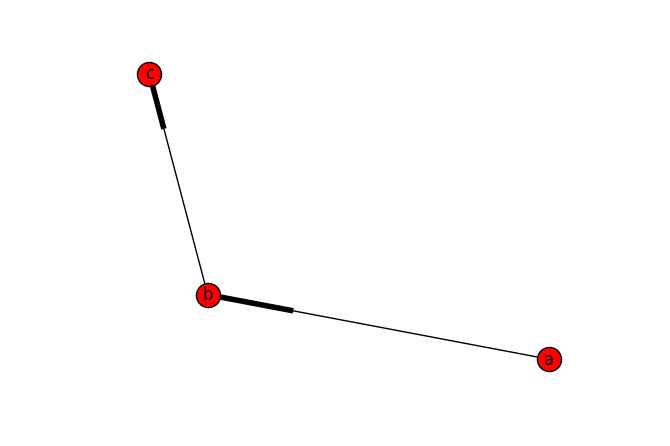

In [24]:
nx.draw(G, with_labels=True)

## Uploading your network to GraphSpace

First you need to connect to GraphSpace using your username and password.

In [25]:
graphspace = GraphSpace('user6@example.com', 'user6')
# graphspace = GraphSpace('user2@example.com', 'user2')
# graphspace.set_api_host('localhost:8000')

Once you are connected, you can use this connection to post/upload your graphs to GraphSpace.

In [26]:
graph = graphspace.post_graph(GSGraph(G))

In [27]:
print(graph.url)

http://graphspace.org/graphs/22641


![network-without-label](images/network-without-label.png)

## Updating your network on GraphSpace

In [28]:
# Update the name of the graph

graph.set_name('My First Graph')
graph = graphspace.update_graph(graph)
print(graph.url)

http://graphspace.org/graphs/22641


## Adding and Inspecting Attributes

In [29]:
G = nx.DiGraph()

# add at creation
# nodes
G.add_node('a', favorite_color='yellow')

G.add_nodes_from([('b', {'favorite_color' : 'green'}),
                  ('c', {'favorite_color' :'red'})])

# edges
G.add_edge('a', 'b', {'relationship' : 'friends'})
G.add_edge('b', 'c', {'relationship' : 'enemy'})

In [30]:
# accessing node attributes
print("Node 'a' attributes:", G.node['a'])

# accessing edge attributes
print("Edge a-b attributes:", G.edge['a']['b'])

Node 'a' attributes: {'favorite_color': 'yellow'}
Edge a-b attributes: {'relationship': 'friends'}


## Adding node labels

**label** is a text attribute that is displayed inside of the node. GraphSpace uses it to search for nodes with a matching name.

Refer to [Node Data Attributes Attributes Treated Specially by GraphSpace](http://manual.graphspace.org/en/latest/GraphSpace_Network_Model.html#node-data-attributes-attributes-treated-specially-by-graphspace) for more details.

In [31]:
label = {
    'a' : 'A',
    'b' : 'B',
    'c' : 'C'
}

In [32]:
nx.set_node_attributes(G, 'label', label)
print("Node a's label is %s" % G.node['a']['label'])

Node a's label is A


In [33]:
graph = graphspace.update_graph(GSGraph(G), graph_id=graph.id)
print(graph.url)

http://graphspace.org/graphs/22641


![network-with-labels](images/network-with-labels.png)

## Adding graph information

GraphSpace gives users the freedom to include any attributes such as `name`, `title`, `description`, and `tags` that best characterize the network.

Refer to [Graph Data Attributes](http://manual.graphspace.org/en/latest/GraphSpace_Network_Model.html#graph-data-attributes) to learn more about adding information about the graph.

In [34]:
graph.set_name('My First Graph')
# Add tags
graph.set_tags(['icsb2017', 'tutorial'])
# Add any number of attributes that best characterize the network
graph.set_data({
        'author': 'Aditya Bharadwaj',
        'contact_email': 'adb@vt.edu',
        'description': "This graph was posted during ICSB 2017 workshop on GraphSpace"
    })

graph = graphspace.update_graph(graph, graph_id=graph.id)
print(graph.url)

http://graphspace.org/graphs/22641


## Adding visual styles to nodes


**color** (str, optional): Hexadecimal representation of the color (e.g., #FFFFFF) or color name. Defaults to white.

**shape** (str, optional): Shape of node. Defaults to 'ellipse'

##### List of allowed node shapes

- ellipse (default)
- rectangle
- roundrectangle 
- triangle
- pentagon
- hexagon
- heptagon
- octagon
- star
- diamond
- vee
- rhomboid

In [35]:
for n in graph.nodes():
    graph.add_node_style(n, shape='rectangle', color=G.node[n]['favorite_color'], width=100, height=100)

graph = graphspace.update_graph(graph)
print(graph.url)

http://graphspace.org/graphs/22641


![](images/network-with-node-style.png)

## Adding visual style to edges

**edge_style** (str, optional): Style of edge. Defaults to 'solid'.

##### List of allowed edge styles
- solid (default)
- dotted
- dashed

In [36]:
graph.add_edge_style('a', 'b', directed=False, edge_style='solid', width=10.0, color='blue')
graph.add_edge_style('b', 'c', directed=False, edge_style='dashed', width=10.0, color='red')
    
graph = graphspace.update_graph(graph)
print(graph.url)

http://graphspace.org/graphs/22641


![](images/network-with-edge-style.png)

## Adding annotations to nodes and edges

##### 'popup' attribute

A string that will be displayed in a popup window when the user clicks the node/edge. This string can be HTML-formatted information, e.g., Gene Ontology annotations and database links for a protein; or types, mechanism, and database sources for an interaction.

In [37]:
graph.node['a']['popup'] = 'Node A'
graph.node['b']['popup'] = 'Node B'
graph.node['c']['popup'] = 'Node C'

graph['a']['b']['popup'] = 'Friends'
graph['b']['c']['popup'] = 'Enemy'

graph = graphspace.update_graph(graph)
print(graph.url)

http://graphspace.org/graphs/22641


![](images/network-with-popups.png)

In [39]:
# HTML formated popups

graph['a']['b']['popup'] = '<h3>Edge between A and B</h3> <br/> Relationship: Friends'
graph['b']['c']['popup'] = '<h3>Edge between B and C</h3> <br/> Relationship: Enemy'


graph.node['a']['popup'] = '<h3>Node A</h3> <br/> <img height="250" src="http://clipart-library.com/data_images/111572.png" alt="Image A" />'
graph.node['b']['popup'] = '<h3>Node B</h3> <br/> <img height="250"src="http://clipart-library.com/data_images/27903.png" alt="Image B" />'
graph.node['c']['popup'] = '<h3>Node C</h3> <br/> <img height="250" src="http://images.clipartpanda.com/boy-clipart-9a67af7554253b6a9b7014c36c348f09.jpg" alt="Image C" />'

graph = graphspace.update_graph(graph)
print(graph.url)

http://graphspace.org/graphs/22641


In [40]:
# You can also embed websites in popups as well. This could be useful for embedding sites like genecards.

graph['a']['b']['popup'] = '<h3>Edge between A and B</h3> <br/> Relationship: <a href="https://en.m.wikipedia.org/wiki/Friendship">Friends</a>  <iframe src="https://en.m.wikipedia.org/wiki/Friendship" scrolling="auto" width="100%" height="500"></iframe>'
graph['b']['c']['popup'] = '<h3>Edge between B and C</h3> <br/> Relationship: <a href="https://en.m.wikipedia.org/wiki/Enemy">Enemy</a>  <iframe src="https://en.m.wikipedia.org/wiki/Enemy" scrolling="auto" width="100%" height="500"></iframe>'

graph = graphspace.update_graph(graph)
print(graph.url)

http://graphspace.org/graphs/22641


## Laying out nodes


In [41]:
# Position nodes in a vertical alignment.
graph.set_node_position('a', y=0, x=0)
graph.set_node_position('b', y=250, x=0)
graph.set_node_position('c', y=500, x=0)

graph = graphspace.update_graph(graph)
print(graph.url)

http://graphspace.org/graphs/22641


![](images/network-with-vertical-layout.png)

## Specifying weights on edges

In [42]:
# G.add_edge('a', 'b', weight=5)
# G.add_edge('b', 'c', weight=10)
graph['a']['b']['weight']  = 5
graph['b']['c']['weight']  = 10
graph.edges(data=True)

[('a',
  'b',
  {'is_directed': False,
   'name': 'a-b',
   'popup': '<h3>Edge between A and B</h3> <br/> Relationship: <a href="https://en.m.wikipedia.org/wiki/Friendship">Friends</a>  <iframe src="https://en.m.wikipedia.org/wiki/Friendship" scrolling="auto" width="100%" height="500"></iframe>',
   'relationship': 'friends',
   'source': 'a',
   'target': 'b',
   'weight': 5}),
 ('b',
  'c',
  {'is_directed': False,
   'name': 'b-c',
   'popup': '<h3>Edge between B and C</h3> <br/> Relationship: <a href="https://en.m.wikipedia.org/wiki/Enemy">Enemy</a>  <iframe src="https://en.m.wikipedia.org/wiki/Enemy" scrolling="auto" width="100%" height="500"></iframe>',
   'relationship': 'enemy',
   'source': 'b',
   'target': 'c',
   'weight': 10})]

In [43]:
graph = graphspace.update_graph(graph, graph_id=graph.id)
print(graph.url)

http://graphspace.org/graphs/22641


#####  Note: If you add weights as a edge property, it will not reflect on graph visualization automatically.

![](images/network-with-vertical-layout.png)

In [44]:
# Laying out edges with width propotional to edge weight.

graph.add_edge_style('a', 'b', directed=False, edge_style='solid', width=graph['a']['b']['weight'], color='blue')
graph.add_edge_style('b', 'c', directed=False, edge_style='dashed', width=graph['b']['c']['weight'], color='red')

In [45]:
graph = graphspace.update_graph(graph)
print(graph.url)

http://graphspace.org/graphs/22641


![](images/network-with-varying-edge-width.png)

# Part 4: Managing collaborative groups and sharing graphs

A **group** is a collection of GraphSpace users. For example, if there are multiple researchers who are collaborating a project, a group may be created containing all of them. 

A **group owner** is the creator of the group. Any GraphSpace user can create a group by visiting the Groups page and clicking the “Create group” button. The group owner may

- Invite any GraphSpace user that has an account to be a member of their group.
- Remove any member from the group.
- Unshare any graph that has already been shared by the members of the group

A **group member** is a user who is a part of a group. (A group owner is trivially a member of the group.) A group member may

- Share a graph owned by him or her with a group.
- Unshare a previously shared graph.
- Share a layout for a previously shared graph.
- Unshare a previously shared layout.

## Creating groups

In [46]:
group = graphspace.post_group(GSGroup(name='My first group', description='sample group'))

In [47]:
print(group.url)

http://graphspace.org/groups/336


## Adding and removing group members

In [48]:
# Initially a group is created with the group owner as a member.

for member in graphspace.get_group_members(group=group):
    print(member.email)

user6@example.com


In [49]:
# Group owner can add existing users by their GraphSpace usernames

for email in ['adb@vt.edu', 'adb@cs.vt.edu']:
    graphspace.add_group_member(group=group, member_email=email)

In [50]:
# Getting the list of all group members

for member in graphspace.get_group_members(group=group):
    print(member.email, member.id)

user6@example.com 320
adb@cs.vt.edu 70
adb@vt.edu 59


In [51]:
# Send the following invitation link to your collaborators (with/without GraphSpace accounts)

print(group.invite_link)

http://graphspace.org/groups/336/join/?code=SCKKOXFOL9


In [52]:
graphspace.delete_group_member(group=group, member_id=70)

'Successfully deleted member with id=70 from group with id=336'

In [53]:
for member in graphspace.get_group_members(group=group):
    print(member.email)

user6@example.com
adb@vt.edu


## Sharing graphs with the groups

A user can share one or more graphs with groups to which the user belongs.

In [54]:
graphspace.share_graph(graph=graph, group=group)

{'created_at': '2017-08-06T22:17:00.277763',
 'graph_id': 22641,
 'group_id': '336',
 'updated_at': '2017-08-06T22:17:00.277763'}

In [55]:
for shared_graph in graphspace.get_group_graphs(group=group):
    print(shared_graph.owner_email, shared_graph.name)

user6@example.com My First Graph


## Unsharing graphs 

In [56]:
graphspace.unshare_graph(graph=graph, group=group)

'Successfully deleted graph with id=22641 from group with id=336'

In [57]:
# No graph is shared with the group at this point.

for shared_graph in graphspace.get_group_graphs(group=group):
    print(shared_graph.owner_email, shared_graph.name)

# Part 5: Managing layouts

## Creating and uploading layouts

In [58]:
L = GSLayout()
# Assign different colors to nodes
L.add_node_style('a', shape='ellipse', color='yellow', width=100, height=100)
L.add_node_style('b', shape='triangle', color='green', width=100, height=100)
L.add_node_style('c', shape='rectangle', color='red', width=100, height=100)
L.add_edge_style('a', 'b', directed=False, edge_style='solid', width=5.0, color='blue')
L.add_edge_style('b', 'c', directed=False, edge_style='dashed', width=5.0, color='red')

L.set_name('My First Layout')

In [59]:
layout = graphspace.post_graph_layout(graph_id=graph.id, layout=L)

In [60]:
# Go to the following url o visualize the layout.
print(layout.url)

http://graphspace.org/graphs/22641?user_layout=1462


![](images/network-with-new-layout.png)

In [61]:
layout.set_node_position('a', y=0, x=0)
layout.set_node_position('b', y=0, x=250)
layout.set_node_position('c', y=0, x=500)
layout = graphspace.update_graph_layout(graph_id=graph.id, layout=layout)

In [62]:
# Go to the following url to visualize the layout.
print(layout.url)

http://graphspace.org/graphs/22641?user_layout=1462


![](images/network-with-horizontal-layout.png)

## More examples

Users can also define more advanced style for the graph using **attr_dict** parameter in `add_node_style` and `add_edge_style` methods. The **attr_dict** is dictionary of [style properties supported by Cytoscape.js](http://js.cytoscape.org/#style/node-body). 

In [63]:
# Setting font style

layout.add_node_style('a', attr_dict={'font-size':24, 'font-family': 'Lucida Console, Courier, monospace'}, shape='ellipse', color=graph.node['a']['favorite_color'], width=100, height=100)
layout.add_node_style('b', attr_dict={'font-size':24, 'font-family': 'Lucida Console, Courier, monospace'}, shape='triangle', color=graph.node['b']['favorite_color'], width=100, height=100)
layout.add_node_style('c', attr_dict={'font-size':24, 'font-family': 'Lucida Console, Courier, monospace'}, shape='rectangle', color=graph.node['c']['favorite_color'], width=100, height=100)

layout = graphspace.update_graph_layout(graph_id=graph.id, layout=layout)
print(layout.url)

http://graphspace.org/graphs/22641?user_layout=1462


In [64]:
# Setting image backgrounds

layout.add_node_style('a', attr_dict={
    'background-image': 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARAAAAH0CAYAAAD133KBAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAOwwAADsMBx2+oZAAAABx0RVh0U29mdHdhcmUAQWRvYmUgRmlyZXdvcmtzIENTNXG14zYAACAASURBVHic7J13fBR1+sff35ntNb1SQ++9qnRURBELKiL27s/z0FNPz9Ozd0+9U09PT2yH9exdLFhARFSaFOkQSkg2m+1tvr8/ZjckIUAgjUg+r9cmW2eemd3vZ57+CCklrWhFY0IIMRC4A5ghpfQ0tzytaDgozS1AK37fEELMAF4DJgFPCSHUZhapFQ2IVgJpRaNACNFNCPEW8GJGmrWob7ccgFOB55pXslY0JFoJpBUNDiHE5cB84MQxwzrw5Uvn8OWccxkxsA3ADCHEk80rYSsaCqLVB9KKhoIQoivwEDDZ7TTz1ytGcdlZQzAaFCRQ6gly9Dkvsmz1ToCHpJTXNKvArag3WgnkdwYhhCKl1Jphv7OA2wH7xCOLePDGo+nTM48Kb5h4XAMkLoeZjcVeJp33Ems2lAHcJKW8s6llbUXDoZVAfkcQQhyHHu34L/BvKaW3CfbZF3gYGJvutnDbH8dy8fSBKEJQ4Y8ixO73SgkZaVaWrtrBsee9RPEOH8B1Usr7G1vOVjQOWgnkdwIhxNHAW4A1+dRG4B/AE1LKYCPsTwWuBf4COE6c0I27r5tAjy7ZVFSEiCckopbPSSnJSLOxaGkxx5z7ImXlIYALpJT/aWgZW9H4aCWQ3wFS5KEowvrIX49l49ZyHn9pEcFQDOBX4O/Ac1LKaAPtbxC61nFkdoaN2/44lgtPH0BCkwSCsWpaR21IaSJzv13HKVe8itcXAThDSvlKQ8i3F5nbACEpZWlj7eNwRCuBtHAIISYCbwmBbfZ9Uzl7+iCIJli2cjuPv7SI5//3CwGdSJajL/pnpZSJg9yXEbgOuBkwnTqpJ3f9aRxdirLwekNoWt1/S1JCRqaND+auZuolLxOLa2HgVCnl+wcjWy2yAvREzz8ZD4wB/iqlfLAhtt8KHa0E0oKR9Hm8rijC+uy9J3L2aQPwlAYAsFmNmC0Glv66gwefns+cd5cRjSUAlgD3AXMOxNkqhDgCeAQYlJvl4N7rx3P2Sf2IxRL466B17A3p6TZefmcpZ1/zJrG4FgHGSSm/O5htCSGcwBBgMjphDKzxln9JKS87OElbURtaCaSFQghxJvCCqgjlP/edyNnTBlBeFqDm12mzGjGbVH5YUsw/nlvIf99dRiKhASwCHtif2SCEMKNrHNcD6sypfblt1hg6tE3H6w2jNcDvJz3TzlMv/MAlN70HUAZMklIurMtnhRBtgdHAccARQDuANJeFIwa15djRnenYJo0z/vA6/mDsAynl5HoL3IpKtBJIC0QyPfxFRRHMvu9EZp7aH0/Zvv2kDpsJo1Fl0ZJi7nvqW17/cAXJb/474F4p5Tu17GcccD8wsEOhm3uum8Dpk3sRjsYJhuIHrXXsuR9IS7Px6H8WcNXtHwFsB0ZLKVfXIpMR6AMcDUwAhgN2gE7t0hk3oiPjRnZkaN9C2he6Ua1GvKUBBp/4b37bWLYc6C+ljDeM5K1oJZAWhiR5vGA2GcTTd5/AWaf2r1Xz2BscdhMGReHrRRv5x/ML+d9HK1NaxLfA/VLKt4UQVvRw8NUA55zcjzuuHkubAjfl3jCN8ZtRFIE73cYtD8zltn/MA9gMjJFSrhNCZAHDgGOAsUBvAKvFQP8eeUw8sohRQ9szoGceGWk2QBIMxYjGdAvNbjUy8ZwX+Or7jQGgo5SypMEP4DBFK4HUAUKIAnQVeQuwFSgGSpv63CXNlhftVqN45R+nMnlCd8o9dSeP3dvRNRIhBN8s2sTDz37PW5+uTL38OZAODOjULp0HbjyaqRO7EQrHCYXrpnUYDAqqohCNJQ6IbBRF4HZbuP6ez7jvyW9Bd/yuAI4E8gHysh0M6VvApNGdGTmwLV07ZmJ1W0EVhMuCBGuRMT3Nysyr3+TFt5YADJRS/lRnoVqxTxiaW4AWgkuBvybvxwAvUC6E2AhsQs+5KAbWJ+/vAnwNqSqnzBaH3cSrj57KpHFd8ZQFDmpbUoIvEEUARwxqx1FD2vHxvLU88tz3fDxv7TiAS88cxN/+MIbcHAfl5SEk1Ik8hBCUe8OEI3HS3BY9jb2OHKJpEl9FhLuuGYu3IsyTc37sBfTq2Tmb0UPbM+FI3TQpyHWiCEE4mkAImP3SIhb8vIUrzhpCp/bpRKLVg0xSk3TrmJl62AVoJZAGQiuB7AdCCBNwVprLwgWnDaB4h9+4Yasnq6Q0mOXxhjp7KsI1w5cJwAdsEUKktJXN6OSyHtgBlABlso6X55TZ4rCZeO0fp3Ls2K54PPXPDZOALxBBCMExozoz8cgi3v5sNYoCUyd2JxyJU+YJHZCvw+0088fbP+Ll95bz+UtnM7h3fiqMXCfEEhqhcJwHbpjI4D4FdGqXzoBe+aSlWdHiCULhOBX+SCUpuZ0W3v5sJW99uoppk3rSo3PWngQiJZ3bp6cedq770bRif2glkP1jMtBx6sTuPHDH8cQrwiQSGoFgjJKyALvKgpSUBdmy3cuGrV7Wby5Xd+zyp23fFUgrKQ30rvBHattmMbBTCLETXYNJkcv25K04lYaeirbYrEbx2j9rJw+LWf8aw5GDU3iklHh9YRQhmDqxGwBeXxgp66Z11EQkmiASjR9QXkgKAojGNVRFcOHpA4nFEoQi8VoJUwiIxRN4vGGEgLwcB7H4npHpREJSmOdCUQSaJjsc+BG1Ym9oJZD94xKAs0/uS6IihN8fBQEGVdA230XHtmkYVCWVuIQQgnAkhscbpsIfocwbYsu2CjZv87J5m4/inT42bfUWFO/0FezyBAmFYtRYZmGgTAhRgk4mE512k3jlH6dy7NgutS6kFb+VYFAVOrRJO6hFm4ImJXshvAOCQa1flwiBbs54vKH9vjeRkGwr8WOzmMhKtxFP7EkgsbhGdqadNKeFMm+oa72Ea0U1tBLIPiCE6A6MG9qvkBH92+APJBe7hISUJKKJPdRlAEUInHYTaS4LHdukMbRvIaqqgKog4wn8gSjBcAyfP8rWHRVs3eFj204fW3f42LjVa9m0zVuwvcRf4CkP9bNZjcy+fyqTxnbB4wntsR9VFZz9p7fYVRbk5/cvwWEzJatfmw/hqK4JqWoDxXn3AlVRKkk6O9OG1WKolUBj8QT52Q5yMm2UeUMdG1WowwytBLJvnAMYZ07ti8VmJFRHE0GTEi0ua1WnhRAoih5adNpNtCt0YzQoCIMCCUksliCW0AgEomzZUYHRoNKtY+Ye5JGCoihYTAY85SGC4Rguu7k+x1tvCKCkVNeS9qYRNBRUVcHjDeHxhunWMROjQU1l21aDpumtBHKzHaxcV1oghHgOvfDwZynl+kYT8DBAK4HsBUIIGzAjM93KlAldCQYapA4NKSWJBCSShktNDSZlCpnNBnp0ykJK8Af3vW9FERiNKkpDZXbVEykx1EaWR1UF5UmfVF62E6NBrVUjBEhoGpPHdGHVulLD9hL/2cDZgE8IsQyYi95B7TspZXmjCv07QyuB7B0nAW1PndSTdm3SGyTqURekAjOJhCRUx6u3lHrp/CHBH2I3CTZ2loxBVVKVvBTkODCYFGSg9r0GgjEuP2sIZ5zQm6UrdzLvh418/cMm57LVO0dU+CMjkm8rFUIsAOYBXwC/Sin9jXwYLRqtBLJ3XCgEnDWlL7HooZv5LAQYjSoJTRKLac1KIgJIxCXRWAJFEZVE0mj7E4KdyeLBnCw7KPveXyyukeG2csyoThw3oSuhQJTN2ypYtGQr3y7ezLwfNmWuWlc6ORZLpOplNgohHpJSPtqoB9KC0UogtUAI0Rs4anj/NgzpW0AgWPc8hqaERL8K52baCUfjeCsitM13o6eiND0UReAPRiktD+J2WrBYDNQjKLRfCGBbiQ+AnEw7xPe9Myl1ckv5SRRF0CbPRdeOGUw/sQ/+QJTV60v5cek2vliwgY/m/da+vCL8iBBiq5TyjcY7kpaL1q7steN8QD33lP6YzYZGqf1oSKQu9IeCCSNE8tYkO4NtO3ULIzvDhnaADltNk0SicTzeMOXeMFpC0rtLDhedMZA5T53BnIdPwWhUAZ5JXlRaUQOtBFIDQoh0YEZ+joMpE7riD+w7L0IIccg4Lw8FiKQPRErZ6D4QIWDbzt0aSLye6o4mJcFwjPKKMJ7tFRw7risP3Xg0gBv4nxAio95C/87QSiBJCCHyhRBXo5e355w6qSd5ua5aQ7FVoapCz/FoRqQUpObWlIQQxOIakWgcs8mAqohG86Smks2279J9INkZ9gbPf/GWB/m/c4Zy+VmDQa+h+W9j+3VaGg57AhFCDBVCPAEsBR60mA3dT5/ciz+cM4xgcO/ah6oIDAaF8657h1HTZ1Phj2A0NvHplBJVVcjLcgBQ7gtjaOTkrX1BKIJAUM/CzcqwYjEZGqThUG1QVIEvEGWXJ4jTbsZmMTY4gWqaxB+I8tCNxzB+ZEfQ2wk8dLDbE0JkCCH+KIQobDAhmxktyokqhMgFZgFvSCl/qMd2rOhh2nOBiQBFbdOZPqU3p0/uRe+uOYTCccLh2D4jCUIIVq0rZdnqHcTjiUaPOtQuAyk7nUSi+X01lSZMI+9HURTKK8KUlAbIy7ZjszYOWUWjCYw2hefun8roM2ezdqNnlhBihZTy6bpuQwiRA1wOXAgUoreFeL3BhW0GtDQNxI3eWm+hEOJTIcQZQgh7XT8shCgSQtwC/Ay8BEwcO7wDz957IgveuIA7/jSerh0y8frCRKLxfRKCJsFkVGmb70QI8AdjqErznM7UlfdQ0K5TPqHGNqfUVMTHEyIny4HVYqxXHdDeIISeQ1KQ6+Slh07GYTcBPC6EOHL/nxV5yd/bEuAWm9WY0jxGN7igzYQWpYGQnHnidpoJBGMT4gltArBOCPEi8KKUck1tHxJCjAUuAKYC9ow0K6cc04OZJ/VlaL9CzCYDvkDkgJPFVEUkozQQb8arf2rhNLd9LgREY3FCkRhmkxNlP3kZ9YGiCPyBKJqU5GXZsViNB12NvD8IAR5vmGGD2vLkHZOZMetNI/CqEGKolHLLnu8XndA1jplAdkGukwtPG8Ck0Z05/sI5lJaHhjWKoM2AlkYgGQAXTx/E9JP68c//LODNj38t8lSEbwauFUK8BzwDfAo4gNPRiWMYQP8eeZw1tQ8nHd2donYZxOIJAsFYan7KAUFKiWpUyc7Q5zj5A5Hm8T8oArfLkpQh2qiLdv+iCIKhGP5AlMw0GxazgVC4cXJoVEVQkkoiy7Q3QdIalHuCnDm1H8vXlHDX49/ko5PIeCllSH+PKAKuQv/N2dvmubjsrMGcNbUvbdukgSbp3S2Hr77f2FcI0aY28mlpaGkE4gJw2s0MGNiGZ7pN4cbLj+StT1by/JtLrEtW7pgGTEPvOJUFtLVaDBw7qjMzT+rL+JFFuFwWgoFonUrF9wtVYDTo/ofmqICV6I7LtCSBhCKxZg8pN5UWpCgKO5IRmPxsB2gNc/51+WWtXdSkBF9FmNtnjWX1+jJe/3DFCOAfQogH0ds+nAe42uS5uGzGYM45uR+FBW6CgQiesiDpbiujhrTnq+83mtHNmJcaROhmREsjkDSANKcZ6YtQXhGmIMfJNReN5OIzBvH5/PW8+PZS3p27akBWuo3pJ/Rmxol96dMtB0URB2Wm7BMJjQy3DYCSsmCzXf0PFRNGl0H/31jRlxQURbB9l55ElpvloKHGiRsNCmazgVAoRiy+Z2mAHqZO8OQdx/PbxjJ+XrH9AnRnvNq1YyZXnDWYacf1Ij/XSSAYrfZ7SyQ0hg9ok3p4BK0E0uTIBHC7LJVOunAkTjgSR1EEJ4zvyvHjurJ01Q7cTgsd26UTTrbAaxRIvWoWqLWMvKmQOhfNab5Aygeir2Sr2YiiiANu+FxnGKpoIDkOEg3gQHXazVx3z6fsKPVz5zXjyUq37pEHJASEwnFcDhMvPngSo6bPxuUwq9dcOILpx/cmM8OOPxChrDy0RzZuOBKnV+dsstJt7PIE9+uEbQloaQTiBHA5zHv8MDVN4vVFEAK6d8omkdDwlDeAmbIPSE2S4dbNh51lgeYxHySYTfrX6A9EGz18ui/oPhDdkZmVbsVgUpH+RoiMIJAJjR1JDSQrw4ZWTxPGaFAo84aY/b9fqPCHufOa8Xv9PoWACn+Urh0z+Oz5maS7rXRom47fH6bME9xrKn8snqAw10n/Hrl89t36bkKIzlLK3+oleDOjpYVxswAy02x7veJICaFwrMk0ArNJ94E0mwaiSTLSdBIrbWTCrAtSa64xLRihQDQcY8cuP4oicNrN9dZArBYji5YW4/GGmDapFx3auIns4zsVAnyBGD06Z5GdYcNTHqzV5KkKKcFgUhk7oiOACd2MadFoaQTiVBWBxaRW/kAVIXDYTFiS4dSmhKZpZKbrPpDSsuB+y8kbC6njPhR8ICkzqjF9IEJAKJJge4kft9OMy26qdw6IalT55Ju1ABw7qlOdqohT5syBXDzicY0hfQtSD8ccsKCHGFoagbjMJhWL1YimaQghiMQSfPvjJn5dW4LB0LSHI2UVDaSZ+5BC8yeSCaE7qgFsFmOj1cEoQhCJxtlW4icr3YbLYSZRDxNGVQQVFWE+/HINZpOBEQPbEg43Tk5JOByjd9cccrPsAMOFEC3NjVANLY1A0hxV6h5sFgNrNpQydsbz3P3EN9itxiYVJqFJMpNRmF1lgWbTQCrlaeZUdkXRWwwCZKRZG82OURShRzi8YbLSbTgdpnodu8ViZMVvJaxeX8bw/oV0bJtGpJGaSCUSkqwMG4N6F4A+o6ZFz6lpMQSSVM/tVosBi0lF0/QF7HLoTYTLPHpvzCa9CsvddSjRuNb4PfxqQSKhkZmmJ7Pt2OVvcjOuJlKOx8ZMZVdVhZLkMPG8LEe9TTeTSeXL7zcAcPy4LpXf6f4gpcRoUEhPs2KtYzGfJiVGk4FRQ9qBHsQ46qAFPwTQYggEMAJpTrs5WfegoWlSnzpvUPAFo01ezp7QdC1ICEFpWZBION7koVQJlaZbc2sgUMUH0oityAxVCCQ/10l92hcJIBZL8MEXehXEqKEdiNYxJd5mMbJsTQl/vO0jFvy0pXLA1/4QjcQZMbBt6uG4A5f60EFLIhAz4LJZjViTDtOUBmK1GCirCDVLCFNVFVRV98XUxw6vD3Y7UZtl95UQQlQ2OXbYTY2mkekayO4s1Poct9lkYN1GDwt+2kKPzln07JxV5/EdFruZL+av55HZ3zP/p83YrKY6fS4ajdO1YyZt810AQ5LjU1skWhKBGAGn3WrEmirdlhJVFbidVgKBKBX+pq0F0TQNm9VApttKWXlIT2hrhlV8qFTjKgp4kj4Qt9PSeBqhKihNZngW5Drr1T7RYjEw/6ctxOIax4/tisNprpP2JIQgHo3zw9JiAEYMaEssXrdoTDyukZtlZ2CvfIAioMVOy2tJBJIBmDLc1t0duNCnk7mdZsKR+H5L8BsDqqpgNOoDjRKNOERpb9ASkjSnngeiq/XNWRUMVrMBp92Eyag2nj8mOc4S9OFV9Q0Zv//lagDGjywiHq3bd6go4PNHWPDTFtJcFrp3yqxz5EYCCBg7vGPyXss1Y1oSgTgB1W6rou1JPYMwM92K1xfBF4jWey7rgSChSWxWE5npVnZ5QpUp9U0JPRqlR58aq/K1rqjwh5l6dDeWfngZpxzTnQp/uMH3IYQgEdcqmymnuy0HPf3OZFQp3ulj7nfrycm0M6BXHqFI3c6h2WRg7cYytu30M6hPfjK5se5yxKIJhvYvSLXDbLGO1JZEIOmAkoo4pKCqSjK1XRLaTwexxoAidKdePJ5oNidm6grc3JW4MplWn5Vuq+yT0hiIJTSKd/hQhCDdbTno824xG/hx6TY83jBHH1VEdlbd+6qaTSrLVpcAcMTAthhNB6ZxhaMJunTIpH2BG/R8kBbpB2lJBOIGcDl3z36VSAwGhQx3sidHMNbEPhCJ1Wokw22tNKGao6DtUCmmA/2cRGOJRovCCPTQdXGJD6fDRGaa9aBNR9W0O/v0mKM6cyBDbKSEBT/r7Tz698xDO0ASS4XfB/XJB73NYd8D2sAhgpZEIC6AdPduDURKEKruAwEIBqN6J/AmhKIIjKls1Gi8yR2ZUkosZt2EqdjPCIrfA4SiNy0qKdX7axxsHYxBFXjLQ3zy9VqsFiPD+hcSqqMPQwgIR2Is+HkLiiLo3TWHcB1Nn5rbGTei0g/SIs2YlkQg6UBl9WslFFHpRAyFm34BIyEnWQ9T5g2hNHFf1IQmcbt0At1UXNGk+24OGFRBaXkQfyBKQY4Tg0E5KFPJYjbyw5KtrNlQxsiBbShqm17n7FOzycCm4gpW/LaLft1zKcxxHlRDqUg0waDe+Rj1PJ7xB7yBQwAtKQ/fDuC0m6r/YDQNtztVjRpENM1MtGowJTWQSCTR5ASW0CRmo8qlZw6mU7v0vU6n/73AoCqUecPEExr5OY6kE/LA086FKiiviJCTaefY0Z0PaLaPyaiyen0psViCof0KsDnMB9WoKhKJ06VDJh3apLFmQ9lAIYSjpQ3zbkkEkg5gt5mqe7s1KqMQ5b6mV+GllGRnpjSQcJObUImEhsVi5InbJxOPa1T4w4dEVW5jQVWVynaU+TlODOrBaSA+X4RjRnVi/hsXYLca8frqHjFSDQoLl2wFYHCfQuRB+ns0TeJyWRgxoC1rNpTlo/tBvjuojTUTWpQJYzSo2G2mal+YpmmkJzWQ8opwEw1lrQ6zUefheFxrlv1LKfF4Q8lKWIHJqOrtDZpelEaHqorKvif52Q5EPSqw43GNvCw7VouxzpGc1PS9BYt1B+qAXnl1Tn2vCYnuQxs1tH3qqRaXD9KSCMRtMirYawwQ0jSJ0677AEqT3aCaElLqHbEASr3BJveBVJMFPTS5szTAbxvLyHBbmyUyI0TjRYSkhO07d3ciO5DISW2IRBMHVIRpNCiU7PLz47JttM130b4gjWgdM1BrQzgUY3CfSj/IqIPeUDOhJRFIhs1mwumo7nXXJJUVuYFg8yRSVfpAoolm0UBSMKoCs0nlkpveY+S0//D0K4tx2EzYrMYmq9K1Wgy4HRbMJhWnvXFSG9Zt9gDJLNQmzv41GVXWbvLgqQgzqE8BWZm2enXkj8YTdChMo3unLID+Qoi0BhO2CdCSCMRlNCiYTYZqHfwTCa0yMrPLE2zyghApJdkZ+nC8svKQnuPcTHC6rdz52Dw+/WYd/kCUi258l2n/9xobt5aTkWFt1EQzh81EutvChi3lXH/vp0y5+GU++2496WnWBk1rj8U1sjJsdG6fQWGus7KJc11gSabZ10c7MpoNLF6+DYARA9rUu+dJIiFxu62pLmXZQL96bbCJ0ZIIJMNmNeJ2WqpddVLZj0py1GE81vSRkFT6fCgcb5ZSFCn1/JgP5q7ilke+Iivdyav//CNHDe7Gm5+sZPgpz/DvOYtx2BtWG1EUgdtpweUw88PSYi748zv0m/wE9z89n0+/Wcek817iqls/xB+IkpFmbRDnbiAY5bqLj2DR2xfRvShrv+n7BlXB7bTgdlpYt9nDlws26BmsadY69/1IQQjQEhqLlugFdIN65TfIPCAtoTFmWIfUwwn13mATokVEYYQQDsDitJtRBFS1OKWUmEwqVovuSQ8lK2ITTaSz+4NR+vfIY+6LZ5OdYaPC24BzZ+oAKfWr//rNHi684V0A/vm385g2bQyTR/fn/qff42+PvMHFN77Lh1+u4d7rJtClUxbe8tBBF6EZjSoOu4lAMMr7X67myf8u4v0v9Obi7QuyufysiRTmpnPDAy/z6HMLeWfuKu67fiLTjutJJKpPA6wPl2ia1BfzXuRXFIHVbMBkMVJWFuC9z1fz8nvLeOOj5URjksF98rno9IFMmdCNvDwXkWCMYB3qiBRF4PdH+HbxZhw2E507ZjRI2DwSjTOwVz42i5FgONaiGi2Lpm7CczBITjdfMWZ4h8wP/3Mm4UiiMn3baFAJhmMMnPIUBlWw8M2LsJoNB11gdaCQUo8M2K1GorEE4SbOBTGo+iCk485/ibnfrefaC4/nvr/MpNzjw6CqONw2Fvywill3vsCCn9eQkWbh/usncv60gYQjMYIHkHxnMRuw2kzs2Onjnc9W8dTLP7Joqa7OD+3XmYtPH8fUiYPJzHIBgu3bS7n9sTd5/MVPATjjhN7cPmsMnTtm4fWGSGiyQV1GJqMepYvGEvzy63be+OhXXv1gGes3ewHo2rGAjm2y+PjrJQDkZds5f9oAzpzSh15dsonHNfzB6F41NJvFyJKVOxh68tMM6VvAd6+d3yCjNBRFYFAVRp0xm8XLt1UAHaWUZfXcbJOgRWgg6BPpbBluSzLPYvdXJqXEZFRwO8zsLA0QjSYq80KaAkLoV0RfIFr5uCnhdFu48d7PmPvdekYP68lts6bh9+laUDyRoLzMx7B+nfn8xZu4/+l3ueXh17nghnf55Nt13HPtBDq0TcPrDe/1ai4E2KwmTCaV1et2MefdZfz7lcVs3e4DYMr4QVx65gTGDu+JxWom4A9R7vEjpSTNZeex2y9k6oTBXH/fHF5+dxmfzPuN264ex0WnDUAI3eysD1RFYLfpfo1NxV5efGsJ/313KfMWbgLAajEz/fiRnDZ5OGOG98Rlt/LDkrU8/+bXzP7f19z1+Dfc869vmDGlLxecNoARA9vqHe78kT1S5KWUKKpg3IiOHH1kkf5cvaTXoWkSu8vEsP6FLF6+zQUMAT5ugE03OlqKBtIX+OGck/uZnrlnCr5AZPdYB0XPe5h49gss+GkLv356BYV5LiKNNKn9UIGUkow0G+/OXcWUi18mJ9PFt6/cSvvCLPzBSDUik4DJoGJ32vhq/nJm3fE8P63YQFa6lb//9VhmTOlDNFbdtFAVgcNuBiQ/LClm9hs/M/uNnwhHNCxmM2dPPZLzpo1mSJ8iFEXBFwjttYAuzWXHWxHgwWfe587H30aTGhOPWOtWOgAAIABJREFULOLua8czqF8h/ooI0QPwXQkhsFoMmC1GvN4Q3/64mdc/XMH/Pl6B16cT0tB+nZl+wkiOHzuAzu1zkRL8wbC+WK0mDCYj6zdu55X3F/DvV75g3eYdAEw4oojLZwxm4pFFOBxm/P5I5XQ6mWwfYTaphKMN2//F7bTwynvLOHPW/wDulFLe1GAbb0S0FAI5Cph31XnDePgvx1R2vUq+ht1m5PgL5/DJ12tZ+sGldO6QeUC9MaQEk1HB4bTol9yEhqZpJBKSROV/2SwNg2qD7vcwsnWHj5HT/sP2Ej9vPDaLkycNw+Px73Mhup1WfIEw9z75Lnc98RYAZxzfi7uunUDHdukE/BHsdhOhYIy589fx9Cs/8fZnqwBok5fJhaeNYfqUI+jasYBYLEYwFNmvU1bXEg3YnTYW/fIb1979El9+vwJFgb/9YQxXnTccp91U2dF9b9BNFD3pa+mqnbz96UpeeX8Zv64tBaAgN4Npk4YybdJwBvcpwmwxEQpGiERr/y2YTUasNjMej5935i7iqZc/57vFenOhgb3yuGLmUE46ujvpaXrHu0hUJzn9/IoG7bhmNhvYss3L4BP/jS8QXSClHNFgG29EtBQCOQ54/9Y/juHmP4zeY2RleoaNM654jVfeX84Pb11In265BEN1J5A0l4XtJX7++fxCSjxBOrXLoDDPSZtcF5npVlwOczLaYKo271VKSTwhicc14knS0V9o3GCMwaBgMqocd8F/+fy79Vx70fHcd+NMvOW+OixmMJkM2B1Wvpq/jKvvfJHFy9eTk2nj7zcdy/ijOvHOJyt5+uUfWZiMNvTv2YFLp4/n5KOHkJ2TTjgYPqjqUwCnw4qmaTw5Zy43PfgqXn+Q/j3zePCGiYw7sohgIFrNj6Qoun/JYFDYul1v/jPn3aV8NG9t8nWVE8YP4MwTRjJ2eC+ys9OIR2IEw5E6txQwGFQcDiuRcJQvFiznyTmf89anPwDQuX06/3f2UE6b1Iv8fBcBf4RILNHg6T5CCCxmldHTn2PhL1v9QFcp5bYG3k2Do6UQyGnAKw/deDSzLh6Jp6x6pCM9w8b5f3qLZ1//mY9nz2DsiI74A/u2rVNDoexOM5999Rv/d+uHrFpXWut73U4j+TlOcjIdtMlz0a7ATfuCNApynaS7LWSl28jKsOG0m1EVgaoqKAYFpCQR14glCUZqEk1K9HauB3/e0zPt3HjPp9z9xDeMHtqDj579M4mEVueenLuPy4Y/EOLuf73D3f96G4DcbDs7SvSGxceO6sclZ4xn4pF9sDusBAIhYvUc4SnRHb9Ol53Vv23lr39/jVc/mA/AFTOHcNMVo8jLdhCOxLBYjPj9ERYuKea1D5bz+ocr2OXRLx59urVj5tQjOWHcQLp2zEdRFALB8AGfg6rQx2RakVKycMlannjpM55/82tAkptl5/9mDuW8U/tTWOAmGIg0eOFiutvKNXd+zEP/WQBwgpTyvQbdQSOgpRDI5cBjT99zAhdMG4DHW13VNRoUVq8vZc3GMgb1LiA3077fKEya00JFIMKdj33N/f/W65cuO3MCUycOYf2WnWzd4WHr9jKKd5azZXsZW7Z7KK/w1botgwqZ6Tay0m10aJNG23w3HdqkkZ1hJzfLrpNPhg27zYTZpGI1GxEmVTeVEhrxhG4eaZpuKmmaVqsmIaUkI93Gu5+uYsolL5Od4eK7V2v3e9QFuummYnfZmDd/OVfc8iwr1mzl3FNGcf60MQzv3xlVUfAFwg3ecV5KsNvMGA0qr7w/n+vvm8Om4l10aOPmwRuPoV/3XF7/aAX/fWcpS1buBCAr3cWpk4Zy6rHDGN6/M3aHlXAoctDa0N4ghMBuNWMwKCxZuYmnXv6cJ+d8TjwRJyvdylXnDuO8aQMozHfj94WJxhpmHpHbZeGtT1ZyyuWvAjwkpbym/lttXLQUArkBuGvOI6dw+nG9KK9ROZlqqmM2qQRDsb0OOU45wZwuC98s3MiVt37Azyt2UJibwQM3zOCMKUcgU3URigKKIB6JEQhGCIWj+AIhtu0sZ1tJOTt2eSne4WFj8S42FZeyeVsppeUBgqHaB1wbDFCY66Iw10X7Qjf5OU7a5LkoyHFSkOskK8OGw2bCaTfhdloQqoCERJMpU0lLplGXccS0Z9lZGuB/j8/ipGOH4fH46p2k5Xba2LnLS4nHR++ubYknEgSCkUaftSOEwO22s32Hh9sf+19lyFeI3Umex40ZwOmThzNhZG8KCrJIROMEQhESmtbolQN2qxmj2cjyVZt5/KVP+dd/56JpCfKy7Vx/8RGcfXI/MtJteCvC9e7CZjKq7CwL0H/yk1T4I4uBQYf6+mwpBHI/8KcP/nMmE48oqgyZHiicDhPRaIL7nvqWWx+dB8Bpxw3ngRvOom1hNl6vf48FowiBUASKIlCEgsGgYFBVhEHPYtRicSKxOPF4Aq8vxI5d5ZSU+di5y0txSTkbt5awqbiU4h0edpRWUFLqI56o/YqZ7jaRn+2ibb6L3GwH7QrcFOa6aJvnIifLTobbyrnXvc03izZx/SVTuOfPM/B6/MgG8LiktBFVVYlE954L0RiQUm/wY7Vb+OTLn7juvjlU+EKce8ooTpwwmN5d26AaDASDYaKx5omu2axmTBYTK1Zt4omXPuPJOZ8Ti8fo0iGDv101hmmTegLgC0QPWhtRFIHZZOCYc19k3sKNQaCHlHJTwx1Fw6OlEMhrqipOnf/aBfTtnlunrMEUKrUOt4VFP2/lj7d/xLc/biYz3ckDf57BOSePIhqLEwwd3BcvhKgS+lQwGFSMBhVFVUFKZPKWSGiUeQN4vH48FQF2eXxs2VbGpm2lbNlWxradHop3llO8sxyvr/aeMqmr8sQj+vDe09cRi8XrZfMfinA5rJSV+0FAVqabaDhKKBJr8qmDe4PNYsJkMbFs5SYefOZ9Zr/xFQCTx3Thzj+No1+vPMrLQwdNwOkZNq6785OUWX2ylPLNBhO+EXDIE4gQQgF+Kcx19l78zsVYLcY6Z5lKqU9Ik5rksRcXcv19nxGPS04YN5AHb5xJl04FeMv31DoaCwZVRVV1LUZVFJ18FAGKQjwawx8I4w+G8QXC7CgpZ+sOD8U7PWzb6WHzdg8bt+7CaFB44YHLaJOfReAg/B6HOiRgVBUkHDJh89pgs5owmc18NX8ZNz/yOvMW/ordauTRWyZx/mkDDtqkcTrMfPTVGk646GWAJ6SUlze48A2IlkAgbYAVY4d3cL7/zJl17vitKAJ3mpXlK3fwh9s+4vPv1mM2Gfn7X2Zy6fTxxBMa/uCh071LCIGqCBRFSaY262QjDCoIgRaNEQrradOKEESiTT/CohV7Is1pIxqP8+hzH3PtPS8B8OCNE7n6wpGUew9cEzEZVUrLQwya8hS7PMElwAAp5SHLpC0hlb0D4OzeKQur3US4bN/FahJwWI2oqsLjz33P9fd+hj8YY+IRfXjoL2fRu0cHfN6A7oA7hBZgKqeEyqtudTNNCFFZjh/VEoeU7IczPL4gRlXlT5dNpV/39ky78mGuuetTTEYD/3fusAPulRqL671e+/XIZe5363sC7YH1jSJ8A6AllPP3BfSGK/vRPIQQZKRb2Vjs5dQrXuWKWz4kEpXce+103nv6WroXFeIp8zXbEOz6QMpkVmwLlP33DEGy5qjUy8Qx/fnfE1djMhq48tYPefPDFaSn2w5IC5FSYjSqeq8R/QI/snEkbxi0GALp1SV7r0lMqZ4gaS4zz776EyNOfYa3Pl3F8P5dmP/6rVx3xUlEonF8gfDvzmfQikMH5WUVjDuiD8/fr7stzr3ubX78ZStpLssBkUg8luCoIZV9Usc0tJwNiZZAIN1cDjPtCtzEauk+JaXeRs/ri3DW1W9y/vXvUOoJ8bc/nMJnz/+FAT07UF5WcUB9L1vRioNFucfH6VOP5N7rplPhjzDzmjcp9QQPqJFTOBKnd9ds8nIcAEeJQ9hePaQJJNlIqJue1WmrNfpiNOhRjfOuf4uX3l5Kn27t+Oq/f+WWq09HIvH6ak/sakUrGgsV5X6uu2QK5586ml/X7uK8P7+DQVUwGuu23GJxjdwsB/275wEUAd0bU9764JAmEKAtkNe5fQZp7tpnoDrdFh58ej4fz1vLyIFd+eaVvzFqaA/KyyqIx5u+vWErWqFpGqFQlEf+ei7D+nXm/c9X89e/f47TZanz71E1KBw1pB2AERjaiOLWC4c6gfQGRK8u2XuUt0oJbqeZBYs2ccvDX+KwW3jyjgtx2i14vIFmEbYVrUghHIlisRh58aErKMhJ555/fcvLby8lLa1uTtV4TGNo/8LUw7GNKWt9cKgTSFeA3l1zdpfKJ2EyqfgCUS668T2isQQP/HkGvXu0p7wi0BribEWzQwiBzx+ic8d8nr7rIgAu+cu7/LS0GLfTst/kxWA4Rr/uubTJcwFMEULcI4Q4VwjRq/GlrzsOWQIRQvQAJpuMKh3bplV2hdJf0zNMr7/3M5at3slpk0dw8fQJVHj9reTRikMGQgjKy/1MGj+Ie66dToU/ylnXvElZ+f6dqvrERStD+xWCPtb1euBZYLEQ4jshxKVCCHuTHMg+cMgRiBBiqhDiE2ApMCI/R+/BEU2GcKWENLeV195fzpNzfqR9YTYP3zSTaDRW72rIwwECsFpMpLnspLlspLnsOB1W1GT6eF3htFtwO224nTbSnPp2jA04/+X3BJ83wPWXTmHm1KNYsaaE865/G1VVMO3DqSolGEwqw5NmzIWnjeOxW89n3IheJrPJOAJ4AvhRCHFq0xxF7ThkMlGFEFnAo8B0gL7d2rFk1WbaFbjJzrBVVuDabUY2binnyls/BOBft19Afk46nvJW7WNfkFJis+r9N5at3szi5RsoKa3A4bDQqV0uvbu2xWE173fUg6oqxGIJ/njH8/z860YAMtIcjB3ei9OPG05+TjrlFa0+qKqIJ52q/7jlXNZs2M77X6xh1h0f88/bJlNREd5rzU80FOOIQW0B8AVCXH7FSVx8+jiWr9nMM699yb/++1m3WDzxmhDiPinl9U15TCkcErUwQohOwHtA96H9OvHAzecSCYSYePZdXDp9EI/dNhmvT598b7OZOOmSl3nvizVcd/EJ3HvDWZR7am/00wodqQ7p67fs5MYHXuGV9+fv8Z4LTxvLv+68CL8/uE8tQi85NzLmzNtY8PNv1V5rX5jFQzfO5ORJwygvr72i+HCFlBKn3cKW7R5Gn3kbm4p3cesfx3DzH8fqTYmie0YMDQaVSCRG/+P/RTAsWP7hvbidNowGFaPFxFfzl3HBn59i7aYdAPdIKW9o6uNqdhMmOQv0PaD7rPOP46uXbuaoMf1ZunIzAL275aCoeh9Sl9vKo7O/570v1jC0byduufIUAr6mHeTU0iClxO2y8eOy9YyefjuvvD+frh3zueua05l932U8fNPZnDhhMKOH9Ui2Htj39jRNEo0leOHBK1gz9+9s+vqfzH/9Nq48+xg2bt3FKVf8nZff+ZY0l705hvQdshBC4AuE6dAmizcfv5qcTDe3PPwlV9/6AQJIc5n3+Ew8niAz3c7Ige3weH2sXFeMyWggEIpQ7vExelhPPn/xJjq1ywX4sxBiSlMfV7MTCPAQ0P2yGRN56JZz9Z6hpRX8slLvo9KlQwaxWAK308zCn7ZwwwNzsdvMPHXnRZjNxkrfSCtqh8VsYkeJlzOuepQt20u55oLJLHrrTm74wymcc8porrpgMq/98yqmThyCr45kHI8nKMhJpzA3g8w0B0P6FPHoXRfx6qNXIYTgwhueYvmazdgtjTNcu6VCCIHHG2Bg3yLe+/e1dCjM5u/Pfs/oM2fz5YINpKdZsVuNNT5DpRkz/6c1GKrMPPKU+2nXJpvZ916KUW9w9YgQwtaEh9S8BCKEGAmc179nB+6//kyCFUFisTjRuMYvv25EVQVF7TIAfYTkxTe+SzSa4N7rzqRfn474/KHWRLF9QBECg1HlmrtfYu2mHVwwbQwP3HwOqqpQXlpBuddPucdHMBQlkah7ha8QEI3FiURjRGN6jZG3xMu0k47izmtOJxCKcOfjb2E0GRGN3nSwZUEIgcfjY1CfIubNuZlpk4bz49JtjJ/5Audf9zar1peSnmHDmiSKSDTOsP5tAPj6h1Ukoru/p1SU58iRvTn3lNGgV66f1ZTH09wayPUAN156InaHlUgsjsGosnNXOWs37aSorZv8LDtGq5GbH/6SX1bu4JRjhnLFjIlUtNrY+4WiCHy+ENtLyilql8sdV59O2B8iGq3eFrAupsv+IKUk4PFx5cyjKchJZ86737F01SYs5qabEthSIITAWxEgJ8vFy49eycuP/IHuRYU8+/rPDDj+X8y69SM2bi0nPd2GIgTdizLp0MbNVwt/pXhHKWZj9dhHLBTmsjMnYtKfvzDZhKtJ0GwEIoQoBMb17FzIcWP64/MFEYDJaGDztlJ8gSB9u+djz3Xx9gfLeXT297TJz+Qft5xLJNYasq0L4gkNVVV484lZfP7CX3DaLQc0cOtAEY0lsJhN3HPddO7+0+k4bGbiiVYTszYIIQiFY/j9YU4/fiTfvfY3HrzhLDLT03j42QX0P/4JZt32IWs2lJHWLp1jjupMKBzhxbe/wWK3VNtWMBSlb492HDWkG8BgoEdTHUdzaiDHAY6pE4dgd9kqQ1kGVeW3jfqYwcF9CvCV+rniFj1k+9gt55Kfl0EwVL95qocTpJQoQiE7w0WskWuDhNDDjWdMHsGfLzuJnAx3szVBbinQpKTc68dkNHD1xSfw0zt3cfOVp+B2unj42e91Irn2bdJcOmk88dJn7NpVjiHZ1Bv071g1qowf2Qf0VJ9xTSV/cxLI0QATj+xDvMpcD6EIlqzSHah9u+dy5V/eY+sOH7POO44pxw6lvLw1Vf1AkdC0JlvIQgg9SuD1Ez8Av8rhjlg8gafMR5rLxq2zpvHTO3fxwA0zKMjN4uFnF3Dvk98CsHlbKW98tBCHw1otyhWPxBk5sEvq4eCmkrtZCEQIYQL6d2iTQ8/OhUSSBKJ3HZcsW70FgwE+/vo3nntzCYN6F3HH1aclQ7atpkslZB1ue/uolJhNxsqMVJPRcMDNpR02C2kuO26nVR/5WR9ZW1HpnC4v9+N22rjmohNY9NadPHn7BQzs1bHyfU/OmUswEMag7CbnSCxO53a5FOSkA/Rtqh4izaWBtAOK+nRtQ3amm3hyNIGqqpR6/GzYWoKmweMv/IDZZOTJOy7AYjYSbeBRgi0SB7roanl/KjdkY/EuZt35PLc++ga7PD5cDludSEQIgdtp48OvfuaSm57mmde+xGg0JEmolv3WRdZWMqmGFJFYzUYunjGReXNu5u2n/kTPzoX8tGIDX36/AnsVX0g8Fic3K43OHfIAugBZTSFnc6WyDwCUfj3aI5TdvxmDQaWkeBebi3ehaaAhuf/PZzCoX2c8Zb7DO2Rb68Kq62oTlW/XR11YWLW2mOMvup91m/Wxka9+8D3vPPUn2uZlEAzv28fkdtp47IVPuPLWZ5HAUy/P5dtFq3ji9gsxKEotfVsPXM6aTx2uiMUTlJf7URWFKVOOIB5LcMoVf2f2G19x3NgBCAQyOVrMYFDp0amAeQt/taM3ISppbPmaSwPpB9CvR3u0KlW2RoPK2s07K3/Ak0b356rzJuHz+g9f8qh2Va5xWZe1vG+vRKPfVFUQjca54PonWbd5J0LoqvOK37Zw0Q1PkdA0FGXvJ9tus/D9z2uYdefzSKj8Xmb/bx5P/fczHA7r/gWq+XStx7eX9x6mSGga/h0exo/sTVHbHN6Zu5jV67ZhrhEm79utXepuk0RimotAepmMBora5lSaLwCqQWXJyt2T/K4+/zhAkDgcQ7a1Egd7rrHaFtg+/AwOm5mP5/3C/F9+0y/uVT77xfcrWLx8A1Zz7RmkQoDBqPLknLm7Izpyt5Lw3JvzCASCqGoVTWJf/o7ajqO2Y97bcR5miCU03GkOZkw5kkg0xjtzf8Ri3f1daZpG5/a5qYe/TwIRQqhAv7YFmbQvzCZSJToQj8UZ0qcIgJ6dCxnevwv+wGHY01Tu5cEei0/uvmlVblWfr/EZRVH4ZaVeRVvpZ6vyngp/CFWt/WehCIWgP8yKtVuqfS61HZ8/RCQSr05M+5JTqyFnraRYC5EcphBANBTlpKMHoyiCOe9+SygYqdQYI9EY7QuzcelaYJNEYppDA+kCtO1RVEB6lfwPAIPRwOoN2wE4ddIwHM7a+6D+rlEbeeyxuKosOi15q3oFr/bcnos0O8MF6D9IRYhKAnA5rBS1zSESrT3kK6XEZDbgdujlFiL52ZQG0qtzG1wuO4mErJuckr3LubdzscfzhxdCkQh9urVleP8uLF6+gZ9XbMBq0QvxYrEEbfIyaVeQCdBVCOFqbHmag0AGAobhA7qgVLnSKUIQjcSY864e7548ZgCxSONlTR6SqHnVrUYcVa/i7L6a70sD0aq+X/9MKBTh2KP6keG2k5Cymo/ytONG0K2ogEi09vOuSYnRaOCMySOTIumfT0VeZp58FKoAmdDqJuceMrP7M1W1kmrnZc+7hxP0RkNGTjlW77P8wVc/YzTpsRCJxGY1pUK+2TRBN/fmIJDRAEP6dEKrol2YTQbWbtrO/MVr6NOtHX26tSW0n2jA7wo1F8keGgfJq3gVUtjbYqx2o8oihkg4Ruf2udx+1TQA4lKiSUlhbjo3/99JhPdzzn0VQc6ccgTHje6PBBJSoiE5+8QjOXHcIHy+UHWNour+90YcVeWsRhy1aSOHKXNUQSQcZeIRfRBC8P4XPxEORRBCb3khVIVh/TqDrmAe0diyNCmBCCGMwPi8LDd9u1cnCLPVzJff/4omJVPGD8Rqtey3O9bvBjUPs+rj2hZUzUWY2M/j1AJNOqO9FUEuOX0cf7/hLAqy0xjQswOv/+MqCnPT9VqZfZz2eEIipcYzd1/MWVOOIN1l57yTRvPoX88hEolV1z5q7rtWufZGKHL/JHKY/DxqIhKJ0b2ogBEDuvDTig38ura40vEdjUQZ2q9Tyi9yTGPL0tR5IEOAjkcO7k5udhoVyaFPQoAWT/DRV78AMG5EbxLxw7GGouZiqbGIqvwX1R5XfmA3Ug5SIZFCgCIBAZpuegQCEf4w8xjOmDwCq8WEzWbG6wsm/SF7CeNKfbOhcBS3w8ozd1/Czl1ecjKcxGIJIpFYDblqylnLiq8pp6D6ZU1PT65yPyVe8k7l48MHmpQYLSaOGdWX7xav5usfVjKgV0eC4QjhSJwendvQv0cHFi9fP0IIkSel3N5YsjS1CTMDUE6cMAghlMqsR1VV2Vnq5cuFv5Kd4aJv93aHj/myV/u+FvJIXpnFPjWNPW+iqkaQ3J6maVT4QzjtFlRFIRCMVK9b2atWJBFCEInGCYejZLjshMMxYrH4nuSxNy2oVm0JRNVjq2F6VSOgw1TzqIp4JMbYYT0B+PTbpUhNQ6B/r3aHlePHDgBwASc3phxNRiBCiHTgtPzsNCYc0YdAlfCs1Wxi+ZqtVPiCTBjZm8x0R61jLH+/qLkwqi4aKheSkFQhD63KAtT0/zVvVRZptcVZxaEZiyV25+LU1URIPq+3N4zrM3sqySMpa61mVS1yasnjSP1PEU8l6UHtZkwd5PwdIxKN0b1TIfk5aXy3eDU7dnkrK3SjoQgnHT0Eo94f5NLGrItpSg3kEiDr7JOPIi8vg1i1BDKF739eA8CYYT0QSnP3OWoiyNru19A4UguyJmlU3jSI10IcCS15q/K+qgSUisykkvSSV3eDomK3mnE5rJVjG1x2K1aLiWoJqlW1pCqahUjU0JDiKfn2QnJ73KjURqpFZ6jyv+a5OwwRiyfIynAxckBXysr9rFy3FbNJz0oNRaL069E+pYX0ASY3lhxN4gNJjmyY5XJaOf/UMYSD4WqvS00y74eVAAzo1ZFo5DAxX2pDtVyJmio8e0ZXaiaLpSDQfQZC6pcJTegbVxS9ekJJbk8IVEXBbjMjFIUSTwUr1m6heGe5PiJUQGaak/YFWXTpkIPNasHvD+smCzVk2EPGKprEvuQEXcaqvg2EXidVuU1RwzeSuiM57JwgSQjgqCHdeePjhfywZB1jRvaBYBgp9dT3q86dxJuf/ABwtxDiAyllg6v1TeVEvQvIufLsY+naqVCf4ZISwKBSUqY3Uc7NclPUNufwaJRc01yo+VwVlX1PX8LuhSn25hcQIKv6Q0Xyj5D6C5rEYFBxOG2U+4K8/dki3vh0EV8vWsmmbaW1ijykTxHnnzKGMyaPIM1pw1sRrEZ2QtaUr6o2VUXW2uTUqEJ0Vc5DynGaOiep/PmaDtTDkEfiiQT9e7QHYNGydWjJ/itSSvyBMKOGdueM40fw8nvzewPXAvc2tAyNTiBCiAnARd2K8pl13nEE/KFq37PJaGDVumK2l5RzwriBpLnt+APhvW3u94k9zBeqL7qaSVip16ou0JpIFsnJqlf4pLkhkZjNJqJxjefe+JLHXvqMH1ZtAKAwO41Tjh5C96IC0tMcSAnFOz0s/OU3vl28mh+WruPJl+fy0J9nMHZYT7zlAd0ZXlXzqJH/IfalgQBCkUiRFFBIKku0pUDIVL/WZDRGVvn1HOZaSCQao6hdLm6njcXL1hPwh1EUoWcCA9FonDuvOZ253y2npKzir0KI16WUaxtShkYlECGEFXhMCMHDN51NZpoDjzdQrbLWaFBZubYYgL7d26EeRGOb3wVSxFHtflUfA9XyI0SV+9U0FtDXktS1DaHo2oas8prZYGLbTg+X3zabjxf/SrrZzPknjuKUSUMZ8v/snXd4HNXVh987M9u16l1ykXvv2BgbTLEBU0MLLUAoKST0kgRIQkmAVAgJIU5CwgchJCR0AgbTwQV34957kdX71pn7/TG78qrZsi1pV9K8zyPhshyUAAAgAElEQVRLu9qde3at+9tzzz33nLGDyEhLQnHYIvERU4mCPh8btu3nqf+by3Ovfc6s6x/nuZ9/i2suPJnqqroW3sahHaOY+1qzM7K1LIT5CxlddsU8RkBkyRURkVgvpBcTCunkZaUydEA+S1dvY39JJf3yMxuPf/j8AQYU5fOTWy7itkee9wAPAdd0pA2dHa28Dhhy1fnTOPu0CVTXNhUPAKGprImUMBw5uBAZ7gXLl0ZaEcoYj+LQtmjTOIOIvd1ixybmGq3FUCTouo7X7STZ4+T6c6bxxb8f4m+Pf4vZp4zD5bRRW++nqqKGqqpaqiprqaqswR8MMXJQIX//1c38+7e34HU7ufGBv/Ly2wtJcjtjxjw0dqP9re2kNLHz0HfRPJ7S2mfJ4e7vZaiqwthhfZFSsnXXQez2WJ9AUF9Tz/WXnsqIwYUAVwghhnTk+J0mIJFTt7c6HTbuvulcQoFgC09bCDB0g43bTQ9kYL/cJrszvQvZ9HvzAGkTUaDppGwUkpZi0yQ+EfnSQzpuh505D9/AMw9dz+C+OVRVN1Bd20A4rLfqARqGpK7BT3VVPZdfOJ3/PnUbTpvGXY/9gx27DuKwa22IWOxropmNTcWjuQC1fB0xb1Pzt62XIlTRWANk+54SlOYtH0I6SV4337t6Fpgrjus7cvzOXMJMB0acPWMc40f2p6q6ZcNlVVGoq2tg+55SPG4n2RnJVhsAaN2TaPyEjn0ATSeZOHR3Y7CUyPfYawqzu5zdoREMhs24ZXSPtsUSIzJG9NdSUlVew8xpo3nqgWupqWkgM81LKBRu5n3IliIX/TnWzugdQkZ2Wprbe+h1N8ZCWgui9lIMXdKvMAuArTuLze3yWAT46v3MnjGO1GQPVTX15wsh7pcdFCfoTAE5B+Cysye3+SkhFIW6mnp27i2lf0EmGalJ6OEO32lKfJo5H23+PvZ2a5/Kzb+Lpo83A5KHZpwelqBCi3XlYW0wf6iqrufqC6ahIGio80cqyx3mbzL27zXWztZ2UeQRlMESjkbCoTAF2akAbNlV3FgJP1YfAsEQRQWZTB4zgHnz1wwFBgJbW7/i0dGZMZDJXo+L8SOL8LdxLF9VFCqq66mt91GQm443ydVKPc1eQqe44rL1nxsncOwSoxUDjmBTgz9IXYO/5ZKnuagdccI3fX5jfkkLu0SLx/Z2QmGd3KxUnA47O/eWEm7jA1goChNHDQDTaRjRUeN3ioBEUmcH5OekUpibTjDUuoDYNIUDJZUA9MvPtP42jkDzEoQdRkdesw3Nat9zrD+Ao0U3DJKTXORlpXCwvJqqmnrU1jK5BbHlDvM7avzO8kAyAG92Rgouhx1ptP6HoSgKJeW1ABTkpHeSKd2E9q4ijsp1F63/3JhcJg5lrLZ24faM1Xy5JNr4Opw2iNgnR19n7JNjB7PWLk2QoGkaffIzqappoLK6Dk1rfVo7DtW67bB531kCYgMUt8tx2AcJTaGssgaIltnrpZ9Aotn3tn4fe7v5V/PrNNcOwaHj8o33HcX7LVr80A5DY3/VmoC18dQjxWQsDWlEYuZS5WQkYxgGVbUNrXsgmCd1Y57WIXSWgJQBDQfLqk2j2/oPVxSqaszdmewMb6sJlb2SJuIQ+aHRW4h9UOR7cxERze5vTYAitPmWH25CH0GomohVC9E6zDUaXy/NbBdNr4Noeo1ejUTVVNJTkwCz0XarbTkk7NnfeEShrKNG7xQBkVKGgP0HS6s4WF6DprWx2WNIaiNp626Xo5cLSLOZJWImTYyYyOj9CjRZgrT4osnvpCLMrVqlrcfFDN8eJyNWpBTRii3R+2MeJ5qN39wWJeZ5xN4f2ZGOXseiESkBTSE7w6yfXFfvR2nDA1m5YSeYm+sbOmr8ztyFWVVcVs22XcU47S0FRAhA16morgPA63HGuli9hFZmQ8ynsGwhDubvZYsJSytfzSbl4R7TZHK2d4YeGr8xNtNMRFoVu8bHtmYLTauSNRez5t5Jc3N7sbhES36EWqnkZ4scWF28aivATrqJgHwipeT9+atR7bY2XeVoDxKjjUBrr6EtLyB2MjV6EJGJpsROzpgvmk7axsc2e5yMHbzVydfGjGzN1mZC0OK+1uxs4n1E7Wz6OpsIURNB6cVq0RzDICPNC8DB8poWK06Px8nHi9axxzxl/b6UssOyNTtTQN4DKl96ayEV5TXYI9WSDiEwDEl9QwAAh93WOw/RQdNJ0WTSiUNeiNJscqk0XZaozb4UgVQjSxdVNLtGrAC1MuFbtY2WkzdWjGJtUWJtUCJ2KC3tVICIjYeerzTxnmQLG1sTu14uJhJskTBB8w9iVVEIhXT+8ML70bue68ihO01ApJTlwL927y/j+dc+x5PsaZESFNYNyivNbdykJGfvSiJr7ZO0uZBAs8mpxEx6pXGCtfVFiy/M5zV6BByalLEGiGZ2tWZnCy9ENBOl2DEjHkYLG5VW7CTmq7lwxAzYXOx6u4ZED2CK2PvAm+Lh5f8tZMHyTQDvSSmXduS4nX0a91eA7/E5b7JnTwkel6NlVnbjkY5e6n00p8VyoJmH0GSitSYSzSejOCQYyqGJ3GZMojV7Wr3d3AtpzcZYIWmHnc2eJ2M8nLa9pF6uHG0gJSR5nOzdW8oPf/0vgDBwf0eP06kCIqXcBTxWWlHD7T97HpumoUViHhJQVUF6mrn9VFPra3P/ulcQ43E0fhc0Tq5DSxGaLBGaL1ua/C522RD5XYvApiKajXsY29ryQmJEQ8bupCjNbGvLTlU5JCQxy68WO01tGmgRDaJGP4gddg2QfPvHz7L/YCXA41LKlR09blfM2F8Ci16ft5SfPPky3pQkFCEAiaooeD1OAMJhg04sHp2YtPg0j96MmYSx8QChIFUlMski31Ul8tVMTJrdJ1XlkAjFegbR8Q5nT1t2N9+ujdoZO5aqtGpP63Yqh5ZsrW5Xx47dDjt7CwLzNDRmiVDsdmw2lW/+YA5zP1sF8AFmMaEOp9MFJJITchVQ/Ogzb/CHv71DcpoXTVVBysb2Db1NOxpp69O9yRKBmGUITYWgtUBqq14HNF0OxEy+w3odh7Ez9nbzyd48DtPc82jF/sbYTeySq3lOS2sm9HYUhfIqM5Y4qG8OBpJv/mAOL721AGA9cGVnFFSGLiqqLKXcKYQ4H3j/tp89n15RXceDt10KHgdpXrPTe229v3FLt1djOmeHJkxjWUEiZQHNmzLmyLuAlimlbeZncIRJ2c7ZGWunaVDT60qzvoeM1iVprGVyNHZyZDstMQFobAO7Y28pl9zwC974cDnASuCiyIZGp9BlrS2llMuEEOcArz70+1cLNmzbz7NP3EL/wmwAGvyBrjIl8YhOxugPjbeJTKbIsXtFxByPF40z8lChnWbXbHx+s5+jk140e2x7li6t2Rmd4FKankO0HLwaEQ9M+2NrkbRqJ7QUi+bB3vbY2YsQAgjrlFeYHsj3H3wuWpTrLeCbUsrKzhy/S3vjSikXCyFmAC+8/M6ik9Zs3MXIIWY5toNl1b13GQOHn5yxiiLEoRoe0QnZ1gZWqyIS+aetSXmUdiqqwO10EAiGCQZDTWOdMip+oqkoHs7O6O3jtbPXINDDBlU1DQCEdd0H/ExK+XhXjN7VzbWRUm4TQpwKPLJ+2/571m/brwGUVtTQ6/84juSJQOwdMc9rdW3Q9GExWpOcZAauaxsbfIkWT2uXuYqCzx9g+dodDOiTHSltGE1yjLGzUQzbYWf0Z3EEm3r5n0oUgZm+XlJRDVAHzJZSzu+q8eMSdJBShqSU9wHTgI+A6FaTRZNP2jZiAU0CjZH7WkkNb7JVKwQSQZLbydsfr2DuF1+ZowillbHbYaOAZK+btz9ayenXPMov//I2nowU3E47DqcNRVVj7GmnnbGvLWacFjcs8TiEMKuS7S2uADjYleIBcfBAYpFSLhFCXAEc2FdcoVl/GBGauPuxyxeaOSBHN6EcDo2aBh/f+enfKC2vYdMHT1CYm0GgjYpxR8LnC3DWyWPoX5DFnH99RF5WKldfOI1QSCctxWMeTzAa12FHJ1Ct37DEoxlqpCRGeWUddOAx/faSCNsedUBxcVkVtb09mSyWFpOo2afyUUxGicTlsuPOSePZlz+hpLyG7145k8H989osN9keAsEQfQYX8NNbL0ZKyU+feoVBp9/J6PN+yOvzlpKc5Gq/rS1eV7MnHs1r7kXYNJXisupoWYydXT1+XD0QACmlXwixa9/BysLyqjpyMpPRg73oTMzhaB72aH5Hez0Pu41V63fxn3e/5E8vfWheQZgV2TVNJRjWj2lupqUns3rlZn7zt/8BcMbUkQghqG8IIISC3vzwU7uxvI72otk09h2sJBAMAXRo28p2jd/VA7bB7pLymmkl5dUU5KQRoGVNg15N7AQ6+sKouJ0O3vl0JU889y4AGalJzHnpI1RF5Q8PfhNbKEy9L9iuXbBoCb2kZA/vfbyCa+7+I2WVtdx23dn89r6rkdJckxuGpK7WxzFtrVmC0W4UVbBrX2n05pauHj9RBGQ9wOYdBzhhzMB425LYtBCTIz++psHH3TedS35uGnlZaRQVZnH+t37NH1+cR2lFDU/cfw0FhZnU1Zid6dpCVRW8Xjf1dT4efvI/PPTUKwD89NaLefj2y2jwBczni0hfktjV6JFstUTjmJC6ZM2mPWC+w71WQL4CWL91H8LWvG6IRZu0c9LphkRVBN+5YiaGYaAqCh/+4wGuuvNp/vPulyxYvplH7riMS86eTGp6MnogRCgcNvPChEDTVFSHjfqael6bu5jHnnmD5et2kJbi4ZmHb+CKC6dTW11/qBxDayerLYHoFMK6wbotewFqgU1dPb5IhGP0QoiBwLrzThvveH3O3dQ3BKzj/Z2IlBKvx0WDP8BDv3+VJ/9uLm2GDsjjkrMmc/KkYfQrzMJu0wgEQuzcV8qilVt468PlrI40Qr/8nKk8cudlDBmYT3VVXW+tpx9XbDaV8so6plz8Y4rLqpdLKSd1tQ2JIiB2YHXf/Myhy998FKfDflhX2uL4kVLisNtwe5wsWraJP/zjff7z7pfoMb1VNU1t8v8gBHxt1gncfPVMZk0bTTCkRwKm8XgFFkkeJ58v2cAZ1zwK8JyU8oautiEhljBSyqAQYu2eA+VDt+48yMRRRZaAdDJCCIKhMMGqOk4YM4B/PnELP/n+RSxcuYUlq7ayp7iC2jof3iQnhTkZTBk3iKnjBzNkQB6KEFTXNjSen7OID5qmsnL9zujNJXGxIR6DtsFnUspLFn+1lRMnDQVfLz5c18XURerSFvXJZtjAAm684gyMUJhgKIzdpqHYNWRIJxAMUVfvP8LVLLoKKWHhisa46aJ42JBIWVsLAblwxWbkMeYlWBwf/kCI6toGqiprqa33EwyFqa33U1VRS3VtQ5tN0i26HpumUlpezYq1O8BMINsYDzsSSUDWAbsXrdhMWWWtVRskzkgpMQxpBbMTFIfDxoZt+9hp5oB8KaWMi8ueMLNUSukHPttTXMFXG3bhctqP+BwLi96KZrfx8aJ10ZvvxsuOhBGQCPMAPl60DrWtdpgWFr0cRQgCvgAfzl8D4Ac+j5st8Rq4DT4E6t/7/CsaGvytNwm2sOjlOBw2Nm7bz7J1OwC+BHbFy5aEEhAp5UHg49Ubd7N6o7WMsbBoDYfTzrwFqwkGwwDvxjNOlVACEuE13TB459NV2Oy2eNtiYZFQCCEIBoK88cEygCBm7dO4kYgC8i5Q+8rcxdTUNFi7MRYWMbiddlZv3M2SVdsAFkopu/z8SywJNzullCXA3I3b9zN/+UY8bme8TbKwSBhsTjuvvrckWnn93/G2J+EEJMLzAC++MR/FqlBmYQGYyWMV5TX8+51FAFXAq3E2KWEF5ANgyzufrGTLjgM4HVYsxMLC43Eyb/5qdu4tBXhdStnlNVCbk5ACEmmH+UJNnY+X31mE0+1stcSEhUVvQRGCsG7w15c/BrN40J/jbBKQoAIS4e9A3XOvfkpleQ02zSo0ZNF7cbsdLF65hU8XbwBYIKVcHG+bIIEFREq5H3h5++4S3vhgGUlel1W0xqLXotk0/vTSBxhm1ben421PlIQVkAi/A+QTz71DXZ0Pm7Wla9EL8bgcfLVuB6++vwTMU7dxD55GSegZKaVcC7yxdvNe5n66iqQkV7xNsrDocmwOG089/x5+fwjg91LKhGlbkNACEuHngPHYn96gvj6AZnkhFr0Ij8vBqnU7+NfbC8E88/JcnE1qQsLPRinlCuCNVRvMxkhJyZ54m2Rh0WXYHDae/Pu70WJOv4iUvUgYEqKo8pEQQowCVg0pylMXv/ozbJpKyKqZatHD8XpcLF29lemXP4xuGBuBsVLKYLztiiXhPRBojIU8t3nHAeb860M8XreVF2LRo1GEQAh4+A+vRfvtPJho4gHdREAiPATU/Pqv/2PHzgO4raP+Fj0UKSE52c1r7y/hvc+/AvhCSvmfeNvVGt1GQKSU+4BHK6rqeOj3r+Jw263CyxY9ErtNpaq6nh8/8V8ws07vibNJbdJtBCTCU8CGF17/grkfryQl2WMtZSx6HJ5kD7/481ts2rEf4C9Syrj0fGkP3SKIGosQYibwwaghhSz4zyOoirACqhY9Aikhxeti2ZrtnHLlwwSC4YPASCllebxta4vu5oEgpfwQeG7t5r08+sfX8Xjd8TbJwqJDsNlUAqEwt//8BQJmucK7E1k8oBsKSIR7gP1P/P0dPl2wllSv2+pfYtHtSUr28Ntn/8eXK7eAeVz/n/G26Uh0uyVMFCHEBcCbwwbks+i/j+Bw2AgErc5pFt0PKSWpyR4WLN/ErOsewx8IVWAuXYrjbduR6K4eCFLKt4A/b9y+n7se/wcutxNhdXq26IY4HXaqaur5zo+fjWacfqc7iAd0YwGJcDew9rlXPuP5Vz4hJS3JWspYdCsUIXC5HNzx8xdYv3UfwLNSylfibVd76dYCIqWsB64D/Lf/7AVWfrWNFCseYtFdkJLkdC9/enEeL7z+BcBq4PY4W3VUdGsBgcbDdndW1zZw7b3PUFXbgMtpt4oPWSQ0UkpSUzws+HI99zz+IkAdcJWUsiHOph0V3V5AAKSUc4C/r928l+888FccdptVAtEiYZFSkuR2sudABdfe8wwN/iDAzVLKdUd6bqLRIwQkws3AwlfeW8J9v/k3SV63FVS1SDgkZtA0FNa5+q6n2b6nBOC3UsoX42zaMdFjBCRyUvFSYPcv//wWc/4xj5S0pHibZWHRBJuq4nDY+PYDf+WLpRsB3pZSJuxZlyPRYwQEQEp5AFNEGm55+DnenLuEVEtELBIERREkpbi5/9f/4p9vLQBYAVwRZ7OOix4lIABSyqXAVbpuGFff9TTzF28kNc1r7cxYxBUhBMkpSfxmzpv88i9vg1me8KLuFjRtTo8TEAAp5ZvAd+p9AS7+3hMsXr6ZtFQrR8QiPgggJd3L3/79Eff+4iWAMuB8KeXu+Fp2/PRIAQGQUj4L3FVaUcMltzzJhi37SE3xWCJi0aUIBCnpybzw8id854FnAXzApVLKNXE2rUPosQICIKV8EnhsX3EF53/712zavp+0VGs5Y9E1CGF6Hs//5xOu/+EcdMNoAC6QUn4Wb9s6ih4tIABSygeAR7ftPsi5N/6KVet3WMsZi05HCEFKRgrP/+djrv/BHAwza/rCSDmKHkO3PY17tAghfgb8ODPdy1tz7mHqCcOoqqyNt1kWPRBVVfB63cx58QO+/+DfMcxA6deklB/E27aOptcICIAQ4j7gsbRkD/988hZmnzGR6spayxux6BCkNOuZejwufjnnDX70638D9FjxgF4mIABCiFuB39ttGn97/Nt849JTqa2uQ9eNeJtm0Y2RUuJyObBpKvc8/iK/e24uQCnmbsviOJvXafQ6AQEQQlyF2SLQ/tg9l3PfzV+joSFAIBiy0t8tjhopJd4kF3UNfr7742d5+Z0vAbZgeh7r42xep9IrBQRACHE68G8g61uXn86TD1yDw26jtt5niYjFUZGaksSWHfu59p5n+HLVVoD5wNcjmdE9ml4rIABCiBGYIjL69Kkj+fsvvku/wkyqquvjbZpFN0BVFLypScz7dCU33fcX9hwoB3gZuE5KGYizeV1CrxYQACFEKvB/wIX9CjL566PfYtaMcdRW1xM2DKt5lUULpJQ4HXZcLjtP/v1dfvCLlwjrOsBDUsqH421fV9LrBSSKEOJh4KeqqvDzu77OvTedj27o1DcEsVY0FrGkJnsor6zl7sdf5PnXPgeoBL7dnUoRdhSWgMQghLgE+BOQ9bVZk/jdj6+lX59sqqvrra3eXo6UZt+WJK+bzxau5fsPPce6LXsBlmIuWTbE2cS4YAlIM4QQA4FngVMLc9N56ifXcfHsKfh9AXz+oBVg7YVICcleF+GwzhN/e4cfP/lfDMMA+ANwb2+Jd7SGJSCtEBGJh4GfAOLbV5zOI7dfRk52qhVg7UVIwKYqJKUkseKrrdz12D/4bPEGgIPArVLK/8bXwvhjCchhEELMAP4IjCwqzOK391/DRWdPJuAP4jPrWFr0YJKTXAQCIf7wj/d55OnXqG8IALwO3Cal3Btn8xICS0COgBDCAzwO3Apw3cWn8NBtl9K/Xw61NfWEdWunpichJbicNpxuJ198uZ77fvNvFizfBGZW6Y+klH+Ps4kJhSUg7UQIcSrwa2BSblYqD9z8NW78+mk4HTZq6hqw3sbujZSgqQreFA9795Xxyz+/yR9f/CAaPH8F+KGUcnuczUw4LAE5CoQQDsxuePcBSZPHDOTB2y5h9oxx6LpBXYM/zhZaHAuKECR7XdT7AvzfK5/xy7+8HU0K2wrc1xu3Z9uLJSDHgBBiMPAIkYK4l587lXu/dR4Txw4i6A/S4Ou1QfluhRACr8eJlPDOJyt49E9vsOSrbQD1wBPAb6SUNfG1MrGxBOQ4EEKcjblTc5JNU7nhslO55ZqzGDW8H4HItq9F4hEVDiEEn3y5nl/+5S3mfbE6+uuXgUd6+iG4jsISkA5ACHEd8ENgeJLHyXevnMmNXz+NYQPzCQbDlkeSIChC4E1yIaXksyUbeOr/5vLmh8ujv54HPCql/DyOJnY7LAHpICK7Nd8GbgEGJCe5uOqCadx85UzGDO+LYUjqGvwYhvV+dzWappLkcRIMhvlwwRrmvPQhb3+8IvrrL4BfSinfiaOJ3RZLQDoYIUQScB1ml/XBLqedi888gZsuP51pE4dgs2nU1/sJhfU420mX7Bx5PU4MKamr93d5Fq/TYW7HVlbU8r9PVvD3/37Cp4sbM84/BX4vpXy9S43qYVgC0kkIIdzAVcD3gPEAp504gm9eMoOzTh5LTnYqoUCIBn+wy8/ZCCHwuBwIRVDfSV6Ry2nH4bTz9gfL0FSVM04aRYO/85dyqqLgcTtQFIUtOw/wynuLefGN+azfui/6kLeBZ6SU73W6Mb0AS0A6GWF+7F6Eubw5C6B/YRaXnj2Zy2afyNjh/XA47fh9AQLBcKeLiRACRRE88vtXycpI5o7rz8FuU6mp80fPdxzXtd1OOzannc1b9/Hbv73DX/79EdkZyWyc91tsNo1wJ3heiiJwOe3Y7HZqquv4fNlG/vXWAt79bBVVNQ0AVcB/gb9IKZd1uAG9GEtAuhAhxCTgm8DFQJ6mqkyfNJRLz57CmSePZlC/XIQi8PmCBEOdIyYup51N2/cz7vwfISXMmDKCe248l5nTRuN0Owg0BAiEQu32ShRFYLdpOF0OjLDOqvW7eP71z/nzvz4iEAwxsG8OD3zva1xy1mQQdJi3oygCp8OO3Wkn4AuwZtNu3vpoOa/MXcyGbfujD1sH/BP4h5V63jlYAhIHIkWMLgYeAvpE7uOiWZM47/QJzJgynP4FWSiqQiAQIhBs/4RuD3a7xuqNu3nwd68wb765fTll7CCuumAaZ04fTVGfbBwuBzKsYxgGuiEbxUwIgaoIFEVBaCqBhgC7D5Tx2ZINvD5vGe9+uhKAgpw07rzhHK676BQyM5I75BCiqiq4HHY0h41AQ4C1W/bw/hereffTVSxetYWwWRi7Bvgf8BIwT0oZOu6BLdrEEpA4IoR4N8ntnH3T5afx3mdfsXG7+clp01ROP2kU5582numThjG4fy5utwOkpMEXJBTWj9s78XpcGNLgfx+vYM5LHzUKCcC0iUOZMLI/Y4b1pagwmxSvG1U1e5DpukFldR0795WyZtMeVqzdwYIVmxufO3Z4P66/ZAaXnzuV3Nx0Gup8BELhoz4vJAChCBw2Gw6HDQRUVtWxdvNePliwhnnzV7PYrD8KEAA+x0w5f0dKua+t61p0LJaAxBEhxDyvxzVr38I/YtdUFq3cyjufruSdT1bEuuGMHtqHWdPHMH3iUMaP6E9+Thp2hw0MA38gRDhsoBvGUYuKogi8Hhdh3WDlup28/dEy5n6+muVrj+7Ix4RRRZw6eQTnnDqOE8cNwpPkoqHeTzAUbvc1hBBoqoJNU7E77aZYNgTYsbeEpWu28+mi9Xy+dAM79pY2PsdhtxEIhg4C50opl7d9dYvOwhKQOCKE+CDJ7Zy57r1fk52RgqYpaDaN6up61mzazceL1vHBgjXMX7ap8Tkup50JI/ozbdJQJo8ZyKghfcjJSCE11QOKgh4ME9Z1wmGdsK63a6tWCDMIaXfYaKj3s2t/GZu272fDtv3sPVDOwfIadLPmJzZNJTszhYKcdEYMKmBw/1z65WfhSXISDplJc0dabimKQFNVNE3FpikIm4YRDFNRVcfOfWV8tWEXqzbs5ONF62J3T0hyOznrlDHMmjaaGVNGcP0P5vDlqi07gSHWUiU+WAISR2IFJDPN2/iJHbvW9zf42b2/nCWrt7F45RY+/rLppAIY1C+HCSOLGDm4kHHD+9G/TzbZ6clkpXtRNbUx4UPXJWFdRzNv99gAACAASURBVNeNZuIiG39WFQWbTcNuU1E0FRQFGRPQFUIg7BroBkZYJxTSCYbD6LoRqR1rLlYUIdA0BVVV0VQFRRHRF43PF6SkvJqS8hq27Cxm9abdrN+ylyWrt3GwrLrxdTkdNsYM68usk0YzdcIQxo/oR152GsKuoftDTL/iQb5cuXU3MEZKeeiJFl2GFm8DLFrSeLK3wY+iCPrkZTBkQB7fuHA6Db4A2/eU8NXGXSz9ahtLVm9j3da9/OfdL5tcIz87jaI+WRQVZjOoXw6D+ueSk5lKZloSacke0lOTcNg1lEhAVFUUc+5Hvxsy8qUjFKVpDCOkg6qg2DUcNg2HYQNDoscEXH3+IAcPVlNRVUdpZS0HSirZtruErTuL2b6nhK27iqmp8zWxuTA3gzOnj2bq+CFMHFXE8EEF9M3LwO60I3WDBn+QmjofiiIQCKuEQgJgCUiCYxiSQNDciQHzk31wv1xGDSnk6gunEwqG2V9Syd4DFazdspe1m/ewdVcx67fuZcHyzSxYvrnFNb0eJ2kpHjLTk83lT7Kb7PRkXE47WRnJKIqCy2EjOcmNIZvmhojIv5XV9YR1nWAwTGllDfW+IKXl1ZRX1VFSVkNlTR3llXX4gy1XFqqqMLQon2ED8xlSlMuYoX0ZPrCAvOw0sjOSEUIgDQN/MIQvkmxHK1ZYxB9LQLoZhpT4AkF8AXNSCSHISk8mPyeNaZOGgKYS9oeoqm2gqqaefcUV7Nhbyp4D5ew9UM6u/eXsPVhBSVk1G7bsY8XaHR1uo8ftINXrYfTQPuTnpDOgTzb52WkU5qXTryCT/Ox0UpPdpHhdoKoYoTChsE4orFNd29Dh9lh0HpaAdHOklARD4SY7HooQOB02CnLS6V+QxYwTR4CqQlgnGAoTCpmB1uoaH5W19dTW+aip8xEIhqmpa0AIQUVVHbX1/kOxixgMQ5KVnozb5UAAqclu7HaN5CR3o3eT7HGhaQo2TUOza+bSKEYoDMOgutZntcvo5lgC0gMxpMQI64TRG5c+QGOQUwhQhEJmupeczBQUVaAqihkgjcZApDTLkreFoPFEnmEYSINI0pmBrpuxkFBYJxjSkValth6LJSBxRmDufHQF5oe9bPyuH+fZlwRBAr4jPsqiU7AEpJMRQtiANMATuSsM1ES2HUO6YW6pulOSEDX1TTwGi9YRAtwOO5qmAijAICFEA6Ye1wFVVl5I12AJSAcTqQdyEnA6MAnIAzKBJMw/8CBQLYTYDwxu8Ac545rH+fYVp3Hp2ZMZ0DcHKSX1DYFow2aLCDZNxeNxgoQV63ZQYuaM5AKLOPS3XAuUCyH2Yrad/AhYIKW06kt2AlYiWQchhBiGeWT/UiIH5DwujT65HvKyXKSnOFAVQYM/TGmVn9376zlQ6iMv00VVjQ9fEBwOJ5fNPoErzp3KSROGkJbuRQ+G8fkD0YNivQ5VUXC57Gh2G2VlVXy8aD0vvjmftz9aQTRIM3xAChNHZuDz61RUB9h7sIG9B+vx+RsFeCvwL+A5KWXHbzv1YiwBOU6EENnA/cB3AGd+tpuLZ/bljBPzmDwqg4xUJw6HAjbV9D90CW6NB362mMf+uoZ//uJkZpxSwJzn1/PCW1vYfcBczg/ok8sFMydw3mnjmTS6iJSUJIywjs8fjHs1s85GURTcTjuaXaOh3seyNTt444Nl/HfuEvYWlwEwcUQ6Xzu9Lz//yxrGDE5lyVsXAgL8IfwBg5IyH0vXl/Pe/H288eFuyqoCYJ7UfRr4lZW52jFYAnIcCCFuwGzvUDCg0Mvt1w7nmgsGkpbjNiOWPh2pG+aGRmRTQ1PNfyZd8jarN1eyfe5FFA5KNf/2y/18sHA//3p3B//7bDe1DabXMbh/PrNnjGHmtFFMHFlkpnOrCqFgiEAg1OS4fXckejbG7bKDENTU+li5bgefLt7Aa/OWsXrjTgC8HoVLZxVx7QUDOXVKHmQ5ueSqubz24W7m/Xkms2b1w6gNIgQITQGnuaop3lfL869v45mXNrK7uB5gJ/ATKeWLcXrJPQZLQI4BIUQe8BRwmcel8aNvjeaObwwnKcsN9UFCobaXGzanxsYtlQy/4E1OmZjNZy+dg+7TMaREUwXCbR5dL95bx3vz9/H6B7uYt2gv0WqA6akpnHLCEE47cQQnjB7AkAF5pKckITSVcCBEKBxuPJ2bqJjnbVTsNg3FphHwBSgurWLFuh18vGg97362mu27DzQ+fvb0fC6bXcTZ0/PJK/SaafMNYVSPjXff38m53/+Yy87qx3+eOYNwbbBFirvNroLHRlVxPb95bh2/eW4tgaAB8G/gTillcVe+/p6EJSBHiRBiOvACUHTGlFye+vEURo7JgtogoaBxxCxrW5qT38/5itt/sZTf3juJu24eS6i6Za1Qm10Fl3lorWR/PZ8tO8hHX+5n7hd72F18KK8iNyuDGVOGMGnUACaNKqKoTzaZaV48XjfoppCEI8lbnVFO8EioqoLdpqGpKqoqQFWpq23gQEklm7YfYOGKzSxcuYVFK7YRDJnvg8sBZ0/vw+zphZw5LY9+/VNAU8AXJhTUY64tCOmSEee/yd6D9ex47yLy8pIIB1p5nRJsDhU8GiuXl3Dn40v4bNlBML2RG6SUn3TF+9HTsATkKIgsWZ4BHD/5zhgevn08wqYQqmvfjqEiQHXbOO3quXy6tJg1r1/AqOHphHxt180QQqDZFFNMpCRYHWTFxgqWrC7lgy/3s3xtKQfKDm0w2GwOxg3rw8ghBYwe0odhA/MpyEknOzOZzDQvqhI5GRupkK5HvJVoEpihSxCHckZatSl6IkY5VJ1MVRU0VQGhgDQwIsuqyup69pdUsq+kig1b97Fy/U7WbdnHynU7gUNe0vABXmadVMDMKXlMGZNFdp4HbKZo6EEDo42/U1uak4d/tZSHnvmKp++fzPe/NZpQVdvFmwWgJdkxQjo/e3oVDz3zFYAO3CGlfLrNJ1q0iiUg7UQI8TDw05QkG88/Pp0Lzx9oeh2hI3sdUWx2lf3F9fQ76zWG9PWy5s0LkYZsd7lCIcx4geLUzE9kQ1JT5mPTjhpWrC/ji5UlrN9WycoNVS2em5OZTl52CgP6ZFNUmEW//Ayy0pNJT0si2eMixesmyePE63ECZi+Vtl6WKTiyMfW9ps5PdW09lTUNlFXUsGtfGTv2lrFjbyn7iisjgc9Dr9FugwnDMxg/PIMZk3IYNzyDIX29CI/NfIDPXIa150/T5tZYv76CkRe9xeTRmSx6+VxkUOewb6kEm02BZDvv/G87192/gHLTC/yNlPLeI49qEcUSkHYghPgNcHdRQRKvPXUa4yblEK70HzbTuzVsKQ7+9cpmrvrBF/zoplE8/sCUw35atuuamgJ2FTQBisCoCVJc7mPX/nq+2lTB5l01bNxezfrtlew76KPtVYyGy2nD6bSjKQrZmckoouWReUUR1ETOzoTCOg2+ILreeoqFAPKzHYwalM7QohRGDExl7NA0BhR6yc5wQpINwhJCBnpQP6a6r6oiUBwq0698hwUrS1n3+vmMGJ5xWK8uFluak3WrS7n09k/YuKMG4B/AddKaGO3CSiQ7AkKI54BvDitK5r2/nkm/AcmEKvzHdqLckLz58R4AZk8vMCfPcRIKGxA+tBRQVUF+rof8Ai9Tp+Wb66aGMCF/mJr6EHuKzfyT4jIfpRV+9pbUU1Lup7zKT0V1gJp6s0Ti/uIa02lo9jqllDjtGunJNmyaQlZaCmnJdrIzXBRke8jNdJGb6SI/y0VhroeMFAd2lwoum7kuCpr2GmEDvfL4+8TohkRxalx97gAWrCzllQ9389Nx2dBOAQlV+Bk5MpNPXzibS2/7hPkrS68BbMCVx21cL8DyQA6DEOK3wF3Di5KZ++yZ9OuXTKgmeEziodkUamqD9D/zNew2hV3zLsFhV7skQUxRBIowYxZoSuRLmAKhy5jiQebfghE2qK4LtS4ghsTpUHFHlxvReIoiQI181yOiFpZI3TAv3YktPW0OlV17ahl87hsM7utl9VsXouiScHvHlGDz2qirCXLBdz/ik6XFYO7QXGV5IofH8kDaQAjxCHDX0P7HLx4AwqGybFE5VbVBbrx4EM50J+FWdl86A8OQZrhSN5cLLWwTzW8L0rz2Nq8npSQcbLYWOsLh3c5EDxr0G5jKrKl5vPvFPpavLmXypFyob+dxGAGh2hBJHhtv/ukMLvzeR3yypPgKzJd0VWfa3t3pmmOg3QwhxM3AT/rmeZjXAeIBgKbw1ifm8uXcGYWAjNuEa05jolvkyzAkobDR5ldYly2eE8/XYkgJiuCyM/sB8N8PdptxoaNBQKghjNdrisi0cdkAVwohft/hBvcgLAFphhDiHOCPqV47bz59On0HHL94aKpCsDrAO1/sw+VUmT4uG3w9Ox29q5G+MGdNy8flUHl13i5CVX409Sj/0wSE6sN4k+288ofTGDEgBeBWIcSPOsPmnoAlIDEIIYYC/1QUIf75y+mMm5RDqOo4PQ9AOBTWba5k255aTjshl6x8D/phslUtjp5wUCevbzKzTy5gx746lq0pR7iOYYUeWc7k5nt4/enTyU53AjwuhLiso23uCVgCEkEI4cZswJz65L2TOOfcAYSPdbelOU6NeQvN1OxzTykEVWkzMcriOBCCr5/dH4DXP95tBouP6ToQqg4yZHg6/31iBnbzOs8JIcZ2lKk9BUtADvEsMPrblw7mtu+OQa8KdMi6Xo1so771mRn/OOPEXGgt1dri+PGFmTk5F7dT4z/v7yRYFTDf/2NBQKgqwCmn9WHOgyeCWRDqVSFEZgda3O2xBAQQQtwCXDlxRAa/+/EUZEO447rI2xR2765h0apSxg9LZ8iAVPRA+1s+WrSfcEgnIz+Jc08pYNf+epauKUM5lmVMDHpVgOuvGc7tVw8HGAj8rSNs7Sn0egERQowDfp3ssfHCL6bj8thaP4x1rLg0Pl12ECnhopl9EW7t8GnWFseMBFDg0shuzGsfHccyJoJhSGRdiF/fP5kZk3IALhBC3H+8tvYUerWACCEcwPOA8w/3TWbE2CzzYFxH9i3SJW9/uheAmVPymmSNWnQCvjCnn5CLy6ky9/N9hOtCx76MiRAOGthsCi88fnI0qPqIEGJah9jbzenVAgI8Doy55rwBXHvVMPTjPJfSHM2mUHmwgXmL9lOQ7WbiyHSMdqZYWxwbeliSmePmhFGZbNpVw559dSj24/wzFxCqC9F3UAp/e+QkABX4PyFEcgeY3K3ptQIihDgVuLN/voenHpgC/o6LezSO4dRYsqaUmroQ580oxJ7qNI/LW3QahiHBqTF1TBaGIVm2vswsJ3m8CAhXBzjv/CLu+MZwgEHAH47/wt2bXikgQggv8BeAvz40lbQcNyF/J+yMqIL/fW4uX2afXEAiZZ/2aEIGM07IAWDBylKzrkgHICXI2jCP3TORsUPSAK4VQlzaIRfvpvRKAcGsYzr4liuGMvOs/uaZlA7u16yqgmB1gHc/34fLoXLS2CxosLZvu4SQzuhBqWiqYOGqEmRt8LjjIFHCQR1Xkp2/PXJS9Jp/EkLkdsjFuyG9TkCEEJOB2/rle3jkjgnI+lCneAWKQ2Xtpkq2763jtMmR7FMrgNol6EGDgoIkxgxJY/m6CvYXN6Ac525MIwLCtUEmnpjHA98aDWbPn157XqZXCYgQQgXmAMrT900mLcdNuDOWLgAOlXkL9wNw3oxC0Kzs067CkBLh0jj1hBwMKVm2rgycHRAHiSABozbIA7eMZcLwdIDLhBAXd9gA3YheJSDAbcD4r5/Vn/POKULvhKULRLJP/TrvLdiPEHDGlDzoLKGyaB1DMn1CNgBL15WbdUo6ED1kYHfb+PODU6OH9p4SQqR16CDdgF4jIEKIQuDBVK+dX987EUJGpyV0KTaF3btq+GJFCeOGpTN4QAp68/oZFp1LUGfMkHSEEHy8uBj8OkrzwifHg4BwTZBJU/O495sjAQqBxzpugO5BrxEQ4FdAyk+/O4a+g9MINXRiPoZL4/MVJRiG5OxpBWb2qZV+2qXoAYOBfb0MK0pm+fpySg42oGod64VIQNYGuf97YxnSLxngu0KIkzp0kASnVwhIJOfjynFD07nl2hEYx1sc6LBjAbrkncj27bmnFLRaBcyiczGk2UL09Cl5BEMGa7ZWgqPjC/CFgwZJaU5+98MTonf9IRJr6xX0eAERQijAkwC/vXcSNo+tU2txqKpCbZmP9xccIDvdyfjh6Ugr/hEfhODEMebh2QUrS8z80Q4fA8I1AWaf3Z8rZ/cHmADc0gkjJSQ9XkCAm4Bxl5/dn9NPLyRc0zmB0yjCpbFsXTmVNQFmn1yAO93VJYWTLVrBH2byaFNAPlt60KwJ2wlICQR1fnX3JNKS7QAPRWJuPZ4eLSBCiBTg4SS3xs9vHQ/B9jUrOi5Uwbtf7AMiy5dOFCuLwyNDBgMLvQzs42XFhgoqDjaYXf46gbAvTOHgVH76nTEAqfSSgGqPFhDgPiD3jm8MZ9DIjM4NnGK2T9Drgsydvw9NVTh5fE67+5NYdDy6IVGT7UyfkE1VbZB126oRR1tsuZ1IwKgJcst1Ixk3NB3gG5E+yj2aHisgQoj+wPf75nq4+8ZRyPrOC5xGUR0qm7ZVs35bFaeekENuYZKVfRpHZKSvTTQfZNGqkg47F9MaeshAc2n86q4JmCPzhOjIreMEpMcKCPAokPTgzWNJzfEQDnTBRHaofPjlAaSEs6cXgEO1tm/jTUDnxDFZACxcVQqGpNMmdSSgOmtmXy4/qz/ACZgxuB5LjxSQyHmXKycMT+e6Swd36rZtFEUICBuN8Y9ZU3Ot5UsiEDIYUJBEQY6bBStLqSv1oXVwPkgsMjLm43eMJ8mtgVl8qMdmqPZIAQF+CYif3zoe1al2yTJCtSmU7qvj8+UHGdI/meGD0jCs7NO4EwobuDNdTBubRVmVn/Xbqzt1GQMQ8oUpGpHBXdeOAMgDftypA8aRHicgQojzgFNnTy9g9qy+6LUdXKKwLZwaC74qxefXOXNqHrZkO7pVPChhOHWyeeJ+ydqyTkkoa46sC3HPjaMpKkgC+L4QYkSnDxoHepSACCE04HFFETzyfbOFR1ecgBUACry/wOz9ct6MPp2Wc2BxDIQMJo7IAGD+yhIIGx19tq4F4YCON8vJo7eNB3AAv+ncEeNDjxIQzIDVqGvOH8CkKbmE69rZXPk4UVRBsDLAO5/vweuxMWlkBtJvxT8SBRnUGT4whaw0B58sLsZfFUDpbAURoFcHufLCgZwyMRtgthDi3M4dtOvpMQIihEgCfuJyajx481gzaayLxlacGqs3V7CnuIEzpuSSkWu1rkwkwmEDb7qLE8dmUVLhZ/OuGoSj84+rGIYETeEXd0yIVi97JOIl9xh6jIAA3wHyv3/FUIqGphHuyh0Qm8JHi4uBSOtKTVi1TxMNVXDKRLNO6rJ15R1TaLkd6LVBpk4r4BKzV80E4IouGbiL6BECEimSfFd6ip17rh8JvnCXTWAhgKDeePr25AnZVvGgREQ3mBI5F/PxkmK6qruXARA2+Mm3R+Mwd3/uF0LYu2TwLqBHCAjwbSD/u18fSk6/ZEJd2HtWs6vs3lXD4tVljB6cypABKdb2bQIi/Tpjh6aR5LaxcGUJ4frjbzjVXsL1IUZNyOGaCwYCDAdu7JKBu4BuLyBCCA9wZ5rXzq1XD0PWd03gtBGHysJVZQRDBhec1geRZEe3sk8TDkOXJKc5mTImkx376tiyswalk87FNEcC+MPcc/1InGbs5QeRrojdnm4vIMB3gYJrLxxIbr9kwl396a8I5s43ly9nTMmDkOV9JCKGNBtORfrbsnRdWacnlMUS9oUZOiqDmy8fAtAf02vu9nRrARFCuIE7PC6NO64ZDl24dAHQNIWGMh8fLjpARqqDSSMzutwGi6MgqDNtnHmwbsGKEujElPbmSACfzl3XjCQ5yQbwQE9ojdmtBQS4Gii84aJB9B+a3rU7L4Cwq6zeXMn+Uh+nTc7Fm+UmbJ2+TVxCBqMHp2C3KSxcVUq4puMaTrVreH+YwsEp3HTxYIAc4OYuG7yT6LYCEllD/iDJbeOu60aAv+t2XhpxqHy4yMw+PXtaPgg6v2CRxTFjhA0ysz1MHp3Jum1V7N5bh9JF27mN+HTuvG5EtHLZHd3dC+m2AgJcCwy6Ynb/uHgfqiKgIcTbn+1FVQSnnZALASv7NJHRDbPh1MkTs5ESlq0vB0fXToGw36xcdrvZoDsXuLVLDehguqWACLOgw102TTFjH3HwPhSbws7dtSxdW8aYoWkM6J+M3hU1RyyOj7DBSZE4yOLVZaB27RSQmAftvn/lMDJTHQD3CCGyu9SIDqRbCgjwdWDYN84rYuTYrC73PgBwaSz8qhQpYfb0AnBqVuvK7kBQZ+yQNOw2hU+WFiPrujYOAuZBu8w+Xm65ahiY9VPv6FIDOpBuJyCRnhsP2DSFe745EoJ6fNLGDfgg0vv2rGn5YFVe7xboQZ3CQi9jhqSxamMF+4rrO67x9lEg60N875AXcnN39UK6nYAAXwNGX3BaISNGZxLu5ELJraGqAn+ln7nz95HqtTN+mNX7pbtgSBAOlVNPyEFK+GpjZYc23m4v4YBOVp8k7jbbYnZbL6Q7CsjdiiL40Q2jwJBx8T4Up8aqTRUcLPcza2oe3kwXuuWBdB+k5MSx0TqpJZEDTV2MMGMht1w5jD65HuimXki3EpBIPYWp555SwKTJuehdnbYexabw0Zfm9u3skwtAFdb2bXcioDNhWAaKEOYp6oAeFw0JhwySctzR0oepwA+73orjo1sJCJE3+O5rR4DssgOVTRDCPJj1v8/M9PUZE7PBKh7UrdBDBkV9khgxMIWvNldSWtKAGoc4CICsC3LDpYMozPEAfE8I0S8uhhwj3UZAhBCnACefNS2fGScXoHdRtbHmaHaVfXtrWb6hgvHD0inql4wRtJYv3QnDkODSOGViDv6AzqpNlYg4xEHA9EKSs93cfd0IACfwg7gYcox0GwEhUtn6nutGgCLit2XqUPlydRmhkMGZ0/Kt07fdFUVw0ngzDrJgVQmdXiT1MMjaEDdeMpi+uW6A67uTF9ItBEQIMQmYNW1cNqdPj5/3AURO30Z7v+RZh+e6K/4wJ44xCwzNX14CuoxbG+NwyMCb4+bOa0cCuOhGsZBuISCYPW6576aRKM74dXvTVIVApZ+PFheTmmxnwogMsIoHdUtkyKBffhID+nhZuraMiuLOa7x9REQ0FjKYwhw3wHXdxQtJeAERQowCvjZ2aBpnn9oHI47eh3AorNtaxa79dUwfn0VajpuwVTy5W6LrEi3FwSkTs6mpD7F2WxXY4zcdwkGD5CwX9900GsBNN4mFJLyAAPcCyn03jkL12OLbrMmp8emSg0Ck94vAKp7cTZGRf6KFlucvL4EuqlDWKgKMuhA3XTaEof2TAW6INIhPaBJaQIQQg4GrhhWlcNHZ/TFqg3GzRRECAmHeW2jGP6aNywLL++jeBHVOGGnGQRavLYWQ0XmNt9uBHjawpzr4wQ0joZvsyCS0gAC3A9pd147A7o1vq0hFE5Qf9PHF8hIG9fUybGAqhpW+3q2RIYMBfb0U5rj5fHkJtWWd23i7PRi1Aa66YCBDTC/km4keC0lYARFCFALXFxUkcc2FAzBq47jzAgiXxuI1pfgDOmdNK0DzWtu33Z1w2MCd7mD6+GyqaoKs21Yd32UMoIckzlQnP7xhFHSDHZmEFRDMcm/uW64ahjPNiR7vUoGK4JMlZvOomSfmYUU/egjyUOPtpevK4y4gCDBqglx9/gCG9E+BBPdCElJAhBBZwM25mS5uumSw2aohjp6lIgR6fYh3v9iPTVM4cUwG+KzlS48gLBk/LB2AL5YfhFB8zsXEoocNHKkOfnhDY15IwsZCElJAMJtkp33360NIzvXEfatUdahs217Nhu1VTBufRW5eUvw9IosOwQiEGTkolax0J58uPYivKoiqxHlaRHZkrr5gQHRH5ptCiKL4GtU6CScgkSKzt6Ul27n560OhIb6xDwDsCgtXm9XHZk7NB5cWt2Q2i47F0CWeNCfTx2dTWuln085qRBfXSW0NPWzgSHFEYyEJmxcS/3eqJd8Acq//2iCy+3kJxzlVXAAIwQeR6utm8WRr+dJTkACaMHsaE4mDdHWl9jaQdSGuvGAAQ/olQ4JmpyaUgERaNdzjcqrcevWw+LRqaIaqKfjKfXy6tJisdCejB6eCVTy5ZxEymBxtvL24OGF6c4TDBs4UBz+8MXF3ZBJKQDCLJRddc94A+g9OI5wAeRbCrpjNo0p8zJiUgzfLRTgcf7ssOg4Z0BkzJI3kJBuLVpUQ6OKGU4fDqDVjIcOKksE8qds/vhY1JWEEJJIBeI+mCm6/ejiE4lQsuTlOjc+XlwCR07dCJIZdFh2GYUi8aQ5OGpfFrgP1bNtdi+JIjGVMNBbyg+tHgZmdmlBeSMIICHAhMObiWX0ZMSY+xZKbE01f/2ixGf+YNi7bOn3bAzEMs/H2tPGROMiarm28fViE6YVcdf4ABvbxAlybSF5IgrxLQCTKfOc3RsStWHJzVE1QWWKmrxcVJjGkKAXDCqD2TAI6J08wD9Z9srQY1MRYwgDouoEjzcFtVw8Hc0cmYbyQhBAQIcSpwElnnpTPiVPy0Ovj730A4NRYuq6cBn+YmSfmYUu20td7LEGd0YNSSXJrLFlTRqg6iBbvfJAYZF2Y6y8eRF+zgnvC5IUkyjt0D8Bd1wyPb7nC5iiCL1aYx/dnTbXS13syeliSnu1iwvAMNmyvZve+OoQ9cbyQcEjHm+02G8mbsZC74mwSkAACIoQYC5wzZXQmZ53aB6Mufkf2YxECCOjM/WI/ihBMHpVppa/3YAwpwaE21gf5cnUpOLQ4W9UUWRc0a6fmUphB1AAAIABJREFUeQCuEULkxtumuAsIppKKu68bAQ41YZYImk1l795aVm+uZPTgVPoVWunrPZ6QwYwTTAFZvLoMlLgewWpBOGiQlO0y25pACnBnnE2Kr4BE1nGXDh+YwoUz+yaM9wGAQ2Xp2nJCYYOzpueD22alr/d0ggajBqbidKh8vuwgsi6EkiD5IIBZAa82xPX/z955h8dRXX34vTOzXdKuerPcezdu2GAbU0PHhlCS0EIJECBfgOSDkAAJJCEhIaEEUui9GQhgMB/NNsU2xrjghptsuaprtdq+M/f7Y1ayZKshbEtm532etby7szN3duf+5txzzj337IEU5roAfiKEKOzOJnW3BXId4P7ZD4dh9zm6t1zhvqiCj74wp+8ffUR+96xiZXFIScQNCgo9jBrkY9WGWsp2NqD0lHBukkTCID3PzdXnDQHTCrm2O9vTbd+OECIHuKQoz835p/RDdudSDfugKAIjFGfhF+VoqmDC8Cxr/ksKIJN+kOMmFyKBZWuru2Xh7Y6QwQTXnD+EvCwnwGVCCF93taU75fUKIPMn5wzCW9j9U/abo9pVtm4LsHpjHUeOyaWg0IPeg9pncRCRkqOTE+uWfFVFz/KCmCRiOtm90/npBUMA8oGfdldbukVAkpPmrsrw2Ljs7EHQA7JOW2BXWfJVFbohOWZiAcLyf6QOEZ1RgzIRAj5YvAeiie5ctK5tGhJcNnsQGWk2gJ8KITzd0YzuskDOA3r/6PT+FPf3kuhpi1OrgoXLzPyP6ePzwVr7NmUwEga9izyMGZzFqg21bN/RgNrdZQ5bIRFNUDzAyxXnDAYoBC7pjnZ0l4BcZ9MU0wSL9ZBJc0k0VaD7o8z/ohy3S2P0IJ81/yWF0A0JHhvHHVlAPGGwtgcUWm4NCRBOcPW5g3E7NYDrhBC2Q92OQy4gQoiZwIRTphczfETPmDTXHGFT2LqzgfVb/BwxLIv8Ig+JuCUgKYWUTE7WB/n4y/IeNS+mOfGIzoBhWZz7vT4AQ4AzDnUbusMCuQ7gGjMM1aOsDwCcGktWVQIwc1IB2NSeUl/G4lAR1Rk/PBuABV+UQ0zvmX6QJLddNQaPSwO4TQhhP5THPqQCklxp7tQjx+Ry4rRijGDPCd02IWHxqioAs8ydYfk/Ug0jbtCnVxojBvj4Yk015buCqD2kzCGYw2xbuh2b10HVzgY+WLwbw7xORwN3HNK2HMqDAfcC9qljcsFlQ3FLlIiOEdV7RAq7IgSE4sz/ohybpjByoFW+MBXRdYkt08n08Xms2VzH2lI/+cVp3eoL01SBcGmgKUSqIyxcVMYr723j5Xe3UBfQcTrsZKSp1DeEbxFCLJRSzjsk7ToUBwEQQlwBnAZw71Nr+WjJLi44dQBnzCxhyAAviluDbhYT1a6wdXuANZvqGD88i8ICD7rlQE1NdIMpY3N5+KUNfPJlBTOP7Q2H2GJWFIHqVMGhEvfHWPTZbt74sIyX3t3C9j0RAIrysrlo9kR+csGxbN1RxWlX3IOU8mkhxGQp5ZaD3cZDIiBCiBHA37zpbn5/43nMW7CStz5azvKvl/HLe5cxbXwu3zuqmFNnlDBmaCaK2w4xAz2SOLT5Fw6V1RvrMAzJsZMLzeUbrAzU1CSuM3Fk0pG6rNzMB1HEIbkebQ4VXBqEE6z8qoo575fxyntbWbe5HoA0t5sfnHEUs0+cyPSJw8jN9RKPxRk+pA9/uPE8bvnLCznAf4UQM6WUVQezrQddQIQQXuAlwHP3Ly7gqp+czk8uOI41G3fw/qdf8eq7X/Dxsq/5eFklt96/gvEjMjnruL6ccGQhE0dkY8t0QFRHj+gH/8cTe/M/Jo7M7oEeXotDhREz6N87g4G90/l0eQW1lWEyfY6Ddg2qikDx2EBAWWk9b3y0nWff3Nzkj7PZHJxx3ATOOmE8xx81kpLCHEASDEWpq2sw9xGJc/PVZ7J1ZyX/ev6DkcBcIcQpUsrqg9JoQMiDGGJIeoTfAY79yQXH8c+7LsdfHwLA5bBhd9qJRWOs27STDxatYd6CVbz36WrA9DuMGJDBD04dwKnH9GLM0KwmVU7E9AMeGRECNKfGUefP5bMVlWyZN5t+vdOJWxZIymLzOvjxDQt4/PVNLHzyJKZNLSJ+gOds2ewquDVkIM5HS/fw+OsbefndUqLJiekzJg/nvFOO5LipIxnctwAUQSgUJRZvPf3BZlOx2zSuvPURnpizAOAL4CQpZc0BbXiSgyYgySrrLwLnnnLMWOY8dAO6rhPfJ6dCCIHTYcPhtKPHE2zYuocPP1vNWx8t592P1yCl+UVNH5/H+Sf344yZJRT3zQAJRjB+wPwlNrtCeWWYASe/Ru9CD6tfOwMhINGTZghbHFJsGXaeeP5rLv31p9xz43huum4s8drogdm3UwWnRs3OBl56dxv/fvlrlq+vBaBfST4/OH0Ks06cyOihvbHZNCKRGJFox+IlJTjsGg67xhW3PsLjr8wHWAHMklJuPSCNb8ZBEZCkeDwPnH/0+CH89183kuZ2EgzH2l24WAiBw67hdDlIxBJsLitn3sKVvPzO53y6bD0Adg3OObEvl8waxHFHFqKk2SAYJ/4tJ7vZPDY+WbybaRfN47JZA3nk3hkk6qLWKCaFsbk1Vn5Vxdhz3uKUacXMffREEqEE36bP2JwaOFW2bajl0Vc38vCL66mqiwOCM44bz6XnTGfG5OFkZqYTj8QIR2PfeNjUKCJ2m8ZVv3mUR1/+CKAUmC2lXNHlxrfCARcQIYQbeBI4Z9qEobz28A2kp7kIhiKNwtLZ/TSJSTwaZ+X6Mv773hc8P3cxm7eZyyyMHuLjmvOHcv7J/fAWeEwh6WLUxOZzcO9DK7nxni946NeTufqykcTrDszdxuLwRFUECUMy4KRXqQ/F2f7e2aSn2Ul0oTKdza6Cx8aWDbU8+Mw6Hnp+LdE4ZHrTufTs6Vx41tGMGWauXBkMRUjo3+6G2CgiToeNX/3lBf707zcB/MAlUsrXv9XOm3FABUQIkY3pMD122sShvPbwjWSkOWkIfjPx2H+/4HI6sDts1NUF+GDRGp569RPe+OALAApyHFz/o+Fcec5gsnulQUOceMzo9ExsAWheB+de/T4vv7uNpS+cyoRxecR7wsLeFt2GEKCl2bnwf+bzzFtbWPTsyRw5sYD4NwjnKopAzbBTVx7i70+v5c+PrCIcleRl+7juohO5aNY0evfKJRaNEwof2BuWBGyqQlq6m/sfe5sb/vgMuilMt0op/3AgjnHABEQIMQx4GRhxxnHjefKeq/G4HDR8Q8ujIzRNJc3tBCRfri7l8TkL+dfzHxFPxMjLsnPTJSO5+oJhpOU40es7Z/5pqkJCNxh+5n+p9scofWcW3gz7tx4WWRz+2DKd/PPR1Vx952Luu2Ui118xiri/E6U3pTkEQhE899omfvX3ZWzbHcKb7uHGy07h0nOOoVdxDuFghGjs4N6oFCHIyExn7ntLufxX/2ZPpR/gNeDKbxvmPSACIoQ4BXgCyL3y/GO5/7ZLAAiFowdUPPY5Jh6XA81h4+tNO3hyzkLufWwe0ViUvsUe7vrZEfzwrAEgId7BhD2bQ6W0LED/773KjAn5zH/ulG891rX4bmBzayxbUcmE8+ZyxswS/vufE4gH2hcQIUyLdtumOn7+p6W89n4ZANdf/D1u+PEp9OmTT7ghTDR2aCeS+nxprN+4g6tve4z5S9YCbAWuklK+29V9fuu5MEKIm4C3gNw/3HQ+/7zzcnTdIBSOHTTxALP8XEMoQl1tgL7Fufzhlxew8q0/cPUPT2DrziA/+uXHnHnl+2zeWo8t02mmqbeFXWH1RtMDPm5oFtgUSzwsTGIGw/t7yc92snhlJfVVYTStjW4jQVUFms/JnDc2M/6cN3nt/TKmHjGYT168g/vuuJT8HC+1NYFDLh4AtbUBBvYpYO4jv+Smy08F6AvME0L8saulALosIEKIHCHE88A9+Tle8fo/b+SWa2cTCEaIxRPtRlsONOFIjLq6Bvr1yuWhOy/jkxfvYMak4bwxfwdHzH6Dx55ei5phM3/41nTBprJ2ix+ASaNywArdWiRJ6AauTCczJhZQURNhU1k9orX6INJMBVCcKr/+4+ec87P5VPtj3HXDuXzw9K1MPWIwdbUBItF4txVJFEIQCEaQUnLPry7kjX/dRL+SPICbgc+EEJO+6T67JCBCiBOAz4Hzp00YykfP/oYzT5xIXU1946zAbiGUFJKpRwxm3uP/y5//9wc0hCWX/eYzrr31U6QisLnUFiIihICYwcr1Zp7N0H5e+JYecIvvDlICmmLOzCa5XoxtHwmQZl6HVBUuueljfv+vVRTlZzHvsZu59WfnoOsGdckEyu5GCIgndPz+Bk4/YQIfv3A7PzrzaIAJwEIhxF1CCFdn9/eNBEQIoQkh7gLmAf1+/uNTePvRXzKobwG1tQ3f6EQOJnWBEImEzi+uPotPX7ydIf2L+MfzX3PaT94jGE5g82hNIqIIIJJg5YY60j02c9Uvy3lq0Zyobq5MSLI+CKKFha3ZFQzg4l8u5Mk3NjNuRD/mP/trTpoxlrrqeuIJ/ZBa5J1BSnNIk+1L5+m/XMNT91xDSWG2A7gV+FQIMaMz++m0gAghJgALgVv7Fucqrz18A/f+5mLTLGqI9KgvSGCanrXV9Rw5biALnv0NJxw1inc+2cVZ13xIQ0MCm8sUEaEKquuibCyrp19xGtnZzi7F+S2+w8R1hvbLIMfn4OMvKwhXh1GTVcoUxZxmf9VvPuPpN7cwecxA3nnsfxnQO5/aukA3N7x9hBBEojH8DWEuPHsGi17+HZecPQNgHDBfCPG3ZF5Xm3QoIMLkF8DHwJTzT5vCxy/ezlknTcJfG+iR6tqIEFDrD5KVmc7r/7qRM44bz/uLd3P2tR+QSOjYHCpCU9i6q4F43GDkIF/SgdrdLbfoSSQSBhm5bqaMyWVXRYgN2+oRNhUhQPU5+MN9y/nPnI0M6V/Eaw/fSI4vDX8gdFCDCAcSKSW1tQFystJ5/E9X8drDNzCkfxHA/wBLky6LVmlXQJK5He8Df87NynA+dvdPeP7v15OblUFtbcNhkeYthKAhGEZVFJ6/73qOmzqS/1u0m8t+9am5aJBLY0e5OT4dMcDXY+tfWnQfUgIKHDPJXMt60YoqcGpoWU5efXUTt96/HF+Gh5fu/xkFuV7qG8KHjXg0IoQZjPAHQpx14iQ+efEOfn7pyQghhgP/15Y10qaACCGuBpYAx846YQKfvnQHl547E38gRDjS/pyWnoYQglA4iqYqPHvvtYwcUsJTb27h9nu+AJ+DXZVhANP/cTidmMWhIyGZOjYXgAXLyiHLyZJPd3HxrZ8Agmf+eg2jh/ehrj542IlHc6SU1NY14Hbaufc3lzDvsZsZMbgXmNbIx0KIsc23309AhBC5QohXgIcyvZ70//z+Sl75x8/pW5xrWh2HqX0vhCAYipCblc5L9/+MorxMfvfPVTxw91Kqas3qTllehxXCtWgVI6ozfICP4jw3b87fzs03zOeUq96nIZTgwdsv5tTjJ1BX13BYi0cjQkAsnqCuLsCJ00az8LnbuHj2dIAjMEXk5KZtmwuCEOJozIlw/Y85cjgP3n4pI4b1pr4u2K3h2QOJlJJMbxpfrinl+9fex5bt5WR4bARCcRY/ewqTxud1mLlqkXrYNAE5bmb98G1e/3B70+u//dk53HbTefir6g/bm2t7SClxOe04nQ7ue+JtbvrDsyR0PQacKKVc0GSBCCFmY/o7+t/w41N4+5FfMrR/IbXV3ZvbcaARQlDrb+CIiUP5+Y9NIa1PTo6y2xVzEaHv3nVg0UVsdhVbphMdwQMPrGD+0nKAcuA+gKraACSM76R4QGOkJk59fZCfXXEaT/3lamyaageeEkIMUpIbzQRe1FTV8a+7Luevt1+CYUjqGw7sRLiegqoqxOqDvPZ/SwHqgTlSwkPPf000EMOW5cRm6851xy26E5tNwZZhx+a1U1EV5p+PrmbSuW9x/R+WUBeI+YHLpJT/A2x+/JUFbNi0E5fjkC8Kd0gxpKSuup4LzjmG31w7G6A38KAAioGPFEUZ9NzfruW8WdPwV383zbFG0txOPl+1maPOvR3MpLgLMcPUQ4f183Ltj4Zxzkl9yCtKrlccSpBIGFZ49zuIEOZsVcVhVj9Hl1TuCbLg8z289n4Z7y3aTaXpIwsBzwB/llJuNj8rbgb++Mebzufmn55FXQ9KpjxYOOw2GkIRhpxwA7X+IBrwJ2DQL684jfNmTcdfXfed7yia3caceUsanz4vpawSQhwF/HZdqf/Sn9652HPXP1dy/JRCzprZmxkT88nO94BNgUgC4gYJ3RKUwxVNFQibAg6zprjREGPthloWLa/gnQVlLFq6k117c8DWAnOAJ1pZJuE54LYX5y5yXX/x9w5Z1fbuQkqw2zWqdgSIJssrCkB32DXl6/fupSDHRzjaiVoHhzGqomAYBpPO/jUbSvfUAYOa10QQQgwEfgFc2fhajguOPbqE6RMLmTY+n4G9M3BnOwABcR1iBnEre7XHYtMUsCugKaAKEnVRSnc0sGxdDZ8sK+eTJTtYXxqkqZxPryEgY7CzFGBce2UAhRBvKIo4fcFzv+HIsYNoCH03q9hJCU6HhsNh59xr/86cdz8H+LcGBBK64d1dUUfv4hxCh1mOxzfF5bTz6Zdfs3FrOcCH+xZUkVJuEkI8BFwpjjweWTKQqoXv8tJ7pbz0nul9H1zkYMKYAmZMLGTCyBz690rDl+uiaQHVmIER0zGktKyUQ4gQZmq5YldNaxHAkPgrw2wqC/DlumqWrKpk+VflrNrUQFOszeGDUVNRxk9FjD4SMWoSxv23YpgC0lFIbo5hyNM/XLSWoycOAw4fAZFS4nY5sGkqQggSuk4oHG31ms1Ic5LQDX78v/9sFI/3gZ9rwN26bvzx5nueZ97jt5Dm7riKmKoqqIpCQj8Ea7UcYDSbyuLlGxt9PHPb2MwLIPoNRb3+LvjBT5Gl6zHWLkeuWMSGDWvZ8M42nntnGwD9clSGDMxm6hGFjBycyfABPgaUpKO5NHNcbWAuixg3MAzZI5bxPJwRJIVCFaZV4UhOr4/qRINxNm/xs7EswOcrK1i2ppINm6sprWxWK9fuhZGTYdRE1GHjEH2HQE4B2OygJ5JTVpss8Y7WTnofiHy4eI3zlqvPQggOm5uGx+3kjQ+W8cCT8xjQJ58fn3MMU8cPRlFVopEYCd3AYdPQXA5Wrynlf+58kg8WrQFYg1lbNdToAxmz4PN155/907/xxJ+vIjfbi9/fMlVdYpb+S09zEWgIU1UbIMubBopxeImIlHz65QYAHdNx2hqmesajUF8HQiCGjUMdOQm+fwXUVCK3b0Z+vQJj01pK16yidPE25i2uAMANFOXbGDEkhyNG5jGsv5eh/b30LUojPc2G4nWYV1nCgIQE3UBPSIzD5co7hAgh0DQBqgKaMC0LCQTj+OtjbN3VwOpNdawv9bN0ZTkbNlWzq0pvZgcIyO0N00aiDByOGDIWUdwXsvP3CkYsCpGQ+RACPOkglGY7aBsp5U4hxKo1G3dM2rGnmoJsL9E21mzpSQghsDtsPPnqQhYuXc/Cpet58tWPOXnGGGadMJHJYweS5fWwY08N/33/Cx546l0CwQjAfzGjUNUAmpRSCiGuBPLenr/82Onn/5Z7b72Qk2eOA0MSTyRQhIJqU2kIhHnuv5/ywFPzWLNxBxecPpX7f3MJ0Vj8sLj4NVWlqibAus27ALZhlrpvDfNk9ORdyzAg3KyegycdMWoi4oijUQwdAn5k5S5k6Xpk6QZCX69mU+kGNi3czX8XmhXkVSAvHQYPyGLIwCyG9vMxfKCPfsVp5GY6ycx0oDo1U1gkYEjTYkmYAt3zv91vh6IIVC1pUahK0swQENWpq45QURuhdEeA1RvrWLeljk2ltazfUENVyLwTJPcCmYUwfjBi6CiUkgHQbwgipxDSMkDVTMsiEYdo2BSM1jAMZLgBIAZEOtH85VU1gUnbdlRSUpB9WAiIlJJ4LM51F57Eh5+tJhSJYRiGPvej5frcj5bbHXYNu91GQ7IAEVAF3CalfLj5frTkzgJCiO8Bf12/Zdd1p1z2J87+3mQuOHUKRQWZBENRFq/YyEtvL+arr/dm4S1dtQVDSnO4cxgIiE1T2brTz849NQCrZeOqVftTBSRkXbXWalZZIm4+wsk7lqYheg1ADBhhvh+PQbAeuXs77ClD37oRfdNadu8sY/eKMhas2LtImAr0zlYpKfHSt1cGw/r7GNzPR698N/nZTory3E3FeZs6VqPlkjCa/CyyB/tbhBAowvyqRKMloSnmOekSDIkRSbCrPER5dYSy3UE2bvWzdlMtW3fUs62slm1VBi0W7BAe6DUUxvRBDBiG0m8IFJQgCnuD0w12hyn8sSjocQg1dP4a1XUIBgCCQGfm5K8G2LB1D8ccOfybfTndSEMwwonTR/Pawzfwg58/SHVdgwQ+At6OxhLHRWMJD1AJfAC8LaXcte8+msZ3Uso4cL0QYh5w25x5SybPmbcEIUTznJAKwAfYM9Jc/O3WC9E05aBXlT5QqKpCdW2AcCQGUNbOpgnAQHZijRkpzQtO1yGWvFkJATYHYsBwGDoGTWJ2/GAAWVMB1RXInaXIbZvQd5dRuq2U0hU7WLii5eqDWTbIy7XTqzCdviUZDOjroyTfQ0Gui+I8N4W5LjwuDc2ezGGwKWaHTHbKpr9SIg2JITngw01FSYpDo0IowpzR3PgQphVBVCcS06mtCrOjPMSO8hDb9wTZUuandHs9W7b5qawKUxlqXNi0ERsU9IPJ/RBFfRC9ByCK+0FuASIzF9xpezU+ETPFuz3rorN8s0jCNoAde2pA6TkJiAKw2TUM3Wh1nRkhBLV1QU48Zhxv/ucXnH7lX7Tq2sBM4Bkp5ZmdOcZ+DiIp5dvA20KI44DpUso8TCVeCkwDflKUn8lL9/+Mo8YPptZ/+Mw+VBRhph6b7GlnU2E+unheUoLUzQs5Gm7eAER+LyjqgxgzxTSpE3Fo8JviUl2O3LUVyndglO+iZsc2anaWsX5ZHSxruT6yE0h3Qn6ek16F6RQXZVCY5yE/20lBtov8HBcF2U7SPTbcThWXU8PmUM1hkoLZSxtvDC2cXbLlc8HeztT4dQjR9A0R0UmEEwSDcUIRnYZQnJ3lIcqrw+ypirBjT5Cd5Q3s3BWgbKef2jqDgL6vSKjg8kHBQOjdH6W4BAp7Iwp6I3ILIc1rDkFsdvP7MnRIJEz/RUN9136jztF4lh2xC6C8yt+jBMThsFFe5ceb7sbltLe6SoIQUFtTz5TxQ3jz37/gjCvvsVfVBp4WQmyXUi7o6BhtepillB9gmi7JA4mTgSuL8zO1N//9C8aNHkBtTaBV8ZASPC47doeNWDRO8CAu7/BNaearOfSrZjea1M0RwuwYWbmI3ELEyImgaiiJuOnEjUWgrhpZXQE1FRhV5cjd24mU7yRSvptKfy2ry2oxLc19dg14VcjOVMjMdOHNcOLzucjw2Mj0Osj2OnA6VDK9DjxuG7pukOU1RccwJEKB6toIwbCOIqCiJkI0plNdG6G2PkZdfZQaf4S6ujDVNSFqagz8RhtTibQMyOoDg7KhoBeiuDdKXjFk50F2PiI7f+/Qw2ZPikTcFArDgHDQHIb0TDQwLdyeMpEqzePkqdc+5ta/vEDfXnk8eveVDOpbmFzkreW2QghqawNMmTSMh373Y8697j6AB4UQ49oZ5gMdh6gaDzAAeNHtstue/du1pnjU1rcuHkgy0lwsW13K/MVrOXriUI4Y0bdTCwMfCmxaU0Xtdku1HTKkNO+kOs1Dh8m7vgBFg9wiRGEf0DRUMDtU4+cCfgjUIQN+aKhHVu7CqKmEmgpkbQ119bXU+f2wpw42BoDqVpvRdezg8YK3EIZmgS/TFMOsXERuESI7D9K8iHQveLPAlay5oqjmXz1pSTRaFj1bKNqiF0BBjrdHlINQFNPt8M/n3mdPlZ89VX4uv+XfvPfkrdg0pc3hjL/az/dPncLstxbx6rufjwROAN5p71idEhDgNiD9juvPYcbRo6mr8iNaseykhPQ0F6s37OB7P76bWn+QvsW5LJ7zO9LcTuKJQ3/Tb05CNyjKy0Ixs1EHd2tjOkJKoDEio7cUl0aEMDtkWgaiWDWHSEIx18BpfESSw6hYBKJRiEeRoQbTyVvvT4pQLcRioCh733vjafBmImb9GKFqpmhl+MDuQHgyzEhURiZoNnA4wekyLQiHKzkMSoqclGb7dd08Vjh4qL/JQ8EogP6985E9YOa6YUg0TaV3YTZLV22OA+WLlm/sdc9/3uCOG86jrrZ1v7A0P8xFZ03jVTNZbCrfVkCEEDnAWcMHFHPVD46noZ0JQ5qqEI/rXHnrf6j1BwFiFTV+e60/hDfNTbwbRg3NiccT9CrIpCjPx449NWOFEKqUnfGU9lCarJd2rEyhgKaBLQPSBAgl6fBUEIqCaeUoSYtHguaASJDE3OcQuUWol98C4QZzu0bLRxrm/w3D/Ezj67EYRDsT9fzOMcFu0xg5uBexnhLClZJzTp7MnHc/14B1QPTP/3lrwKwTJzJiUAkNodZ/J1038HmbjPO0jg7TGY/PUCDj2KkjSU93t2lFSClJ93p45KUP+XzVZoDlgL9/ST6FuV4Sevf303hCpzDPx9jhfQGGACO6t0WHAGmYd/9E3LRiYhHTKgkHzVBlsB4CdVBfaybN+auhLjnM0RPgrzFfr69NOnvrzSFGJGTuKxY1960nzGOlGEKITOCooQOK6F+ST+wgrjgnJdhtGmluZ4c+xYZglJNnjGXogCIBjAXeDkdi3HT3cyiqkvTX7Lt/ieq088WqpjmD7UUqgc4JiFkzxPyXtpxELqeDHTsr+f1DrwHsBNYD2ecC1EyvAAAgAElEQVSfNgWvN63VcVeLgygKWisndaARisIpM5rKOp560A9ocXjSeaf/CYDv2CNHkJHhRj+IQxiHXaOqJsDHX6xvmr/SFgnDwOv18PNLTwHIxUw5evn9T7/igSffIT0rvcX2Ukq86W62l1Xw9yfeAYgDr3fUps702PVAcN6Clfj9DTjs+xdOEULgdDu4/e8vU15VD/AiMDo3K0O5aNZ0Qm2YS2bDQdNUVEUQT+g47baDWoskHI5x3NQReFwOgPPa+BH2iVtapBRSmtEfM9rckSKcD3DKzLEkDuLwRVPNfKvzfnY/x/7oLv79wgd4M9qOAwigIRDm/NOmMmxgMcB5wL+AipvveYG35y3Fl53RJEKZ3jQqawKce919Zj4L/F5K2VamdhMdCoiUsgJ4YePWPdz54Ku4vWloqtrCDvFmpjNn7iIee2UBwKfADmDExbOnU9Irt12zzqYpJBIJzvvZ/cz80V2s27wTl9m5DwrRWJyBfQs5/qhRAGOAo1vZrAaI4q9p5S2L7zSNkSHztw8AdW1vKnoBJ40aUsKUcYMJhTtfCkNRBN50N950N74MD3ab1u6N027X+Lp0N4tXbATgT/9+k4oqPzZb227MuK6T4UvjinOPBcgGhgMXRKJxvn/9fbzyxmd40134vB4++eJrjrvwrsb9PwPc2anz6OT53grs+Oujc7n9nudJ8zjwprmw2zR8ORmsXLWZq297DMwMzpuA2W6nnUvOnk4sHG33Rp6W7ub5txYx96PlrFy3jSdeXYjTae+wQRlpLnyZ6fgy03F1YvvmCAEXzZrW+PSqVjYJA3qrkY9UQRrmuLWH5O90Ex1ZID8E3OefNpW0NHenagc3Fim22zRefnsx19z+GHc++Cr+QAi3y9Fmtr35OUdTGsKeyjre+vBLPB5nm8cSQCQY5vRjjyAjzQVwlZTyQ+CaUDgqv3/d35l2/m85/sLfM/NHd7Jm4w6Ah6SUF0rZOYdWp8K4UspyIcQpwDu/e2BO8fK1pfz2+nMoLMjm9fe+4KY/PkNlTT3A1ZiKffSJ00YzYnAJ/vq2w3aKohCNxHnqtYV7j5VMvW7b22KKx9vzV/Dep6tI97g495QjGT2sL/76YKeGP8FghOOOGsngfoVsKN09SwjRW0rZ3GFkhidSsvNIMyrj8piO0mjEfN4DwpPdQJuZqEIIDbjE7XJw9kmTiIY7rgMipSQjzc2eylp+8utHmDt/b52itz76knce/V8cdlurgYpYLMGQfgVMHD2Az8zZ5Dzz+idcOGv6vtNNWhCNJejXJ59pE4Ywd/6KYUKI4VLKh4UQ64GbP/ni6wmY1/s64C9Sylc7PJFmdNprKaX8CjgK+ODND75kwqxbGXXyL/jhDQ+yu7JOB26RUj6Cqcqcedx4EKLd+Utup50vV29hyYrNTa+NGdbHPF5rbQB8Xg/PvP4xp195D/c/+S6/f+h1Zvzgdzz8zP/hTXejdiKVOKEbeL1pXH7uTDATyq7o3LeQIigqONx7BSQlhbRDTgKGnnn8eIYMLCYSa99aNcXDxc7yGk694p5G8XgHOBF4+fOVm7nnkbfwmJbCfuiGxOlycOFZe0fcC5auY+nKzY3+vDaPq2oqE8cMBFMMhyVf/0hKeRJmNHKYlHLqNxUP+AYCkjzoNswTvsQw5NtVNfULgUeAyVLKu5ObTbTbNI4cN6hDVdYcNua8+3mTeuZkpnPC0aMItVEWzmHT2LGrmhv/+CyY06xPB66pqw/VXXP7Y9xx/yukZ7hbDVHtSzgY4fzTppKTmQ7wYyFEhzHv1ECYYdlALaiqJR5tcyXARWdNw9D1dm+UjeJRXuXn9CvvYeW6bQAPA6dIKd/DvIFVPfbKAvaU12Bvw68RCoY58/gJFOZlAmbC2BOvLkBz2tqfaJzQKU5+Bijap21VUsr25oW1yzeOm0opDSnlk1LKU6WUM6SUV0gplwEIIVSgsKQwm2xf+6Fbm6ZSWVnHS28vbnpt9kkT6V2S12Yyjtvj5MW5ixonxD0gpXwrWZ9gGrD9t/fP4bZ7XyI93dOhiERjcUp65XLB6VPB/FK//02+h+88lnC0iRCiL3DiESP6ccyRwwkG24syStLcTgLBMOdefz+r1pcBPCylvKbxximl9AOPV1T5ef29Zbjb8GvE4jqFBVmNaQgS4KW3F7Nx007crnb8gKpC7V5XQmfKE3SaA514oQJ2m6ai7hOpaY4EPB4nc+cvZ/vuvXMzvn/ykehtiIeiCMKhKM+9+RmYhScfaNqflKuB44Ftdz74Krff+yLp6R1bIvFIjItnTW9U/J/2lAl/Fj2eHwHOH555FE63o80SlVJKPG4ngWCEs66+l0+XfQ3wMnBNK5s/CegvvPUZ8VjCnI7QGobBlHGDwOxGu/yBEA889S6ONkSn8Zqev2Rt40vLO3eKneOACoiUMgbsLN1RSUWNv/nEtRaoikIsGuefz70P5jSy+sI8H0P7FzWVi98Xt9PBstVbWLFuK8BHUsrtzd+XUm7AHJdu+92Dr3L7314iPcODpqltmnfBcJQjRvbluKkjAcYDk7/5WVukIGene5ycOnMckTaG243DlmAowuxr7mXBknUA7wIXtObwlFKuARZ9/MV6lq8txd2WX0MIXE4bmH33P8Dy/7zwIUuWfo03w7OfM9Wbk8HcD5Yxb+EqgGXAqq6dcuscjNTPj6KxOC/OXYzD69nvTSklGV4PL7+zhCUrNoGZ7bbM7XTgsNvaLI2oOWy88f6yxoI4z7e2jZTya0wR2fG7B17llrufxeNy4HLa2/RSC6FwwWlTG5+e07irTp+tRUohhBgEjJw8dhADe+e3Ocs8MyuDXRW1nHHlX1jw+TqAD4GzO5h79ZhhSJ567WM0Z+sJm9htvLNgZeNLbwK/isTiXHPHYzQEw3jTzeQym03Fl+3ls0Vr+clvHm0MMf9KHuAszYMhII8BtX99ZC4fvL8MX463yYySUpLucbF7Tw23/OUFMGPstwP+XRW1lFf7cTvt+1kMNptKdbWfF01/SS3wVlsHT4rIscDWu//1Bhfe+A9CkSiZvtZ9pKFwlOmThuLL8ADMTL6ckjFLi04xCtBmTBqKuo+FLQR4XA58mWm8/cEyZvzgTj7ZO2w5TUrZ0VTkF4GyZ17/hI2bdpLmcTZNaHbYbXizM3josbd57s1PwayMvlJKOQ945svVpXz/2r9TtqsaX2Y68bjO3//9Bide/IfGEp63SCn/7wB/FwdeQKSUu4GrAsEws675G088/4GZ9OVLIzPHSyga5eJfPNTo+/h70nSbG47EuPnPzxOL63jTXc32Bx5vGi++tYiyXVUAr0gp200RlVJuBGYAi59941Omn/9b5s1fgS/DzPqzaWqyFJ/AMAxKCrMZObgEoEQIkUHHa4FYpC4+wLzTe9Pw+ZIPrwePy8nqjTu4/Jf/5NTL/0zp9gqAu6WU50opw+3vFqSUIeAefyDEz+96CiklmTleMrPSqfUHufG3T/DT2x/DMGQcuLxZsZ8rgXnvfryKSbNv5bRL72bS7F/z898/TTAcbVzL9+42D/wtEAdr3okQ4hLg34Dt5BljuWj2NJBw3xPvsNgcuswHjpdS6smknLnAiccfNZK/3vwjRo/qh4zrCLuNHdvLmXLObezYU6MDo6WUa9s67j5tcAL3Yia4MfukSVw0axqTxwzEm+5umry3u6KWEy75IxtKd1cDfTH9MuVi9JHp6l9eONhl83oWqgbhIImLpyG8WagPvgUOx94K9d91FAWEgn7juchNq7cCw5t3fiHEeOCL3kU5XPb9YyjOz0I3DLbtrOTTZRtYvGIjUXPqxirgVillm9ZyayT7wnvAMcdOGcGFZx7N2s07efq1T9hTVQewFVMQPtzncypwI6aDdyhmmcW3gL92Zk5LVzloAgKQXG/2LuCYfd56Hrg6Gb5q3DYt+fppToeNC8+axuyTJhGLxbn9/jmsWLsV4E4p5W1daMdJmOn40wDysr0M7JNPli8NfyDE2o07qK5rAHhUSnm5EMINbBaDRhWof33J7DypMlU95QVEBUMncdXJULFzDTBqX7+BEOJW4NeYpWmb04AZ5XgMszBxlyxZIYQXeBozz6mRSuBRzGzRNsvKJQUoD6iXUh700m4HVUCaDiLETGAi5tDgMynl4na2/SlwA9B/n7ceBa7sbI5+G/s+HjgLs9JSAeDCDAlXYK4w9mspZSj5I3wl+gweqt77stmpjBTpQJaAgJ4gccUJUFOxQko5rrXNhBCDMevJeJMvVWAuFdJhDY3OIoSYCgwG6oGPpZT7F77tZjpb0vBbIaX8CHO9ic5s+w8hxOPA9zA7OsB7Usp3D0A73scUCoQQ2YAHiCRnHO+LaCoLmGoka5bKUNCsRuZ00x01qLsV83dv88dPpg1sOJhNkFJ+Bnx2MI/xbTkkAvJNSTqTXk0+DtYxqmm7wnBny/l/91AUs1JZPGbOxtUTqfpNWHSCnrOIhUXPQAizVKGRIGUtMItOYwmIxf6I1DXALL4ZloBYWFh0GUtALCwsuowlIBYWFl3GEhALC4suYwmIhYVFl7EExMLCostYAmJhYdFlLAGxsLDoMpaAWLSNlYlq0QGWgFi0jkgu75CIWyJi0SaWgFi0jlAgEjJn5HZisS6L1MS6MtomNafzqxqyvnav5ZFq5w80mweUiif/jbAEpHUMICrjMYjHU+8ySpXiQW0hdZKVvTte8DbFsQSkFZKl96sINZjrw4oU+5pS0upIoqoQ8JslDaDLSz6mCinWM74RqTmEsaBpLYXUsz2/MZaAtI118VhY10AHWAJiYWHRZSwBsbCw6DKWgFhYWHQZS0AsLCy6jCUgFhYWXcYSEAsLiy5jCYiFhUWXsQTEwsKiy1gCYmFh0WUsAbGwsOgyloBYtI81F8iiHSwBsWifRKK7W2DRg7EExGJ/Gq0OKSEcBEXt3vZY9FgsAbFoiaJAKNjdrbA4TLAExKIlQphFlCwsOoElIBb7YzlOLTqJJSAWFhZdxhIQCwuLLmMJiIWFRZexBMTCom1kdzegp2MJiIXFvkhJUjssAekAS0DaxujuBlh0A4YBbg/YHABZ3d2cno4lIK0gzDCmw1oXJgWREhwu0GwA6d3dnJ6OJSCtowHZwpMOLo95V7JIHfYuLGUNYTrAEpDWMc0OoVgWiIVFO1gCYmFh0WUsAbGwsOgyloBYWFh0GUtALCwsuowlIBYWFl3GEhALC4suYwmIhYVFl7EExMKibaxEsg6wBKR1mmZTWaQo0vr5O4MlIG0jm6U0W6QM0iws7U4DcAshbN3dop6MJSCt4wAycTjB7rBEJNVQVITLA2AHLAFpB0tAWkcD3Djd4HCCtCbTpRzWTaNTWALSNtYQxsKiAywBsbCw6DKWgFhYtI0VjesAS0Bax7pwUh1z6CporA1j0SqWgLSOinXhpCZSgqqBNxPMkoa+bm5Rj8YSkNbJAZxk5nR3Oyy6AyHAZgfzRqJ2c2t6NJaAtI4CCFTr2klZrOhbp7AEpD2siyh12VtU2UoCagdLQFrHoDEPxCL1EAI0DcyEQns3t6ZHYwlI67gBFbsDy5eagmgawpsNphPV282t6dFYAtI6mYAqvNbCZBYW7WEJSOuY415rCJO67F1MzPKBtIMlIK1jjlssAUk9pARFhbSMxles5S3bwRKQ1skGwJttuUBSEUUBT5NuuLqzKT0dS0BaRwPMWiAWqcneIYxlhraDJSCtYxWRSWUMA9Kbgi8F3dmUno4lIK2TAyB82VhjmBREysZUdrBuJu1iCUjrmKphJhOlHs0rsKWqI3nveVtRmHawBKR1zKsnFTuPlOB0732eqiUdpRXG7QyWgLRHKnYcwwB3MgIhRFJAUkxIpQRHU/Aluzub0tOxBKR1igCzIxkpKCKpPoTR44iivo3PxnZjS3o8loC0zgQcTsgrhkSsu9ticaiJxxFFfRqLCh0hhLD6SRtYX8w+CCG8wCgKeiMKekE83t1NsjjU6AnIzEEMHAkwDOjbvQ3quVgCsj/jgFwx7AhwpaWmCZ/qSAk2B2LIODDDuBO6uUU9FktA9ucIADH8CNOJaCUipiaJOGLI6MZnk7uzKT0ZS0D2ZzJCIPoNgVi0u9ti0V0k4ohefcFc4nJYN7emx2IJSDOSzrIhIisPkdcLEpb/I2XRE+DLQeQUAAyxFtluHUtAWpIHlFDUx7zzpGIeiIWJrkOaF0wBKQJyu7lFPRJLQFqSB2RSUAJuT2rmgMBex3HKrw0sIL8YwAEUd3NjeiSWgLSkGBAiKx9SNfQvJdiS1rrTjXC5U1dIBYicwuT/KOzm1vRIUrSXtEkRgMjJByPR3W3pHgwdkeY1i+poNnNWaipbIVl5jf+zhjCtYAlIS8zaD5m55hg41bGGMIi9dUEy2tsyVbEEpCXmLDKXO8U7jgUAht4YxgXTP2axD5aAtMS8SDIyU3fcb7GXloWFrHVOW8ESkJaYhYTUFC0ktC8pP4TBOv8OsASkNVL9omkUDs1mPqx0fos2sATEoiWGAZ4MUDWEywXOFM6HsegQS0BaQ6RwIWUpzeUsNM2yxIBmRbVT+KJoG0tAWmImf6R6DRDL92GiqBAKND6r6c6m9FQsAWlJFQD1tWYiVaqT6kIiBDJQ1/istjub0lOxeklLzIukoc4SEMMApwuczhT2gUio3N34ZHd7W6YqVryyJWUAsmI3ItVDuVKC3Wk+wsGOtxcCc/JIsgiTTO6jtQhO47bmgcznjX4nScvnrbbNSO7fOMgWkkDuLG18UnYQD3TYkuK9ZD82AbB7q/nsYBUkU1VzfC2Uzlk6UiZLCzTrdPtaBU3bYO63sRM2TgqUhvnQ9Y47XWPnNdrpoJpmJlmpmvlIJMz6KfHo3tdsNvNvi30IiEVank8iZn6+8bi6DrE2ilkLTFETwlx6wZG0kPSE+blE3Pz/t0UoEA3DjlIwLdPSDj6RklgC0pKtQKXcuiGXUAMIFeS3mRMjQFPNC75RKAwDAn5o8EMsiowEOx4i2BwIu2PvHV2zm8OL5tPu7Y69i4HHwmY1NV2HSMj8jM1hLhiV7k2ueSKTHTXSct6PEKYISGPvrNymdtj3fra6ArlzC3LrBmTZZmR1uWmpBPzm+Tpd4ElDOFwtBUSA9NfuFQwhIBgw29kofLGouZ/mgtn0eQUyfKaAZeYgMnOgoASl90Ao7ovIzgdftrmdntj//DqLZoPKXchd2wDWSCnrOvpIKmIJSDOklFVCiM2ybGMudVXgyzXnQ3QWIUzLwuE0L8BYFGorkdu/NC/EjV+Zf2urkP5qiITNu1yH+1X2CoY0TKFoXvBZGuBwIZzmYkgyFjX3rcch1AC6YXZqdxpk5kBhCcqQMYgBwxH9h4E329xHJGwKXUO92ekyc81zsdnAMJDlO5DLP8NYugDWrYDqXXubiFk0w6mYh9OBSPI9JfkQyb+upG5ICUayeoDdriKT56MoCh63A5G0SJTkXwkkdINQVSWxuE5g895jNP1K+b2h9wCUsVMQg0Yi+g4xz08I87tOxDs37NE0ZMVOCNYDLO/4A6mJJSD7s5JQ8Ei5cysit6hz68JoNvPOrAhTHNZ9iVyzDLl6KbJsI1SXf7sWSaOlHyIaSd6h99msjY/7nBpuLQLhEOGanTRsWEl8wVvmm7nFiMkzUSbPNKuQF5SAu2Lvh2urMJZ8iLHkA1j2CQTN4+Y4FfoMLKBPgY+SnAyyvS4cNg2bphCOJojEEgQjMYKROIFwjGA4RiSWIBRLoAoIhKJIIBbXicTi2FSlqf0CyEx34bLbMCRkeBzYbSouuw2n3TyG22FDUQSxhE4gGKW6PkR5TYCtO3ZRvbSM6NKPzJ1lF8LYKagTpsHwCYjCEvP1SMi0gtpC1ZCl6xufrWl7w9RGyFQO07WCEOIy4BH1p79DzLrUDOm2hqKYQwJVhapy5LovMRa9h1y5GCp2dngcl8tFeno66enpZGVlkZeXR0ZGBllZWTidTjRNIzc3t+ku3IhhGFRUVCClpKGhAb/fT319PVVVVVRVVREMBqmvrycUCu13TLcGvQuzOWp4CeF4gg1llWzcWo6/sR/lFqNMOxnRbwj6Q3eYr9nsTd9BfpqNEQOLGdUvj+KcdDLcDoSAHZUBKuuC7KkLUu0PUe0PUuVvoKY+Rme8EYpma6l+QmB0QrhtQG6mk/ysDAqy0slMc5HutiMl1AXDlFcH2LStnD2BuGmhODww+RjUo09GjDnSrPURj5mWyb79wJuFcc+NGPNeBJgkpVzaiVNJOSwB2QchxDRgoTj9QtTr7jLN+eZXtz3pS2jwI1d/gfHJO8gvP4aKXa3ur6ioiJKSEgYMGMCwYcMYOHAgRUVFFBYWkp2dTVZW1gFtf11dHZWVlVRWVrJnzx62bdvGho0b2bhhI6WlpWzZspnxgwq49syJhKJx6oNRNu+uY9Wm3azbsodA41igcYwBZHocnH/sSAYWZuJ22tENg4RuYEjJ0+99xfLNe1q0QbU7KcjPo7CwkNycHEpKepGfl0d2djb5+fk4HA4yMzNRVRWbzYbP50MI0WIIU1tbSyzpSK2trSUSiVBRUUFVVRW7d+9hW9k2Kiur2L2nnN27doNsKVXFmU4Ksr3k+DyAwB8Is6uilj21YWIAecWIqSeizDwDMWi06asKBc0hq6KAZkf/1UXIVYsDwCAp5bc0I7+bWEOY/dkGNLCzNI14LOnHE6YPwmZH7ihFLnwb48P/wtb1LT7odDoZN24cY8eOZcqUKYwePZpevXqRnX3o1mf2+Xz4fD4GDRq033u6rtN/wEDWb91KlT+Eqig47RrjBhYwbmABDeEYT723ijXbKlvckaeN6sPEIUXUNUQIRsxO7bJrrCqtYPnmPYwZM4YzzjiT0aNH0bdvX3Jzc8nOziYtLe2gn299fT2VlZVUVFSwbt06vvrqKzZs2MiKVatYtml703bpdsjxpTOoby6hcIzamp3Uvf44+uuPwxHTUU85DzFhBqT7TMdrQz2ycheYjnUrC7UNLAHZnx1AudxdlkY8Cu4MQCLXL8d49yXkh29CpKFp44KCAmbPns2MGTM46qijKC7uvtq7uq433cnD4XDT81gsRiwWQwiBUBSUZvVedUMSjpqp+740B1OH9zIFJInDpjJmYD6BUAzD2CsqiqJQEzBdmL///e859dRTD9FZtiQjI4OMjAwGDBjAlClTml4PBoPs3LmTxUuW8Pnnn/PhR/P5+uuvMSoCeJw2crK8HD+4iJUbd7Hxy4XoXy6EASNQTvshyglnmxZY1R6AHVLKFJ/b0DaWgOyDlNIQQmymoX4AwQbklvXmXWrhXACynCpHHTmIXjkZPPzWMoaPGMk//vGPffeBYRgIIQgGg0SjURRFIRqN0tDQgBACwzCor69vMturq6sJBkNomkogEKCmpgZFVdETCfbsKceQBooQVFRWEo2aC141NDRQXx9AVVXi8TiVVVUIBBJJdXUNsVgMVVWpDwSINXPC9sn34rRrROMtI0yhSJz+RZn40pzUNZjiMKAoi4JMD+FoyyGClBKXw7x8nnzyKbZt24bNZiM3L6/JesnPz0fTzG3cbjdOpxPDMHA4HHg8HqSUCCHwer0oioJhGE3bf1s8Hg+DBw9m8ODBXHThhQCUlZUxZ84cbrjhBnwenRPH92P6qN5s2FnDZ6vLWLF5DcZ9v8J44ynE+OmN57G93QOlOJaAtI6fWITEn/4HVi0GoCTLw1Gj+zJuYAE+j4O4blDgc7Ng4cecedYsqqrMaTSGYVBX50fXdRRFIdAQIBQKo6gq0UiEYKAeM5h54GuuurW9uW9pLjtuTcXQJUXpGu6cLCSgaRrjBxa2GcmUUtLcLzasd05TGLU5CcMgz2eW+3v55Zd4+eWXOm6g0EDqaA4nGenpTQKSlZmJoipIQ5KRkY7DYeazuFwucnJyksKiUlBQgKKY2+Xl5+FyOknoOhnp6WRmZkLy/Br/L6XE5/PhdDoBU9CGDh0KwKDiLHRDEtcNhpZkM6wkh9I9tXyyuozP16/H2BuBsQSkHSwB2QchhAqMIxqBVYvpk5vOzHH9GNO/AKddJRJLEAjHcDtsjOpfwPtfbuGN/77eYh8u1QzOSANcThsZThuGLvG6NDJycpBSoioK3nQXNtUcTridNpw2zcwJsymkucxoghCQ5rSbHUdK3E4bDk3FSHY+m6pgJDu8TVNBSgwp0VQlOZwBVRXYVJVGZ3BcN4jG9f3mpzvtGp+s2YE/GG38LuiTm0FC3z/RLZ7QKcj0cPnJ4whH42ZINa4TisQRQqBLSUO4cWlQQUM4QiyWQFEUIrE4DeEAavKcKsoqm8RkY/QgOPWF+WM43Z4mx+yQkhx0wxTLSMy0rvrkexlQNIYZY/rwysL1bN5dy/+3d+bBcVV3vv+ce29varW6tbR2y7LkDXnDYAM2rsILNg5b2AobmNSDyRteJcULyUvykvGQBIbUhAxFhvIk88ZT44Q4Y8AYE+IBxo5jOSPAeLfxhiXLWmxZkrW1pJZ6u9v743a31W7ZGLANDv2tuqVW39P33nO7z+/+zu/3/X0PmRqYCyJjQNJRAhR63Q7uumki108owWGXiUQ1hiNnp8KRmMaCGWO5bnwxiizhdp1lbSqSNXgR4FBk7DZLTlMSAkWW0HSdUFRD0w1UzSCiagRDUUIRlZimE1V1OnutqY5VUnI25mLGDUSWw4bdJmOTZbKcNrKdNhRFxmlTcNplZEmyDAqmRdgyDHTDRDMMDMNMMx5CCKKqzq5jbciKjZycHKLD/fg8TnQjfVAnnJRrq4uSqWYhrD5KQiBJVl8T3oueOK8QGIaJblp91zQDbQQTV9MN69gCNM1IGhbdMAhF1WQ+bDgcS7YNRVUiMc2K92g6wWFr+mUCg8MRdMOa/g2FY8Q0Ox63j9ICD6qWahijqnXvJ5Tlc+vMcQkDUnwRvzq6NxIAABVqSURBVJkvLTIGJB1ewDmhLI/508cSDFsD+1wYponToVieQnyQSpL1pJclgaYbxDSdnsEQgaEIfYNhOvuGOBMIMjAUJhAMMXQRHLVPA7cNvNkuctxO/D43BV43fl8W3iwnBd4sXA4lzQOxyRLtvUFOdQeZe/M8BgYGOX2iP07mOr9XoOkGDpuMaYKuG8TiQdlg2CKRDUdiDIaiBENRBkMxIlGVYDhqBXqjKtGomsJ1SdbUmeCwK2S7HCAEHpcdt8uOx+XA63bgy3bhdTvJdtnIyXKQ5bAhSxKSJJJpZt0w0XUDI+7JGfHpmUCg6gb6eUoIQhEVX7YzEZCefCm+k79UZAxIOkoAOwjCMS0l8zAahAC7ohBTdQaGorT3BjndG6Slo4/WzgADkfRYh8vtoaxyEqUlJZSUFJOXm0tBQQFen4/c3FycDgcF8anO+dDV1YWqqgQCAQYHB+nq6iIQ6Keru5v29g7aTp+mva2fY22pRLhCXxbLbpnCxPK8lCCqTZFotJ64fGXpUn7z0m9x2BQcNpmYNnq8xiZLDIai7DrZQ3f/MKd7BunsG2QopBG74G2TEbKMK8tFbp4fc5R7bMWPhmjrGMQ0jDSex0g4JMj1OCgt8FKSn0NRXjZFPjd5HidOu4JdkVF1ywOypi0Xrj0yTBO3y4YiCVTdLLhg4y85MgYkHWVA3OsYfRSYJsmBdaKrn4a2Xo639XC8PbXeqqi4lOkTJzBz5rWMr65m/PjxVFdXU1hYiNvtxnZusdolgqZpDA8PEwgEaGlpoaWlhebmZg4fOcIbG97gzfeP8f0H56aQt0Bw8ox1/QsXLmD96xvoPhUjpulIQqR5IbIkMRRR+dXGvXQG4lMsIVPg9zO+0s/48dWMKS+jrKwMv99PcXFxkqPi8/lwuVwoioLD4RjVUAohUFU1mYLu7e0lGAzS09OTJMq1tp6kuaWFpuZmzpzpYt+JLjhxlobvUqC6rICKIh9VJT5K8jx43Q4kIVA1HXWU2I51bojE9MTUrVAIIZkfZ3W+pMgYkHSUAHT3DxNVrcFz7g/cYZM52NzFO7saae9NSN5JXDvzOubcdBM33zyXmpoaampqkhmFKwlFUfB6vXi9XiorK1P2TZg0mfYT9URiGkq8/kQSgqiq0dk7iMeXx5QpU8jPz+NwzCQUUclxOzD09HvwYVMnnYEhHnxwGX/9149RWVlJRUUFLpfrkvQjkT0BKCm58NK0/f39NDY20traytGjH7Fj507qGxo4fLyBw61WhswGTKzIZ1pVMRPK8vBlO0bNRsmSRF8wnDCaxVir0mWqcUdBxoCkwwvQG7RiFmOLvGl8CUWWUDWd9t4gkyZP5ic//jFz5sxJG6yXEwmuCUAoFGJwcBBJktB1nb6+viQPJUEJl2WZoaEhgsFBHA4FSUqNO8Q0jZ6BEOVVFXi9XiZMGM+22q30BcPkelxpmRghBKE4N+Thhx/itttuu2J9Hw0+n49Zs2Yxa9Ys7r/fek9VVerr6zl48CC127bx33XvcqShniMneynIyeL/3H8jLoctLRaiSILOvmTgOgtwksGoyBiQdJhgzYMPt3RTXZqbZkBimkZ1aS4ykJPj5aGHHsI0TYLBIMPDFmHLNE26u7vRNC1Z2zE8PIwsy4TDYfr6+pKEsq6urqQx6O/vJxgcQrEpDA0N0dvbF0/hGnR0nEE3LK+op7eXSDhi6fPEVMLhcJKMFYukF9KNxMTyfFwOJYUcZpqgaSYOp+Uxzb/lFv5t1SqOnexhckUB0XPiyKZp4nZaU7Bnnvl7/vSnrcTUGJIkUVRYiCxbmafc3FyysrLQdZ3s7Gx8Ph+GYSDLMn6/P5mezs/PT3priqLgdDoxTRNJksjKykqeU/oEUpM2m42pU6cydepUHn74YQA2bdrEV77yFbxuO54se1p8RwCqbtLQ1pt4y47lvGQwCjIGJB3Jx9HOY6dZeG0lNkVKSWXquklutpOKIh+7d+2koLAYRVGIRqP09yXKJs4j5/cZoGApBpgmOB0Cu6JgYuKUZfw+h6UGiIQ3uwhJstpluxw4bDKGYWK3KXiyHJTmZ6elMIGUhQuWLFmC05XF7obTLJlVnRYHUTWd0nwPXreT/fv3sX//vkvQQ8s42F0ufF5vkpla6PcDxA2NVa2s6xoeTw4ej1VvY7fZKSz0J4/k9xficDrQNY3c3Dy8Pi8up5Pt27cDMKk8H1mWMM95ONhsMh19QRpOp5S/ZCpOz4OMAUlHlyzLlJSU0NbWxruHT3LnjRMIhs/mXE2slO2M6iJCMRVJHcCIGrhkmaKy5GrueFx2FMUavE6HgttpwzAskpcn62xsJCfLYZGqALti8TcSZDOn/exX5LQryZiMwyZb7RJmY8TgT02LipSVTSQEMV0nGtNTZEctjooVuNR1nfz8fO695x5eeeVlPmw6w001ZQyHz7ohqm6Q53Hx7ftuIBrTiGl6kuMRjhOzBBAMR1E1A0kShCMq4Zia5HUMDkeTxwuGouiGiRAQjqqEQ70oQqCHdBo625LFwYcuUSizujR31AybXZHZfrQNTTcSQeYYXJQqwZcSGQOSjpO6rrNs2TLWr3+dTbtPML2qiJK87CRjESAS1bh5SjlzasqSnoAQAodNPiules7vM86Pir9tpu4Y8dIwLaKXtarC2Z1GymusQZt+iIvCSOMhsOI6DptMe3s7fX19+P1+vve977HutXX81+4TTK8qRJYl9BGxENO0PDFJCGuAx48lnXvwEf8k+p9Gjhdn/6iakRzAhmkQUxPnNImqepKhq+qGdT3xrMpwJJasBRoKx5LEteE4QU8SgkhMwzBNivM8adMXp12hpbOfdw+1UlY+Bm+Oh6NHjwaBC88Jv8TIGJB0tAC6pmnyP/7jz1m+fDmv1B7mW/feEGeRWj9mywuRUMTZAW+Y5qiks8uJS+FbOx02/nNHA4GQBiEr9ev3+7nuupk89uijrF69mrd3NrLslpoUTwwYleb+WWGReEX8vgqcdjm5z+WwjWh3jneVRkizzNXIdgnvLBRRUzwQWbLO9/q7H6Eb8NTfrWDlypVgUdkHL3kn/0LwJV/8ZFTUA53vvPMOy5Yt48EHH6Sps5+Xaw+jyBKyfPaWmaaZrKdIsByvNnhcdj442sbbOxuT79XV1SVfP//884wZM4baAy3sOHaabJf9sl+TpZV69r7qxtlN043kpmo6scSm6kRiWnILRzVrKhTVCEXUOCtWZSgcs7yTEd+VEAKXQ+EP2+tpbA+wfPlDLFq0iPr6eoBjV+P3eqWQMSDnwDTNMFB7/PhxDh48yEsvvcSMGTPYVd/O2tpD2GUpRb/zaoUQlvHYVd/Ob7ccxG53sGrVKmw2Gy+//HKyXW5uLmvWrEEIiTVbPqT+VC/ZWZffiFwpCAHZLhtb97ewdX8LFRUVrF7972zZsiWRGXv3877GLzIyBmR0vA7wy1/+EpfLxVtvvUVVVRUfHD3Nb7ccRDdMXLard/YnSxJup50/H2xl9aYDyLLC+vWv8fjjj7NgwQL27dvHBx98kGw/f/58Vq36V3QDVr29h49ae8h22a/61aZlSeB22Nm6r5n1dR+R4/Xy5ptvkpWVxUsvvQQQBf70+V7lFxsZTdRRIIRwAEedTmfVsWPHGDt2LG1tbdx7773s2bOHqhIfjyycSml+jlUhehXdQ6ddIabpbNzewJ8PtuJwulj36it89atfBWDLli0sWbKEhQsXsnXr1pTPrly5kieffBIBfO3WacypKSeq6pclDnK5kSgA/M8dDWzZ10y2x8N/vfMO8+bN44MPPmDu3LkA75im+flIrV0lyHggo8A0zSjwQiQS4amnngKgvLyc2tpaHnjgAZo6+vnZK+9Rd6gVuyLhsn/xvRGbbGmMNHf08+KGHfz5YCuV48bx5221SeMBsHjxYhYuXEhtbS1r165NOca3vvUtazojyaz50yHW132EbhhkOa4enpUkBNkuO33BCKve3suWfc2UlZXxx82bmTdvHgDPPvtsovmvznugDICMB3JeCCEUYBcwc8OGDdx3333Jfc8//zx/u2IFuqYxqTyPO2+cSHVpLrphElW/WJQBKz2r0DsYYuv+ZrZ92ArA8uXLWblyJX6/P6X9iRMnWLJkCU1NTeTl5bF7926qqqpS2tTV1fHoY4/R3NREWUE29827hpqKAlTdIKZeeqW1SwGBlW0yDIMdx06z4b+PENFMbr31VlavXk1FRQUAb7zxBvdbXPg60zRv+Tyv+WpAxoBcAEKI64HtHo/H/t577zF9+vTkvg8//JAf/OAHbN68GYAbJpUyf/pYKoq8Ft9A/XgpgMt43dgVGUUW9AyEeP9oG7X7ThDToWLsWH72D/+QpHaPREtLC4sXL6axsRFgM3DbtGnTqKurw+fzpbTt6uri+9//PmvWrAHgpsllLJo5jrICD7phpNH/Py8IIXDaZAxMGk71sWl3I8fbA8iKnR89tYKf/OQnybatra3Mnj2b7u5uDZhtmuaBz+/Krw5kDMjHQAjxN8C/FRcXs2nTJmbMmJGyf+3atfzsuZ9z5PAhAK4Zk8fcKRVMLM8nJ8uOYZjEND2elrx812mJGUkoskRU1TnZNcCehna2Hz6FZoIvN4///cQTfOc7305qho7Enj17WLZsGU1NTQA/NU3zR0KIXwHfvOWWW1i/fn2atwKwceNG/nbFCo4esRZvu3lKOTdPGUNFoTcpc3ilYyRCWJ6XXVGIxjQaTvey7UAzH52y6OlLly7lueeeS/kuh4eHmT9/Pnv27AH4v6ZpPn9FL/oqRcaAXASEED8C/r64uJi1a9eycOHClP2apvHqq6/yz//8S3bt2gmA2ya4fvIYpo71M6bIa9HaZQlVMyx5QdP81B5KQjIwIRsogOGIypnAMPVtveytb+N0n0WeLC0fw+P/8+s8/vjj5y2JX7NmDd/85jcThYDPmqb543i/Af4DeGTq1KmsW7eOmpqatM9Ho1FWr17NCy/8gqamEwDUjMlj9uRyJpbnk5ttFbOquo6umxdUOPu0SNwLuyyjGQZd/cMcbulmx5GTtAesezFn7ly+993vpkxHwfKmHnjgAd59912A35qm+eglv8C/UGQMyEVCCPFt4J8kSeLpp59mxYoVyYrTkaitreXll19mw+/fpL/PquhUgGsq/VQW+6go9FKQ48LtsuN22uK1LcRrWkinliYp3meTphFVYzis0j8c4XTPIK1nBvio9Qz9ISv+otidLJx/C1/72l9xzz33nHeBp5aWFn74wx+ybt06sOjaT5im+ZtR+v4L4Dter5cXXniBr3/966MeLxwO89prr/H//nUVO3dYaWAZmDG+mJqxfiqLvOR5XDgdSlz93VqXxjBMDNO4KA9NCIEsWbqrsiSS2rND4Rjd/SEa2/s4drI76W0gKdx95+184xvfYOnSpWnH27t3L4888kiCNLYW+KvMmLh4ZAzIJ4AQ4i5gFVAya9Ysnn322VF/lGCt81JXV8dbb7/Ne+9vp+HYRyn7fS4Zf66HXI+l7el1O7ArMp4sh6XVES8YGQ7HiKoaQ2FLW7RvMETvQIjOgUjK8QoKi7jpxhu54/bbWbz4Vqqrq8/bj46ODlatWsXKlSsJBAIAdVjG49AF+v43wAuA5+677+anP/0p06ZNO+85duzYwbp163jr7XdoPN6QfL/Y66Ss0EtlUS5FuW68bidupw2304YSZ/meux4wxJebwBJaHgrHGIrECAxFaO8JcrKrn5Nn+hgIn50qXT9rNvffdx/33ntPcimHkYjFYrz44os888wziXWEfwF8NzMePhkyBuQTQghRBPwc+B8Ad9xxB0888cR5DQlYU5xjx46xZ89edu7cScPx4xyrr6e9rY1PU83izc1n0sQJTJwwnuuvv57Zs2czefLkj11C8/Dhw/zud7/j17/+dWIdm9PAc8C/XIxknxBiKvAisMjhcPDoo4/y5JNPcs0115z3M9FolL179/LHP27hvfffZ9fuPQQHUnVaFcDjkvG4nThsCjluJ7JkKdILAdGYxnA4RiiqMhyOMhgx0u5aadkYbpg9iwUL5rN48eILXtPGjRt5+umn2b9/P8AZ4Numab76cf3PIB0ZA/IpIYRYAPwdsAhg+vTp3H///dx9991Mnz79Y4VvQqEQgUCAjo4OOjs76e7uJhKJ0NPTk0JM83q9ZGdnkxsXXq6srEzKFV4MWltb2bx5M6+//jrbtm1D0zSwlu/8d+BXpmn2fIq+Lwd+BNTY7XbuuusuHnvsMRYsWJAU/zkfAoEAjY2NHDhwgMYTJzh+vJGmpiY6OjsZGhpGVVXUaPjcM2J3unA4HHg82ZSXlVFdVcXEiROYNGkS1157LRUVFbjd7vOet7+/n9///vesWrWKnTt3Jt7+DfBj0zTbPuk9yMBCxoB8Rggh5gGPA3cAeQAzZ85k7ty5LFq0iJqaGqqqqi6bgPJImKZJU1MT9fX1bN26ld27d7Nr167EUpg6Vl3HfwAbTNP8TBqfQggX8BDwv4AbAMaNG8fSpUu58847ue666yguvvglVXRdJxAIJNXaEr9L0zSx2+34fD6ys7PxeDwXrUrW1tbGrl27+MMf/sCmTZvo6uoCiABvAP9kmuaeT9LnDNKRMSCXCEKIcuB24E7gJsAPlqxeVVUVFRUVTJkyhcmTJ1NaWorf7ycvLw+v14vH4/nYJzdYUyFL8jBIb28vnZ2ddHZ2cvz4cQ4dOsSpU6c4ceIE4XDyCR4E9gCbsGjZhy9T3xdgGZPbiavaFxQUMHXqVObMmcMNN9zA+PHjGTdu3AW9hM+CYDBIU1MTDQ0NyVqeAwcOMDAwkGhyGNgIrDFNs/6yXMSXEBkDchkghMgHrgVuBqbHt1IgZfS4XC6cTidOpzOpB1pUVIQsy8kncEJPNRQKoes6oVCISCSS1F4dgRDQAxyMb9uBfaZpXrGlGYUQPixv5DZgHjCFeJ9tNhsFBQWUlpZSXV1NeXk5RUVF5Ofnk5eXR05ODrIsU1BQkKaoFo1G6enpQQhBX18fAwMDBAIB2tvbOXXqFM3NzXR0dNDd3Y2uJwlsQeAQVoD4LWCXaZpXVqzlS4CMAbkCiNPi/cA4YAxQiGVQ/EAu4ANcWEnbbFIFuwSW2x3FktbrAQbif9uxgoBtQDNwJi7B94WAEKIEy5BOBKYB47H67MNSv09zR0abnhijryBnAsNYYj99QDfQABzB0nT50DTNM5egGxlcABkD8gVD/Ck+chRJQL9pXmBptqsIce+sEsuQFgHl8S0fa/mEinM/gmVAW7DuRUd8O4VlPE8DTZ81ppPBp8P/B3lPF5a1eENcAAAAAElFTkSuQmCC',
    'background-clip': 'none',
    'background-fit': 'contain',
    'background-opacity': 0,
    'border-opacity': 0,
    'text-margin-y': 5
}, width=100, height=100)

layout.add_node_style('b', attr_dict={
    'background-image': 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARIAAAH0CAYAAADxKqK8AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAOwwAADsMBx2+oZAAAABx0RVh0U29mdHdhcmUAQWRvYmUgRmlyZXdvcmtzIENTNXG14zYAACAASURBVHic7L13fBzXee/9PdO2oTeCKATBAvZOkZRIUb1YXbIs25JjOXJix7mJc+28eZPr5L3piZ3ixH5v3Etsy7bcJJmmJapSlFjF3jsBFhCN6MDWmTn3j9kFFo0ASAALEPP9aAVwd8qzgzm/ec5znvMcIaXExQVACHEf8AngNmAq0AacArYC7wLbpJT1KTPQZdwiXCG58RBCaIAGWFLK2BC2nwp8EXgEyErzGfi9OjHTJhiOEYmZAEGgCjgAvAK8JaWsvcoxZwEzgby4LU1AA3BGSnnler6fy/jDFZIbhLh4fBR4FFgKZAAh4DxwGMejeENK2dRrvyJgs4CKRbMKmT+9gHS/gaYqWLbENG3ag2Hqm4PUNrVT3dBGRygK0Ax8H/iilLIhfqxc4PeBDwPzAI9w3sfuvs9agdNxe94EdkgpW0btwriMCa6Q3AAIIe4E/hNYlO43KMhOI+A1iMRMWjvCtHSGCUdMgHrgZ8BXpZRn4vv+QgievH9NBfOnFxCNWVi2jZTgiAAoioKmCGwJwUiUy1faOVZZT2VNMzhC9TAwDfgaMK0gO0D51GxyMvz4vTqKIghHTDrDURpaOqlr6qC5PUzMtAAuAy8B35VS7h/Gd87EEcsAYAL1Usq2EbmgLsPGFZIJjhDiOeCbfq+urZ5fyuzSXHyGRuKvKm1JeyhKTWMbJy9coaqmBaAT+DLwBvDu/PJ8PrB6DsFwlMHuBkUR6JoKUnK2uok395wlHDXbgLSMgEdZv2Q6ZVOz0VUFCdi2BCRCCBQhkBJM26atI8ylhjbOXm7iUn0rti1N4CfAX0kpL/b6jgtxvKwVwHwgH8ilp5DUAWeAV4FfSikvXOeldRkGrpBMYIQQHwJ+np8V4AM3V5Cb4ScSM+ONtxtVUdA0BSklNY3t7DlenfAmIkLg+eDtCynKSycas4Z+biDgM9h36jJv7z1HfnaAR9fNJc3vIRI1Gey20lQFVVVASupbghw6U8PRynqAGuBxnO7P7wEfxBERw9BU0gMe0nwGAZ+BR1fxeXQsy6YtGKG2sYPm9hA43acvA/8gpbSH/KVcrhlXSCYoQoi5wL7sdJ/vidvmk+YziAxBCAxdRSA4eaGBd/ZXEomafOKB5fi9BpY9vDYnhEAIOFvdRH5WgJwM37DEKIGuqWiqQmVNM2/uPkNHKNqK4zUV5Wb6KZ+aTVFeOjkZfrweDS0ujApO7EUIgZSSSNSkpqmDfSeruVDXCrAdeEZKWTVso1yGhSsk4xAhxExgFbASKAMMwMaJJxwG9gJf0lTl9ifvWEBhTjrhqDmM44PX0Klr6mDroSpuXTKdrDTfsIUkcSxDUzEteU37JxPwGZy+eIUNW0+Qm+ln7aIySgoyMHQVaUtMy8ZxtmS/Ho8inG6XjeTQ6RreO3geW8pzwP1SytPXZZzLVXGFZBwhhHgYZ9TjDiBN1xQCXgNdU7Fsm85wjEiSYKxZUMoti6YRDA86wtsvuqYQiVlIKdEUZdD4yGijKoKOUJTN+85x76rZXV7WcO9RIQQ+Q+NMdSOv7DyFadpngFsSo0suI48rJOMAIcT9wF8C6/wenRnFOcwockY9DF2NByklMdOmLRimqqaFuqYO7l09C6+uX5cnoAiBHOAJnwpsKUGCritY1vUZ5ffoHD/fwKZdp5CSN6SU946QmS69cIUkhQghBPDvwOe8hsbyiiLmTc8n3e9xRjcsG4nTsJztnaFYVRHETAtbMuyn9URA6Zl3cl34PDrvHapiz/FqgD+RUn51RA7s0gNXSFJEPIHsJ8CHZpXksm5xGdnpPqIxE8se/G+SCDC6XB1FEQgEv9h8hPrmjlZgnpSyJtV23Wi4QpIihBA/BH5n5dxi1i4uw7JsTMsdqRwNPIbGhboWXtpyDOArwL8BC4EsoAO4gJO6H0ydlRMbV0hSgBDid4AfLp45hbtWziISNUfMlXfpi8AZ9t6w9QSVNc0SZ95QIGkTGyfrdxtOQttLvacSuFwdV0jGGCGEHziSneEr/8hdi1GEuO5hU5fB8ejOKM7mfeeoKM2jKC8dQ1eJxWxaO8PUNrVT19RBezAKUIszj+hrUspLqbV8YuAKyRgTH+LdcOfycpbMnkooMvT8D5drRwCmLYnGTLLTfch4oFoI4XwoJcFwjIsNbRyrrEsktDUB3wD+WUrZkUr7xzuukIwi8YBqBqACESllmxDiHzVV+cIz9y4h3e9x4yJjSGK+z0AeYGIekZSSC3WtyRmy+4FPSCkPjaW9EwlXSEaYeFbqB4BbcSaYTcPJTG0DXgeW5mT4Fj5156IRHeZ0GTmcmIqGlJLj5xt450AlsZjVDHxQSrk51faNR1whGQGEECpOHZBPAncC3nS/h5wMH1lpXjy6RmtnmAt1rYQiMbLSvHz47sWorpCMaxIZspcaWtmw7SThSKwNJ0P2aKptG2+4QnKdCCEeAP4GuCng1SkvymF2SS65mX4CXt3JIsNJsmpqC7Jp12l8Ho37Vs1GVRRXSCYAXkOj+kobL797nJhpHQbWuEPFPXGF5BoRQqQBXwV+N+AzWDqrkLll+aQHPNiJCWa9Ess0VSFmWiiKANyEsomE36tz8Ewtb+05C/DXUsq/S7VN4wlXSK6BeI3TXwM3LSgv4OaF00j3e7qqi10NZ27LjZnafiMjhFPu4MUtR7lU39YKVLiFsLtRUm3AREMIkQG8qijipjuWl3PPqtl4DY1QJDakfBBbSldEJiBSOjGT5RVFAJnAMyk2aVzhCsnw+SGw5K4VM1lWUUQkEnOHcCcJ0ZhFcX4G2ek+gA+KePzLxRWSYSGE+ATw6PI5RSyaMYVgOJbyGh4uY4eUEq+hMW1KJjj1Y4tTbNK4wRWSIRIPrv59doaP1fNLE2u9uEwyLFsyNTcdwAssSrE54wZXSIbOE0DJTXOL8RjakKb6u9x4SAkZAQ/xTk1Zaq0ZP2ipNmAC8WSaz6CsMJvoMOqjutxY2LaNR9fQdZVozJoZH8GbBrTgrK3TnGITU4LrkQwBIUQ6sLooP4OAV3eTyCY5WrzqPfBZoBLYCRwHjgshNgghfkcI4UuljWON65EMjXygID8rgBtdndwIIQhFYoSjJiX5GZ7SKZkEvAahiCkaWjqnXG5sf7gjGHkY+EshxBellP+dapvHAldIehGvF7IYZ1GmMqAQKAGnmLDtKsmkxpYSXVV4YE0F5UXZqIqz8BhCIICOcJTKy03sP1Uzp6kt9H0hxBPAZ6SU1am2fTRxM1vjCCHWAc8C9wGlAB5dRddUVMXpAa5bUsaMopzEmrUukxRFiK7pDr1bj6oIDF0lFDHZe6Ka3SeqAaqAD0sp3x9zY8eISS8kQohi4IvAx3RVoSg/g7LCLHIz/aT7DLwePb7my/hZssFl/JMQlDOXmnj9/dNEYlY78AEp5bZU2zYaTGohEULcAfwIKF48s5AlswrJzvA5dUJsiWXLeGDVuUaT+FK5XCM+j86FuhY2bjtJJGbW4ZQhOJdqu0aaSSsk8a7MpoDPCNyzciblRTmYpkXMTXd3GWF8Hp3KmiY2bD2BbcudwK1Syhsqh2BSDv8KIQqAF/xePfDYrfOYPjWbUCTmiojLqBCKxCifmsPaRdMA1gD/K8UmjTiTUkiAfwaK71wxg4LswLAW4HZxuRbCUZNls4soKcgAZ2h4dqptGkkmnZAIIRYAH58zLY/ZJXmuiLiMCYkQwtpFZShCeIAvpNaikWXSCQnwe4pAWzZ7KpZluwFUlzEjaloU5qYzqyQX4OkbySuZVEIinCfBQ1Pz0snPTiNmufkgLmOLbUuWVkxFCAzg91Ntz0gxqYQEZ73XWWVTslEV4XojvXAW3HYZTUzLYkp2WqIUwZNCCG+qbRoJJpuQ3AxQlJ8+YcsAaKqCro38n01VBJGYha6reHQNVbk+SdE1Ba+hoWvqCFl4YyAlaKpIdG/KcUZxJjyTba7NCr9HJ93vmZDr7fo8Oser6mntDLNmQSnhqHXd9V+FEPg9OsfO1/PWnrNMzU1jblkBxXkZpPsNQGBa1pCFN7FaXXVDGxfrWijKy6A4P8MtR5lEzLQpLchCUQS2Le8B3km1TdfLZBOSORlpXtJ8BjFzYt3YPo/O2eomNu06DYCqKKycU4Qluaa5P0IIdE1BIDhwpoa39pwl4DW40hLitVrnHOVF2cwuyaWkIJN0nwFCEDOtPstsJPDoKjHLZuvBKvaevNx1no/ctZi8LN+Eu+ajhWVLMtM85Gb6aWjufEYIkQvsAX4qpexMtX3XwqTJbBVCZALnF8yYknn3ihlEYhMn0Orz6JyrbuLXW49TkJNOToafE1V1zCjK5pZFZeRn+bFsiWXZ2LLvUhcCp0ELRaAqAlVRiMRMahrb2XvCWd+2OD+TP3/2brLTfew9cYltBys5eKqaqOkMj88oymZ2aS4l+ZlkBLzYUnYJSiLeVN3QypYDVTS0dLJ6YRnrls7k359/m4qSXB5cO5dQJDbWl27c4jM0Nu06zfHzDXh0NXE/HgE+OREn900mj2QRkFmQFYAJFFL0eTROX2xk4/YT5GYG+LtPP0BBTjrfeXkHr2w7yrnLzVSU5jF/ej65mX68hoZh6F1iIoTAsmyiMYtwOEZTR5BLda2cvthIeyiKEIJHb1vEU/csI83nIWZa3L1qDnetqqCusZ3DZ2vYebiKfScucu5yM4qAOdPymT41G79XR0po7Qxz6sIVLta3oqoKzz2yhkdvW4Tfa7DjUBXbD51jcX0rxXkZbq3bOLZ0HhBF+Rk8snYuZ6ubePdg5cJI1HpbCPGIlPLtVNs4HCaFRyKEKAG+KgSPf/SeJeSk+1LWZzc01VmFb5DrrioCw9A4FF/dLS8rwN986gHKpmYTiZr4PDoHTlWz8b2j7Dhc2bVfToaXdL/TfVMUQWcwSjASo7UzTCjS3YinTcnhliXTWb9sFtPix4yaVpfECgGaquKN16etb2rn4OnLvLP3NEfO1vTxegI+D2uXlPPI+kWUF+fQGYqiqyq1jW18/ssv4fGofPjORRi65pZhwAmaX6pvxTA0puakoyqCy43tvLLjJG2dkU6c+Tj7U23nULmhhUQIcS/waeAOIHvJrEJuW1pONAU3sqooNLcHOV/bwuKZhXgMp0HZzrJ7cSfJ6XromkowHOP94xfZf6qGaYXZ/K9P3ENJQRYd4WhXY/d5dAAu1DZz5FwNh05fpqahjeb2IKFwDInE69FJ8zn98eKCLGaV5FFelEvZ1Bz8Xp1IzCI6iJeQLCrRmMXlhlYu1DXT3hlBCMhK9zGzJI/87HRMyyISzxZOFEp+fddJvvLTdygtyOShtXPQNZXoBOpajhaJkbFEINvn0alpbOelLUeJxKxKYLWUsiGFJg6ZG1JIhBCrgL8H7vUaGtOnZjOzOIeywixkPzGEMbIJgJ+/dRhVFayYU0xxfgZeXUNRnRiDaVm0dUY451TYIhw1WbNwOv/jQ7eSmealMxyjvzWZDF1D1xQUIQiGowTDMSJRE4nEo2sYhkaa10BVnUXLLcsmEru2EZ/E0pWaqnbZIiVEY2a/Xp4QkObz8Pyre/jpa3vJzw5w/+oK8jL9RKKmW/+2Fz6PzqkLV/jtjpMAL0spH0+1TUPhhhMSIcSfAl/UNVVbNnsqC2YUkJXmxbYhapopTULzGjrbD5/n/eOXut7LzfDh9+pYlqSlI0wwHpAsnZLFY7cv5q6bKpDSmfQ1lIXdFEWgCNElXFI6BZlsmbrpAIoQ+H0Gv95ymG+/tB0B3Lp0OgtmTMGjqcRM+7qG45V4AFkIMM3Bu43jHZ9H553959h/qgacMo3fSLVNg3FDCYkQ4j+A/1mcn8Edy2eQnxUgalpY4ySHwefR2bz3LAfO1PLxB1dRebmJC7VNBMMxVEWQmeZlTtkUls4pZsGMQgI+D8FQdMI3DHA8snS/h30nL/Gdl3ZQVdNIms9g+ZwiZhbnkOH3OIFh28ayJBJJ/L9+UeLD1wAdoSgt7WFM26YgK4DXo03ooWZFCBDwy81HqG/u7AAWSCkvpNquq3HDCIkQ4kvA/zuvLJ87V8xAVZVx1Q9XFYEt4Qev7iMnM8A3/uIpFEUhFHG6IYoi8Hl0lPhQajgaGzBfYyLj9xmEwjE2bT/OK9uOUdfUBkBZYRbTC7OZkptGZsCDEa+VK0R85Ml2hps1VaAogmDY5FJ9KycvNHC2uqlLcLLTfdy/Zja5Gf4JnQTn0VUuX2nnV+8cxZbyV1LKJ1Nt09W4IYRECPFh4IVZxbk8eEsFpiXHVeaqEAl3tZJ9Jy/z6SfW8sj6hbQHI05+R7zLciMKR3+oisDvNWjpCLP/5CW2HTzHvhMXu4K0ANnpXjICXnRVIc3noWJaHj6PRmNbiPO1zZy6cIVIzEIIwU3zp7F8bimRqMl/b9xFcV46T9y+YFw9SK4Fn0fnzd1nOHyuDmCtlHJ7qm0aiAmfRxKvdvZfWek+7lo500nMGkciogiBx9DYd+oy+05eZklFMffdPJfOcBTojmFMJixb0h6MYGgqt6+YxW3LZlLf3MG56kaqLjdSebmR6oZW2jsjmJbFmeomDpyp6XGMGcV5rF8+k5sXTWdqXia6quD16JyoqmPH4UraO6P4ffq46dZeCzHTYsWcYk5euELUtP4SeDDVNg3EhBcSnLJ1ueuXlOHzaGNWqKgruHeVG9XQVCSSrYeq2H28mulTc/j803cg4sWlJzuWbdMRdIaQM9O8rFlUxs2LpzsZurYkFIlhWTaX6ls4eq6WcDRGcX4W5cU5lBRk4/PqRCIxQuEoQcCSkpsWTGPH4Uqqr7Qxf3r+hBYS07LJzvAxb3o+B8/U3i+EWCClPJpqu/pjQguJECIHeLasMIvyqdljJiKKIqhv7sDQVQqy04jGTBK64ORcKKiKoKaxg/cOVlHd0MbSimL+5KO3k5nuIzTAMO5kxRn6tjFD0R7va5qCrqnMm1HIwllTu94345m67Z3hHtuHIzGWzSnB7zE4dLaGuWV5CCb24oimZTO7NI9DZ+uUeJzEFZJR4H4ge/70AsayZeqqyuUrbRw4U8u6xWWUFmTi0Z3p8pGYRW1jO0fO1XPq4hUAnrp7GR++dzmKIlwRGQaO1yaxIkPzKkzLpiA7jdtWzOLV7ce4WN/KtIKsCZ2Wb1o2+VkBstO9NLWF1qbanoGY6EJyl8+jUZSfPqZp14lJcJ2hKK/FZ+NmpXmQQGtHpGu7dUtn8PjtS5g7fQrBcJSYabkiMspEYhaP3b6It/ec4r0DVXzk7sXOOkUTNBAlpcRraGSn+2hqC00XQhhSyujge44tE1ZI4glXK3Iy/PgMfUwDrBKorGkm3e/lqXuWcayylsYWZ/Z3xTQv82cUsqyihBnFudhAezB81eO5jBzRmEnplGyeunsZP3plNzuOXOC2peWEorEJG9SW0om3AR6cNusKyQjiA7IzAx5URRmznAGPrlLb1E51Qxt33lTBMx9YSSgcIxx1MlI9hgbxGiFBd9p8SugIRXjijiUcOn2ZvSeryQh4WFYxlVAktZnN14oQIhH/CwHj8qaayKUWFcY4jqapCpYt2XKgCkVReHT9Ito6QrQHw1iWjWU5oxAdociE7pdPdCzbmQT5+WfuoCg/k837Ktl7sgavoaOqE+uW11WFtmCY2qZ2gCNSSldIRgExFjEHIcBraJiWzaZdp6ltbOfp+1cws7R7XRxbygnbD7/REEA4YpKV7uOvf/8DzCzJY8v+yvhi3k4JhuEISqrCWqqioGoKu45eTJSA+HaKTBmUCZvZGleQ47NKcuc+sKaCmGkNyz2REjyG2jX02KeqmHBSsfX4jNmL9a1s2V9JU1uIB9ct4FOP3+LOXh3nSAk+r05nKMK3XtzOln1nUBXBTfOKmVvmTOaE7r+/lIAAgUBRErlCzvwfRThTF6Lm9dfJHQqKIghHTLYcqORsdZMNfFdK+alRP/E1MmGFBEAI8XZ2uu+Oj9y9GBh6eQBVEbR0hDl8tq6rspiha0lVxSAas+kMRahpbOfwuTouX2nHY2g8+9BqHlq3gEjMnNDJTpMFKcHQVTRNYev+c7y4+SBnLznD8jOLc5hRlE1BdhpeQ0dTBRIwTYuOUIwrrZ3UN3fQHoziMzTKi3KYWZyDlIx6cF9VFIKRGD9+/QDRmHVMSrlgVE94nUwoIRFCZAC3A/cBy4BFqirSPnLXYrKHUfVMUZwixs+/dpBQJEZmwENOhp+AT0cAHeEYze0hWtqd0ZaAz8MdK2bx0K0LKJ2STecNMiN3MiGEIBCfMLj/5CXe2n2K/ScvdRV1EjiCI6UkmjRzWBGC7Aw/rR1hTMuifGoW966ajR6vdDea+Dw6b+05y6GztS04M4Avj+oJr4MJISTxKtv/E/gYMN2ja8wszSPd72HXkfOsXzqd5RVFw8ps9Rgav9l6nAv1bUybksWV1k5CYSeO5fXo5GelMb0ohyWzi1g8q5j8nDSiQ6gm5jK+URSB13Aqy9VcaaPyciNnL12hur61a+QtO91HcUEW5UU5TMlJJyvdTygS4zfvHeHldw5RlJ/BY+vmoShiVMXEY2icPN+QWDngISnlb0ftZNfJuBcSIcRjwJeB8vkzCrlzZQULZhRSXJCJaUqe+/sfI4Cn71mMbcshx0m8hs5L7x6lPRTl//zZh7Bt26lAhvNkSvN78HmNeOHk/qt/uUxsdE1F19R4IShIhFUlMh4zkZimjWnb6KqK32fwg43v85NNe5hRnMODN8/Btu1RW2xNUxWa2oK88OZhbCmrgBeBX0sp3x2VE14H4zqPRAjxx8BXC3Mz+MTDq1mzsAxdV4lETcIRkzS/h7tWVfCrtw5S19zJ1NyhZbgK4eR5NLUFyclMx+vRQUp8XgNwYi22LfvM5XC5sYiZ1pAzoiO2ScyyePr+FTS2dvLajuNs3neOu1bMQGKPyiRMKZ0HnqII/B5jejRmfj4asz4vhNgKfElKuXHET3qNjNvhXyHE7wJfXTRzKv/y2UdYv2xmfKJWhGjMwpaSqGlxy6JyAE5dvIIxxKUsPbpGQ0sn7cEoC2YU4tFVovGbKmZaQ6ry7jL5sG1JOBLjMx9cx61LZ3LkXB1v7zuHpioo17nEaX8kHnimZfPg2gV8/S8+zIfvWUZWmm8d8BshxDeEEJ4RP/E1MC6FRAgxD/j6rNJ8vvDJ+8gI+GjtDPdp3JGoSXlxHmVTczhWWUdDaxC/R3dK1fWDIgReQyMSM3nnwDmEENyzZs6EL4DjMnaYllNf9o8/sp4V80o5fLaOd/ZXoqtORbeRxOfRqaptBmB6UQ6lhVk8+9Bqvvz5x7l3zVxwVkjYIITwj+iJr4FxKSTAvxu65vnDJ28lzWcQisb6TQqSUqKpCh97YCWWBb94+zDHquoBZ2Epj6Hh0TW8hvOSUnKuppmfvXWY+qZOnnt4DbNK8twsVJdhETUtNFXlz5+9m5XzpnHoTC2vv38aibzmRdNVVYlX51cwdBWfR+fE+Qa2HjrP1LxMlswuorU9TFtnmKx0H597+nY+8dBqgHuBH47k97sWxl2wVQixGtj58K0L+R8fupWWjtCg+6T5Pew4VMm3XtpBQ3M7aT6DkoIMcjMDKEIQjZlcaenkcmM7oYiJoWt84uFVPLJ+EZ2haEqWp3CZ2CQnNH7tl1t56/2TTM1N595Vs8jJ8A15gXchnK72ldYgnaEoAZ9BRyjC8aoGTl64Qlaaj7/65H3MnpbfY8lTRRFkBLx8+8Xt/GrzQYBPSSlTlvk6HoXkO7qmfvLLn3uc0inZXUNygzElJ52v/3IbP39zHyUFWdQ1dRAzuz0Nv8+gJD+LlfOnsW7pDKYVZrsi4nJdSJxZuZqq8LM39vOTTXtQhOCulTOYMy0fTVW6MmF732ZCiK4KeicvXOGN3Wf6BGzXLZ3B7zywiqK8DDpC0T4lKDRVAQR/9pWXqbzceAWYK6VsHM3vPBDjSkiEEOnA8SUVxcV/9wcPEo5EhzRbM1Ex/o++9AsCPoP//NMnaG4L0h50aoMoiiDd7yU7wx9fsNl04yIuI4aiCNJ8HnYdqeKbL26ntrGNKTkBllUUUZKfic+joalqj/WYI1HTKY51uoaq2haKC7K4ffksYqZFVrqP+TOmUl6Ug2VLIjFzwPk+6X4P7+4/y5d+8CbA56SU/zlW3zuZ8Tb8uwwoXrWgDF1VCA1R4/weg3f3HaO5PchH7luO32sghCAvO61rG9uWxEw3ocxl5LFtSVtnmJXzpzF7WgGvbDvKb949yqadTtGrwpw08uJVzjRV4UprkMrLzXTES0tmBrz842cepCg/0xkxjN+r4XgNlauNB3WGoyyfW0pxfibVDa3PCSH+MxXOwXgTkvWKEMwrn9JjaYKroQhBKBrj1+8cJt3vYe2SGXSGo+48GJcxpzMUxWtofOwDN3HP6rnsPnaBfScucq66keNVDV3zc4QQlE7J4kP3LKe5NcjLWw6x78QlCnLSaO2IDKuKnm1LMgJebl5czi/fOrAI52E85ouPjzchWV2Ym0FhbgbmECdF+b0G2w6e40JdMx+9dwU5GX7a3EQylxRhWjZtnWHS/R4euGU+H7hlHh3BCM3tIVo7Qti2JDPNR2FuOml+L22dYbYePMcPfvs+Ny2Yhs+rYw5zlUDTtFg2p4RfvnUA4A5SICTjZvhXCOEDFpYV5ZAR8A7JoxBCYFk2L71zCI+ucc/qOT0i2y4uqcK0bDpCETpDUVRVYUpOOvPKC1k4cypF+RlYtqS5PUjAq/PsQ6to7Qjxizf3449nVw+HSMxielEOeVlpAOtH/MsMgXEjJEAZUFZelDPkHfxeg70nLnKiqo77b5nHlLyMMS0CPdEQONPTneUylGsqRC0BQ9cI+Iyul8fQxqbC1ASlK+YRiRGKxIjGnJEcgdMdum35LBbPKmLDu0c4WVWPz6MP7/jSJt3vZXZpHsCiVGS7jichWQqITl9oAAAAIABJREFUmSX5Q6r1oAiBbdv8/I396JrKQ+sWDHmoeLKhKoKAz4PH0AhHY7R2hAlHYxiaNuybVlUEldWNbNl7hg1bjvDuvrOcq25EVZVreppOduz45MBnH1oFwH//Zld8GdehC7OUzlDwzNJ8gFJg5qgYexXGU4xkpdfQKMxJxxpCH9HvNdh26BwnztfxyPpFFBVkuZPsepGoEBaNmWzafozNe05TebmRmGlh6BolBZncedMc7l5VgWXZQ5o5HfB5ePHtg2w7dK7H+3PKCvjQXctYs2g6wUjUXUlwGIQiMeaVF/LgugX8dutRtuw7w103VdDaGR5ymceYZTN9ag6ADiwAjo2awf0wnoRk2ZScDApy04lZV++eKEIQiZn8ZNNe/B6dx29f5HojvZBSEvAaXGpo5T9+vJnTFxtI93tZPreUgNegPRjh0JlqTl2o58F18+kMDW2Fg3AkxqO3L+KWJeXkZgZo7QhxvKqOV7cf5x++9xofvW8FT9+/kmDYTfYbDqFIjI/cu5xtB8/x/Q07WTanBK9HxxxiV900LUqnZOPRNSIx8ybgF6NrcU/GhZDEK58tm1GSi9fQBr2pA36DTduPc76miWfuX0lhXgatHa43kozPq1Pb1M7/9/Xf0tjaybMPreIDN88n4De61h5u7QghpSQYHroIR2Mms0rzmVc+BcuyUVWF21bM4tH1i/jKC+/w09f24tE1nrxrSVeehMvgxEyLnMwAzz2yhi//eDMvvL6Xzzx5K+1DFBLLtslK9zE1L5OqmsYVo2xuH8ZLjOQmIHt++VTEIM6cpiq0dYR54fV9ZKf7eXDdgiE/TScLqiIwTZt/e/5tGls7+fNn7+Hp+1aiaQqdoSgdwQihSBSvoePzGMPyHER87lJnKEo46vxsaQ+Rk+nnL5+7j4ppBfz3xl2cvdTYVYnMZWh0BiNO4HV2ERvfO8qxczX4vUO7hrYtSfN5KJ2SBU7ANXNUje3FeBGSOzVVoaIsf9BRl4DPYOPWozQ0d/D0/SvITPO61ct64fUavLbjOKfO1/ORe5dz58rZNLcHe1ynRAHjkSpiHIzE8Ho0Pv3ELQD89LW9KGKM1gu5QUiUyfjkozejKILvvLwDy5ZDrnUipWT+jEKAfGD+qBnaDykXEuHcaY+WF+VSOiWL6FWExKNrXKxr4ZdvHqC8KJc7b6pwvZF+iERizCrN5+n7V/DQrQvGZMnQxFBmRVkBaxZNp/JyI62d4VEp+HMjE4rEmD0tnyfvXMrJ8/W8tv04ab6hjeaalkXFtPxEPZ47R9XQXqRcSHC6NfNWLZyOx9Cv6mYbhsYLr+0jEjN59qFVGLrqVjLrh5hpM3taPk/fvxJD14iNoccWisT49BNr+eIfP4Kha+5UhWugMxTlybuWMjUvgx++spuaK60Y+uDhzKhpUVyQRVF+JjgrLYwZ40FInlMVRVm9YNpVJ9T5vTqHT1/m7T2nWLWgjBXzSgmGXW+kP5x1eSw6ghFsW47pSnG2LUn3e0jze9xRm2vEtGx8XoNPPnozwXCUH/52N4Y+eMEk25ak+T0snDUVYI0QonzUjY2TUiERQpQAH10xt5TpRbkDComTCi/57407UVWFjz+4ysl7cO/Ta0Z0VU6/3mP0PYgZXwfZ5dpwuokR1iyaztolM9iy7wy7j54n4DMGzfWxLJu1i2eAk0/y1KgbGyfVHsnngYxHblsE0K8wSCDNb/DW7lOcqKrn8TsWM6Mkb1hr2Lh0I4STzKcqAl1Th53ZmsDvNdBUgRbPaHVjqiNPzLT4xMOr8Roa3//NLkKRGNogdWEjUZN55YVMd6aa/K4Q4tpqPw6TlAmJEKIC+IOV86exeHYRoQG6KR5NpbElyPOv7CYvK40nbl9CMBQZW2NvEIQQ+Ayd13ee4C/+/9/w1998lffjT7ohHwOn2tx7+8/yhf/ayF9+7Tds2XcGn2G4IzQjTCRqUpyfyUfvW8mF2mY2vneUtEH+VraU+L06d6+aAzAHeHQsbE2JkMRvuG9qquJ75v6V2PbA6dk+r8ELr++jpSPEJx5aRUaad0yDhzcSAa/BL986yP/5+bucudTA4TOX+cfvvc6mYYwMBHweXtt+nH/90VucPF/Piap6/v35t/nZm/sIDDHnwWXodIQiPHTrAmYU5/GzN/Zxsb4Fr3H1wGswEmP9slnkZPgB/kYIMeqJp6nySP4MuP3D9y6nYlr+gN0Uv9fg6NkaXtl2lKUVxaxfPovOUGRMg4fjEQEI2c/rKvv4PDpHzl7mR6+83+ezb7+8g6qapkEDeh5do/JyI996aXufz37y6h6Onqt1FhsbQbsnO7YtMTSV5x5ZQyRq8oON76MNUqneNC3ysgJ8+N7lAItwlrsdVcZcSIQQM4G/nT+jkCfvXDpgeraiOLN7v/3ydgTw3KM391tEd1LQq+EN6L713i6OABRF4dVtx/vdNRoz2Xm4ctBMVENXeWPXiX6TBiWwZd9ZdLX7Ju8tGMO128WhMxxl2ZwSbl02i20Hz7H3+MVBu6MdoQj3rJ7D/PJCgL8TQiwYTRtT4ZH8vaoovuceXoOqKv1mVkogzefhtZ0nOHm+nifvXsbs0vzJV7ToOp/YiYapCEEoHKW6vsV5v59tg4NcWyEEkZjFhfiCTT0+i/+MxidOJjyPa8UVlL5ETZPfeWAlhqbyg427iJnWgAvBgePJqIrCp564BY+u+YBvCSFGrb2PqZAIIWYDT65fPpP5MwoHzAMxdJWG5g6ef3UPBdlpPHHnEjonWYC1PwERw3glIyX4DJ3crECPYyUzf/qUQYZsHRc7XoWrx3ESbX7BjKnOyXovvXCNdruC0k0kalIyJYsn717GuepG3nr/FAH/1eNaoUiMOWUFPPOBlQC3AJ8ZLfvG2iP5mCKEft+auQPOqRE4Cyf/+NU9tHeGee7Rm0n3eybNfJr+uiXOE14O/xXfV0qJEHDb8lk9zxX/ObMkjyUVJVf1+Jy5OZL1y7pr5iQ3/Kk56axaUNZ1jGuxm152D3RNJivBUJSHb11AXlaAH2/aQ0t7ML62zcB0BKM8uG4BM4pzAf5qtCbzjbWQPFBWlENF2ZQB64f4fQYHT1Xz+q4TrFpQxrolM+gMTg5vpD8BSW5cPT4bJGiZ2Jf4vsFwlLVLZnDnitkkwhUSZ6bw7z92Cx5DG3S6QSgSZdncEh5ZvxCSjgHwe4/dTGaaU2v3Wu1O/s7Ivhm5k11MTMsmI83H0/etpKU9xG+3Hhu0Kp1l23g9Gh+8cylAIfDMaNg2ZkIihCgCFi6dXYyhq/0GTRVFIWZafG/DTjRV4dmHVhGzrCFV7pro9BYRoEdjSjRCJanx9XkN8DlSgi2xTIs/+OA6HrxlPl5doyAnnf/nY3exYObA3czehCMmzz60mg/euQS/1yAnw89nn7qN1QunEwxFu72QEbK7P+9kMtMZirB++UymF+Xw4tsHqWtsH3S94WAoxop5pUzNywB4ejTyfcaysNECwDujJG/A6H3Ap/Prd45w5mIDH713BeVFucMqNzdR6SMiyQ1Rdr/fLTD9B0xlfEOnO5N8QAfTtNE0hU89fgtP3LEEj6GRnuYd1gxqJzjuTFN48JYFqKpCTrqPYCja04uQ3U8pIekKpgxoNyBE3O7kjaRECtEjFiMkyBv9phgA25b4/QZP37eSf/r+62zcepRPPrrmquU3LNsmI+DlpvllbHj38CqgHKgcSbvGsmuTC84Sg/250LqmUtfYzo837aEwN4PH71hMMBydtCLS1Q0g6Wktez29B3lfoft35/gS07SIxiyyM/z4PDrhYVRHS2DZNpFIjKx0H2k+w4mL9LI7+dwCEPYgdtP/93CuUd+uzmT2TDpDUVYtmMbMkjw2bj1CbWPboF6Jadkscibz6cDKkbZpLIUkoChiwL64z6vzszf20xmK8LuPrMHvM274AOvVPBGSGxe9Gh9O/EGRPX86r6RGKHvunziPtG1M0+q+vsNslMJp18RMyxnpGYrd0Ce42mU3ssd2XcfoZXef/vAkFRMpJZqm8uF7lhOJmry+4wRez9U7F5ZlMyUnPSE4c0faprEUklbblkSiZp/xb79X5+iZGl7bcZwVc0tZu7iczuAkKxHQjyeS/FMBlETjs+NPfHr+VGT3NkqvJ33CQ4C+3YseT3rRe+2bQXzCXt2wq9qd+PdAdiP7eCfJXbo+8ZLBr+oNSzAcZcW8UkoKsnh1x3Fa20OoVxnBsWwbv9dIJLLljrQ9YykkDQAtHaEeVbOEEEgJ3//NLhQhePahVZi2jbzBHzf9jtDAAE/0pGHRJFFQkl59GjFJT/pex3XOEz+e6F7wKs3vwaNrxEyL9mCESMzE0FTS/J74jGGlhxfQo5H32w3r6SX1trvfEZwk0entiSXbPdmxbYnPo/PQrQtp7Qix5/jFQWdyJ5V9GPFLOJbB1uNA5+kLDYH4zETA8UbeP3qBY5W1PHzrQmaV5k+qtXuTXfb+nujJAtI9mpG0b38H7KHB8eil6P7VWVBJ4PUaxCybi/UtHK+s41hlLRdqm2npCNERiuDz6ORk+JlZkseyOSUsmV1MdpqPznAUact+7e4WrMHt7mFqb7sTEdV+vqRM2nwyB15DkRirFpTxvQ07eGPXSW5fMTv+YO77EBZCEDOtRM2f9pG2ZcyEREpZL4Q4cPBU9dpgOIoiBBKJZdn8/I196JrKo7e569NAspjIvsLSz7aJhgUkDW0kfRAfCpHCSZdP8xm0h6O8vecUb75/igNnLgOgCCjKz6Q4P5OMNC/twQgNzR28seskb+w6SX5WGk/euYR7V89F0QSRcAwhkuIZDCAi/QjfoHZDl0rI/r6PW7KAmGkxJSeNmxeVs2XfGS7VtVCYl9FvgTBVVWhuCyZG6M6PtC1jva7NS5fqW9YeO1fL8rmlAOw5doGT5+t57PbFFOVnTgpvpHcAsf/gZM8AZO8uirO/7DpOl8Of+LDHY9s5j6ooRE2Lt3ef4hebD3Kurpk0j8H9q+dy04IyphflkJ7mxaNrTq1X0yIUjdHaHmLv8Yts2HKYr7+4jZ2Hq/jsU+spyE7ryh3pnng3gPgNw24pkroyQiIQ3d5U19eRztOXye2VWLbk1mUz2bLvDPtOXuSJoiX9ComuKZy60JD4596RtmOsM1t/ArS+vOUwQjgzfDduPYqiCB5cO39SeiO9n9J9Apf0bYyJ+EfP4/Qd/ejtERiaSnVdK//6wjsEQxH+8LFb+MZfPMWffOQ2Vi8sIzvdD0A4atLaESIUiSGAvMwAj962iK/+6Qf56D3L2X+6mi98bSPVdS0EPEYvkRigizYEuxPHSQRikwWq9/VxcYhEY8ybPoWAz2DrgXNETauPsyaEwLQke45fADgLHB1pO8ZUSKSUNcC3Dpy8xIGT1Vxp6WTfiYvcsricovxMorGhrSp2I9Jv7EP2/CzRGLvfFQiZ3KlI+rxXN0gA0ahJWWEW//vj9/Bvn32MR9cvJODVaQ9G6AxFiZkWti27+thSSmxbEjUt2uJLSzz70Cq+8PG7qW/t4G+/+xqXG1qdOiaSfkQiWQQGtztZRHt/h67rc7X40CTEsiWZaT6WVpRw6nw9Dc0dfUZvvIbGuUtXOHauFuA3UsoRn3OSijIC/wrU/ejV3by0+SAA96yeizVJFp3urwH0aPASEg5/7/hCcmPsmuhG0qS3ARpl9/ElCoLVC8pI93toD0acXJLk4NwAfwYhnaSm1o4wt6+Yxeeeuo2m9iBnLtajq2rP7k2S3Ql74lYPbrfsPl8fERng+k12hIAV80qxpeTMxQY8evfojcBJ9vzNe0ewbNsGvj0aNoz52r9SygYhxB+fOl//81Pn6ymdksW86VMIT5ZaI8kNVcoe7/V4Iic3xB6NW8QbX/c+3eEEJ528+9Hd3ewSx7CFsxC43aOVJh998Dyv1o4wa5eUM6s4j8KcNELxDOQe3Ru6Yz1d7yZGeRJfv1+7e9kjQSbiJEnfytHb7qDrZI6TRGImFdMKADh6rpZblzoztCVOXZ99Jy+xec9pgB9KKY+Nhg0pKbUopfwF8B8AK+dNI+DrP21+MtFfynfPxtlPI+v1s7/3htq2hrWdlFi2pCg/A2kN7e820MhN3+P3LyYuA2NaNvnZaeRlBThWWUPMckIEhqbSHozw7Re3I6VsAf5qtGxI5XIUBwGWzS3BtCdnbORqjXegzwbNTpXd/7qa0Fw3UhKNWT0iHwMff2A/Z6D9BgysJh/GHQIGHMfM79WpmFbApboWWtpDeAwNQ1P5r1+8x/naJoDPSimrR8uGVArJB7LT/UyfmjNpg6xXe9COxEO4v2OM9sPddR7GHiklmqpSXpxLNGbR3BYkI+Dluxt2svXAWYD/klL+aDRtSNVyFCqwekZxLplpPndVNvrv3/cKlfTYrs/7PT6XPWIJ/TXu3qcbqgDIXj+Htn8iBnIVu7t+dm/X77mSDZ/k3eFkYqZF6ZRsAOqb2vnmi9t4+Z1DAD8G/mi0zz/mwdY4s4Di2dMKBi0VNymIt/jeOWQJpHD+1zt+MHDUxPm9R1yXng1T9t58GHTZl0gQk30/TxzeCZMOx+5+jjWAeA7xEJMCy7IpzEkH4Ou/2kZrRwjgeeDjY7EGc6pa8WxAnzY1e9I9VHp4Hv308bsajhjo6Z14uveNKiS8kX4ZYjbXtYx89PCGkvbveazB7e4xHU8ki0hfUXS2EX3fm6TYUpIecBZvb+0IWcA/Syl/R47RSu4pExJVUSjMSe+KME9mervuyfmfXV2ZhAsQf85L4TTM7lf3kK/sapzOfsmDxcldo/4a5IA29iOAstfnCbtlL7u7BeLqdifb20c4huKVTGKklHh0jXSnsvwrUsovjOX5U9W1men36uRmBjDNyR0f6ZEXEf+l97+7G3z3B6JPc0uKLyQ9zWXSv22SGnl/gnKNdidKJPZnt0icT3YnnQ1md5+fA9jt0o0tJR5DJ80RkjFfOzVVQjI1I+DDY2jc6HVHBqVPKyQ+e150LSORiEMkGqnze/9eRLIHYse3d94XPbsdyee/Tru7zI/b3fV+8omuYney6CWL32B29/baJjUSVE1gaBpAYLDNR5pUCUlhZpoXTVWwJ0lqfDJSdAtDnwyL+Bs2zrT+5CLOAvoWR+59bJIaVvKTvddTPrFtb7uGY3fyOXt4T8lfSiRtNAy7E+dL9kYGstvFiTDpmobfWcg9WwhhSCnHrMxgqoTE0DUVRQjsSX5bOF0DRzFk0pCNAGwpnFnScb9NSLo9lPjOyd2JHiMz8cZoC9GnMXY32P7ySIdhe29vqssLidc+SbKba7W7PxF0vZE+SAmaItB1DUBljMexxlxIhBA6kJ7u96CpqhtsjdPVyJLjC/F2Kns11B7dHHo+oXvkmSQ1xu73kn7vZ79B7ezHm+ptd9fvPTbo+XmyozKQ3fRjt5vNOjAS+q2ONhakwiNRAKGqYlLfE8nFe3p4JdDnWSK7Sg72069IbJP8U8RjEaJXQ0369/V6I/3anbA9IXpJdicXNUtsInsdq2vEqle8pPdQ+OT2Ya9OYg7jWJ83FUKSSuEcV/SoBEZSVwG6g5jCiZc4jU/09AL68VYSx41/DKI76NrVeHuJyHC7B/3ZLRJdM7rMH9DurjjPQHb3io10XRu4LrtvdGwpE6OgUeJ/9rEiFWUEokKIjrZghJhlxwcyJ6+q9AlgJhXvTV55rqtLk9ydSfySlA3Un5j0223otd312p0sgonPujzOkbC7n/O7dKMIQTRmEnQWPGuRUo5pXY5UBVtN07JdtyRO8gMa+unmdH3Qa6fe7/Ue2ejz716tb4QaY7IIJovJSNrteiKDY9uSmGkCjHlxn1QJSX1HvDrXAPVsJhe9rkFXo0/q5vRggDgJ9H2KDxgTEdd/2XvHeRLnGQm7u353RWRICEUQjpq0B8MATWN9/lQJSV1bZxjTsjAGWbN0spBoID0aZmLx7F6eW9e2ye/1Pl58/wE/GyH6xEuga3U+KWUP7bhuu10RGZBE16bdWaGyZszPP9YnjHO+MxihrTOCorizf5Pp3Vi6GlZibgo9vY1+/x3fHno2RkVR6FqIZoQwdA3Do/U4ZnJQ91rs7j2iA66IDIYQ0BGM0tEZARi1AkYDkapWfDYSM7nS3OGWEeiH/sSk38bZ60WvhthbRGKWhaaNzPUWQqAI+MYvt/KVn27B59VB6b90wXDtHux6uPRFVRWutHQkBi7OjPX5U9WKqwC7trENze3a9Esio7PP+0N49d5eURVsJH//3U38YOMuPPrIXHOf1yASM3ln72nefP8U2Rk+An4Dv89AUZUBRWUodsPA18ClL5qqUnOlFZxh3/Njfv6xPmGcU0D7hdrmTDkJ59oMh94NaSiFkHvkcwhBRsDDhnePcLyyjgUzpqKpKpHrLG8ppSQaM/m9x26m5kobX31hC0fO1rB8bgnhiMmi2UXkZvid5S6uwW6X4SGAS/Wt4ARaL431+VMiJFLKRiHE6crLjStNe3KXERguw2lsiiJQFcH52mZ+8tpe0v0ePnTXshGZliBxuksZAS+5WQG4AG/vPsXbu08B8Jknb+XBdfPocIJ/rkiMIooQRKIm1fUtABeBurG2IVUeCcDeC7XNK5taO8lI8076uiQjjaoqdIai/PP3X6fqchOR+HqwL24+yMcfvMnJObDsa467Zvg9NLUG+ZcfvsXhs5d5eP1CHr51IZfqW1CEoKQgK5Ec5TLKCEXQEYpwsa4F4Fgq8rNSKSTb2zrDnz5f08yKeaWY5pjNeJ4USFvi9+iUF+VR09jGY3csprq+hZ+9sY+OUITnHlmD36sTGmZj11SFNL+HAyer+Y+fbKauqZ2P3Lucp+9fiS0lU+J1Q6MxC9O+dqFyGTq6pnL24hVanDqtW1NhQyqFZBtgHausVVctmJZCM25MbCkRQvDpJ27hYw+sJDvdRzhqYkv47dajVF1u4lNPrKWiNI9Q1Ox3BftkNFXB7zVoaQ/yvQ37+fkb+1FVhc8/cwd3rZpDMBTps+yqKyJjg66pnLpQT7w+675U2CBSlaYunKyl/XOnT1nyz3/0MNGoNann3IwWQoAiFCzbRtdUNFXhZ2/s5yeb9gDw+B2LuW/NPIryM9FUxVlIvGuuj0DXVKQtudLawdb953hx80Ga2oIsnDmVTz2xlpnFeXSEwpOuiPd4wu81+Kfvv87Ow1W1wEwpZXCsbUiZRyKllEKIN89durKkuqGVorzMQZ+KLsNHSrCkE3+KmRaWbfPM/StZUlHMDze+z0ubD/HS5kOsmFvKkjnFTJuSTZrPgwSiMZNL9S0cOVvDzsNVxEyLwtwM/uip9dyxcjaqqtAWDLueRwpRVYXWjhCnLjQAbEuFiEBquzYAL0VN608Pn75MeVGuKyRjgG1L2oNh5k2fwj985kEOnqrm7T2n2H3sAntPXOx3H01VWDyriNtWzGbVgjIyAh46w1FipuWKSIoxdJXjlbU0tXYCvJkqO1ItJO8Dp7cfPDf7gbXzEUlT6F1Gl2A4ihCC5fNKWTGvlKa2IBfrmqltbHc+Q6DrKgU5aUybkk1+dhqKIghHTNqDkVSb7xJHU1X2nbgEYAGvp8yOVJ0YQEoZE0JsPFZV97nzNc2UFmYRibpeyVghpSQYdkbL/D6DRbOKWFIhem3jdHFCEXcod7yhCEFnKMq+4xcB9kgpz6XMllSdOIkfW5Yttx06h0dPtYM0ebEsm1AkRmco2uMVDEe7slNdxhceQ+PsxQYu1DUDvJxKW1IuJFLKvcDOd/edoa0zjKK4vW4Xl6GgayrbD1WCU8joxVTaknIhifO9mitt7D9xCZ9nzBcJc3GZcKiqQkt7iJ2Hq8AZrTmVSnvGi5D8EmjYtPP4pFwwy8VluPgMnQOnqmlo6QD4UartGRdCIqVsAb5/6PRlTlTVuV6Ji8sg2FLyxq4TAFeAl1JszvgQkjhfl1JGNrx7BNWtmubiMiBeQ+fMxQYOnb4M8BMpZXOqbRo3LVZKWQX8aMehStcrcXG5Crqm8Pquk1hOHOAbqbYHxpGQxPkXW8rwy1sOoaqKmzXp4tILQ1epbmhly74zABullMdTbROMMyGRUp4Gnt920PFKvK5X4uLSA6+h8/qOE4ScRMJ/T7U9CcaVkMT5kpQy+rPX96HEl2NwcXFxvJGaK228tvM4wGYp5ZZU25Rg3AmJlPIM8LXdxy6w+9gFAj4j1Sa5uIwLfB6DTduPJeY6/UOq7Ulm3AlJnH8Amn68aQ/hqOlmu7pMegxd5UJtM69sPwbwjpTy7VTblMy4FBIpZSPwt2cvXeH1nSdI83lSbZKLS0rxGjq/evsAnaEowP9OtT29GZdCEufrwJEXXt9HzZU2PIY7oc9lcuLz6JyoqmPzntMAv5RSvpdqm3ozboVEShkD/qStM8yPXtmNoalu4NVl0uEsQij44Su7iZlWGPirVNvUH+NWSADi/cDvv7P3NNsPVRLwe9yqri6TijS/l817TnPg5CWA/5RSnky1Tf0xroUkzp8Dtd/bsJOW9hCGu8SnyyTB0FSa24I8/8pucJa5/afUWjQw415IpJQNwGdrrrTx/Cu78Xl0t4vjMinwenSef2V3Yobv56SU7am2aSDGvZAASCl/Afxs047jvLvvLGluF8flBkZKSPN72HWkik07jgP8XEqZ0gpogzEhhCTOHwIXv/XSNuqb2vG6ozguNyiGrtLaEeLbL+8AqAf+OMUmDcqEERIpZRPw6aa2IN94cRuqoqAIt5PjcmMhhMDr0fj+hl1cbmgF+BMpZX2q7RqMCSMkAFLKV4F/3XXkPL966wDpATdRzeXGQQLpfg9vv3+KN98/CfAjKeULKTZrSEwoIYnzBWDX85v2sO/EJSde4gZMXCY4EvB7dKouN/HNF7cDnMHpzk8IJpyQSClN4GOWZbd85afv0NDcgc/jxktcJjZ6fN3lr/4kZR8qAAAgAElEQVRsCx2hiAk8I6XsSLVdQ2XCCQl0zRB+tr65g6++4Myk1tQJ+VVcXBBC4PPofOfXOzhRVQfwp1LK91Nt13CYsK1PSrkB+Lv9Jy/xnV/vwO81EG7w1WUCkhHwsuHdI2zafhzgx1LKr6bapuEyYYUEQEr518CvNr53lA3vHiHd7wZfXSYW6QEv7x85z3c37ATYA/x+ik26Jia0kMT5BHDoWy9tY/fRC6QHvP+XvfOOj6pK//Bz7tzp6b0AoYXQe1URpIgiVux1Ecva0dUFdWUVG8KCuPayuu5vddVdC9KLUgRReu8dAgkhkDaZeu/5/TETRKUESDKT5D6fDxoxc847ycx33vOetxjJagYRj5TBecu7cguZ8Mn3BAJaPnCDlNIdbtvOhlovJKGA1NW6LgsmfPI9O/cfJspuMcTEIGKREuw2M0eLyxn7zzmUuDw+4NpwDgE/V2q9kACEfgHXlLg8nrEfz6Gw2IXdohpiYhBxSMBqMeH1+hn3r7nsP1QEcLuUclGYTTsn6oSQAIR+EXfkHipm7D/n4vUHsBqVwgYRRrCvjmDCv+exYWceBDNXPw+3XedKnRESACnlF8CIzbvzeeXj70AIzKrJ8EwMIgI1NKtpwiffs3TjHoDna+MNzYmoU0ICIKV8DXhp5eZ9vPaf+SiKwGzkmBiEEQmoqoLVovLaZwtYtHonwN+llBHXe/VsqZPvMCnl08DfF6zczlv/XYTNajbmCRuEBckvx5lXP5lfMSHvPSnlI2E2rUoRsg4XqgghPgL+cEWfdtxz1Xm4fX40TQ+3WQb1BAlYzeqx40zIE3lfSnlPeC2reur0x7SUchjwz28XrOP9b37EbjVjMo45BjWAlGCzqOi6fryIvFcXRQTquEdSgRDiQ2DYlX3acffV5+H2Gp6JQfUhJThsZsrdPsb+ay5rtuYCvBQ6ctdJ6oWQwHHHnAvbcdeVvfAFAgQMMTGoBpx2C3mFpYz711y27S0AeFpKGbGNm6uCeiMkAEKIj4HbL+ragkdu6oOu63h9Gkatn0FVEeO0sXl3PuP+9R15hSU68Ecp5fvhtqu6qVdCAiCE+AAY3rtTMx6+sQ+qScHjDRhiYnBOKIog2mFj/ortvP75fMo9/hLgtlCVep2n3gkJgBDiFeDPnXMa8qfbLiLKbqXc4zfExOCMCd7MmDCrJr6Ys4r/C86g2Q5cL6VcFV7rao56KSQAQoiRwNjshsn8+fYBpCfHUFbuDbdZBrUMh81CabmH979ewvwV2wBmA3dIKfPCbFqNUm+FBEAIMRx4LzUhWhl5xwBaNUmluMwTbrMMagFCCGKcVrbsPsTfP1/AztxCgNeBEVLKehfFr9dCAiCEuAz4JMpujX34pj707tiUEpeX+v5zMTgxErCqJiwWlVlLNvHBN0twe/3lwMNSyn+E275wUe+FBEAI0Rn4XAjRfNjlPRjarwMebwCfphnjQQ1+RZTdypGScv41bWnFyIiVwHAp5eowmxZWDCEJIYRIBz4BLhrYoyX3XHMeFtVEuddviIkBZtWE3Wpm6YY9vPvVjxw8XAzwDvC4lNIVZvPCjiEkxyGEUIC3gHtbNk5lxE19aZQaR4kRhK3XRDmslLo8fDZ7JZMXrAM4QLCPyP/CbFrEYAjJCRBCPAi8GhdtVx+4rjcXdGxGWbkXTa93MbR6S8W1rtWssnTDXj78dgn78osAPifohewPr4WRhSEkJ0EI0Rv4EGh+zUUduOXSrphNCuVef7hNM6hmFEUQZbdy8HAJn89ZyeyfNgPkA09IKf8vzOZFJIaQnAIhRBLBo851bZqmc8/V59EiK5nSci+6bvzc6hpCBPNCfH6NuT9v4bPZKzha6gb4B/CX+pYbciYYQlIJQkedcXar2X7rpV257II2CCFwG95JncFmMWMyCVZvyeU/s1awcVceBOfM/EVKOSvM5kU8hpBUEiFEW+ANoE/HFg0YdkUPshsmU+7xGVXEtRirWcViUdm29xBffb+Whau2AxQCLwOvhWZNG5wGQ0jOACGECowCnrRZVMeVfdpzZZ92xEbZcHl8xnGnFmE1q1gtKrsPHmHaog3M+XkLPn/AB7wHjJVS5obbxtqEISRngRCiIzAOGJiZEseNAztzfsemWMwmyg1BiWisFhWrWWXPwaNMXxwUEI/PD/Alwa7ua8JsYq3EEJJzQAhxC/AMkNOycSpX9mlHj7ZZWMwqbo/fuC6OEAQEG4CblGMC8t3SrccLyEQp5Y/htbJ2YwjJOSKEiAIeAh4AMls0SmHw+a3p3iaLuGg7Hp8fn18Ls5X1E5OiYLOa0XWdzbvzmf3TZhav2VUhIP8Dxkspl4bZzDqBISRVhBAiAbgLuAdolp4Yw0XdsrmwU3MyU2IB8HgDhpdSzQghsKgmrFaV4lI3q7bkMnfpZlZtyUVK6QP+C7whpfwp3LbWJQwhqWKEEA7gRuBuoKfNYqZr64Zc2Lk5bZumExdtxx/Q8PoDRiylClFNIe9DSvblHWXxmp0sWLmD3OBs3XzgU4KjIDaF19K6iSEk1YgQ4iLgDmAIkJieFEOXlo3o0TaLFlkpOO0WdE3H6w+gGaJyxphMCjazihCCwhIXa7bmsnDldtZsO4A/oAEsJZid/D8pZWF4ra3bGEJSAwghMoDLCHoqFwCWRmnxtM/OpFvrhjRrkExslB0hwOsLdrc3fi+/RwnNcraYTWi65GhpORt35rNs4x7WbjvA4aIygFxgCvCplPKH8FpcfzCEpIYRQmQDQ4FBBEVFTYxz0qZJOh1zMmndJI2UhGhsFpWApuEP6PVWWEyKwGRSsKgqQkC5x8/BwyVs3JXHys37WLMtF68vAMEau1kEjy/TpJRHwmp4PcQQkjAihMgBZplVU5auy2OB2OYNk+mQnUmbpmlkpSeQEOvAYlbRNP2YuNTF35tqUlBNJkwmgaIolLo8HC5ysWN/Aet3HGTDjjwOBPuAYDIp9GzbGI/Pz4pN+9xAlpSyILzPoP5iCEmYEUKs6NWucecHrr+Q1Vv3s3brAVZt2U9B0E1HCEFOVgqtm6SRk5VCw7R4UuKjsFpUBAJN1/EHtGCMRUpqw29TCBE6pgSFQyLRdcmRknIOHSlj14FC1m8/wLZ9BeQfKT32uKz0BDrlZNK2WQbNGiTRJCORj6cu5aMpP5UDbaSUu8P2pOo5argNqM8IIQSg6rokIcbBRV1a0LdzNuUeH3vzj7J932HWbstl855DbN79S8JlRnIs2Q2TadEomSaZSaQnxRDjtGFWTagmhUDIc9E0iZQSPUwfFhWCoSgC1aRgVk3ousQf0HB5fOw5WMK+/KPsOlDI5t2H2Jt3BI/vl9KW5g2S6N4mi7bN0mmYGk9aUgwWNSg8Xl+Acq+vIidEUMfnWEc6hpBECP6AhscXQEqJEILmDZLIyUphSO82lJR5KDhaxvb9h9myJ5+tew+xYOV2FqzcDgSPBGlJMTRvkExWejwNU+LJSIklNsqGzWImymZGStA0HV3X0fSguOi6rJIjUoVYKIpyLK5hUhR8/gBuj5+iMi8HC4rZf6iIvflH2bHvMPvyiypEAICkOCcdWjQgJyuZ7EYppCXGkBjrxBoKrAY0Db8/gM//i9AYznTkYAhJBCKl/NUns1k10SgtnmYNk7j0vFaUe3wUl3nYf6iIPQePsH3/YXbsL2DR6h3MX/FLwluMw0Z6cgzpSbE0SIklMzmO5IQooh02nHYLTpsFi9mElHDsUCRBlzL4d8d5M4oijnkYFYPEROgLj9dPmdtHWbmXwmIXuQVF7M8r4mBh0OM4XPTrlqbJ8VG0z86geYMkGmck0jAtjoRoB3abBdWk4A9oBLTgke144TCIXAwhqQVouo6mB/NNIPimjo22kxTnpFvrRsfedMVlbvIKSzl4uJh9eUXsOlhIXmEJ2/YV/C75LS7KTkKMg4RYJ0nxUSTGOIiLthMbbcdhtWBWFSyhClkIioU35GEUuzwUFrs4fLSMvMLS4NdFZb/rzxIf7SA1MZqurRqRlZ5ARnIsqQnRJMY6sYSm02m6js+voek6bq/P8DJqKYaQ1EJ0XaLrGoGAhruiy70QxDhtJMY6ad8845iH4fb4KS5zU1zmoaCojLzCEvILSzl0tIzDRWVs2XuI5Zv2nrUtsU4bSfFRdMjOJCM5hozkWNKTYokPiVK0wxbyYARS6seusz1ev9EYqg5hCEkdQAJISUCTv2uypAhBQqyT5PgoWmSlHItn6Lqk3OvD6wsEA5ceH8VlbkrdPspcHjy+AG6P71iPWrvVQpTdQrTTSrTTRmKME6fdgtWi4rBZsFvNx45CFVfZmqZT7vHV/A/EoMYxhCSMSCmlEKJaq/h0KdEDGif67FcUgd1qxmGzkBDrJCs9IRgHUQSCYAykIg4ipfyVUOgVAVsp0TSdEpcx6rQ+YwhJNSGESAXaATlABpAMWIBDQDGwjeB8FKsSuukQomZvInRdoteKzBODSMcQkipGCHE5MAzoDSQpioLdbic2NhabzUZhYSFerxeP59gnuOYLaHi8ARw2C4oQ+AIamhY8GoQrBySSMSkKJpNClMOKzWKG4OmuKMxm1WuMzNYqQgjRB3gBuCAlJYUhQ4bQt29fOnbsSIMGDbBaraiqitvtxuVysXfvXoYPH87GjRsBcDictGuWSsusYKJZWmIMcdF2bBYzutTRdRlKNKub6fEnQ4hgMpuqKihCQRFQWu7lcFEZ+/KL+GreOrbtzfcDTwI+oCEQA8QR9PyKgD3ACmCjlLL0ZHsZnD2GkFQBQoingBeSk5PFY489xj333ENCQsIpH+P3+0lJy6RTuoeLOyXx7bICNu4to9hd8R0qjdLjaZweT05WMo3S4kiKC17T2qxmhAgGUiuStTRND+WDUOuERohgTKYiA1ZVTcfyWXz+AIeLXeQdLmX3wSNs3nOIrXsLOVIUrLmxm8FiVikuD+Cw23FGReF0OnE4HJSVlVFaWsrRo0crttoDzCDYl2RleJ5t3cQQknNACGEh2O/ilsGDB/Pee++RmZlZqcdOmzaVIUMu54MHshl+aQNcpX4OHvWxI8/N+r0ulmwuZtO+MjbnevklGmsiLsZJw9RYGqfH0yAllpT4KJLjncRHO7BaVFRTMD9DUSCgSXRdPxYYlcclmtWE4FRcSwvxS+BWESKY/aoomEzB2yNfQCMQ0ClzeykI5abkFhSzM/cIOw8cofBoGRBsV+kwQ7vGTjo3i6F3q1i6NItmS66bK15eT/8BF/PfLz7DYrEcE5KSkhIOHTrE0qVLmTp1KnPnzsXj8WjAv4DRxujNqsEQkrMkJCJfAkMef/xxxo8ff0aPf+Chh3nrjddZOaELTVJteHw6ZlVgVRVUk0ARUFyuUVDiY99hL2t3u9iS62LrARdbcss5VPLryx6TaiUl3klqQjRpiVEkxTlJjnMSF20nLspOlNOK2WTCbDZhCdXkWMwqSBkUKinRZfDNf2ZxGRnyKETo5xL8R9Bb0vH7tWCGaihLtdzjo6jUTUGRi8Kicg4VuThwuISDh0soLCoH+cv9UrQVWmQ6aN84ilYNoujcNIqsFBvJMWYcVhP+gI4/IHHaTdw0fh2T1/jYvWMrGRkZJ7V28+bNvPrqq7z33nsA+4G7pZQzz+AJG5wAQ0jOAiGEGfgKGDJx4kQeffTRM16jaYt22Eo38ePfeuL16ye8rTEpAtUU/GM1KwjA5dVwezXyi/zsKfCw77CXPQVuth90syvfTd5RL4dLdbTfradgtVpx2i3EOG1E2c3EOG3YrSrRoaBljNOKRBLtsGENpc5X4mdBmduL2+cHKTlS7MavaRSVeij3+ilxeSlxeSlze3G5PFR4FhWYFUiOMdEo2UazdAfZGXaapjpokmKjUbKVKJuJaHsou9an49f0oKd1nG3RdhNLtpQw8Nm1/Hnkk7wy9qXT2v39998zfPhwdu/eDfCwlPL10z9bg5NhCMkZEsqrmAIMmTBhAo899tgZr7F16xZyclrz8KXJjBvWgqNlla8nUUTQWzGZBBZVYDYpSCnxaxJNl7i8OgUlPo6UBjha5ie/yMeBo14OFfvIO+rjcImf4nI/Ja4ApW4Ntw98GlV6CSwApxWcVkGs00ycUyUhykJavIW0OAsNk2ykxFlIiFJJjrWQGmvGZjGhKqCqAl0HX0DHFwgKxul62yqKwGoW9B65lLxAOnt3bcFms53Wzvz8fG688Ubmz58P8Gcp5Zm5lQbHMK5/z5x3gSEvvPDCWYkIwMKFiwCdvu0T0c5wUoUeOoIEdEkw6TS4QEUhndkkaJRko2mKwGT6pcAOQjELoNyrUe7V8fh1PD4dX0DH65d4/cHj0uFSPz6//qvHntyeoEcQ51TRJUTZTJgUgcOqYDMrOKwKDmvw746Xg2A1siSgB0XQHVKzsxE0XZc4LCq3XJTJqP/bzaJFixgwYMBpH5eamsqsWbO4/vrrmTx58jghBIaYnB2GR3IGCCEeB8bfd999vPXWW2e9zuVXDWXOlK/Y/FYPouxqjc8OVkRFNS/HqnkFwa8BlDPs7BEM4Aa/rqgc1o9VD1Mjja3tFoUdeR66PL6C2/9wJx9/9I9KPzYQCHDttdcyefJkgEellJOqzdA6iiEklUQIMRiYOnDgQDFr1qxjqeNnistVRlqDpvTMLGPyX7pQ6tGMitcqQAhwWE30e3oZO11J7N+9DbvdXunH+/1+Bg0axLx58wBukFJ+UW3G1kGMrlKVQAjRGPhXkyZNxCeffHLWIgKwYsVKyooK6N8pFbOqGCJSRUgJVlVw7QXpHDmUy9KlZzZAz2w28+WXX9KmTRuAj4QQXavF0DqKISSnQQihAP+2WCyJn332GcnJyee03ty53wNwYet43F5j6l5V4vbp9G0bD8Dkb6ec8ePj4+P5+uuviY2NdQD/C01PNKgEhpCcnueB88eNG0f37t3PebHJ02aRGQPNM2x4A4aQVCVev06LDDvZKSYmT511VmtkZ2fz6aefAmQB/1eV9tVlDCE5BaH6maeuuOIKHnnkkXNeLzf3AGtXr2ZA50TinaoxXa+K0SU4rCqXd09h59b1bNp0dtM5Bw8ezLPPPgswWAjxdFXaWFcxhOQkCCHswPvJycm8++67VbLmD4sWgu6hf4ck/L/PGDOoAgKa5MJ2wRPJd9/PO+t1/vrXvzJw4ECAMUKI86rGurqLISQnZyyQ/eabb5KWllYlC86YORcV6NI0Bq/PEJLqwO3TaJ8Vhc0EM2bOOae1/vnPf5KQkKAAHwshYqrGwrqJISQnQAjRF3j4hhtu4LrrrquSNQOBADNmzaVTYwuNkq1GfKSaCOiS1FgzF7a2M3/hYsrLy896rYyMDN5//32A5sArVWVjXcQQkt8QKsZ7JzU1lddee63K1t2wYT0FB/cwqGsKZvXsr48NToMEVVUY0CmV8pICVq48t24B11xzDbfccgvAH4UQA6vExjqIISS/5ykgZ+LEiaSmplbZonNC174XtI7HHzCONdWJ16fTLTsWgAULF53zen//+98rjrfvCCGc57xgHcQQkuMQQrQCRg4cOJCbb765Stf+dtos4m3QLssZrCsxqDa8fp2cTAepTpg5+7tzXi8hIYF33nkHoCnw4jkvWAcxhOTXvGaz2WxvvvlmlS56pLCQH3/8kf4dYkiIMlPDpTX1Dk1K4p0q3Vs4Wb1uI2VlZee85pVXXlkRL3tICNHjnBesYxhCEkIIcQMwcNSoUWRnZ1fp2j8u+QnNW0b/jimVqqg1ODekBLMqyG4QQ9nRQ+TnH6qSdV999VViY2MV4DVxLnUSdRBDSAAhhAN4uVmzZvz5z3+u8vVnzpoNQM8WsUZafA3hC0iapjlBBjiYd7BK1szMzGTMmDEAPYAHqmTROoIhJEEeB5qMGzfujCpGK4OmaUyb9R1t0k00TrHhMxLRaoSAJmmeHvxdbt60ucrWfeihh+jatSvAc0KIcyu8qkPUeyERQmQBTwwYMIBrrrmmytffsmUru7dtZEDnFJw202m7fRlUDZomSY+3ALB5y9YqW1cIwaRJkwASgNP3dKwn1HshAV4wmUxRf/vb36pl8YULFwCSfu0T8BlJaDWGpkvinGYSrLBxy/YqXfv888/n1ltvBbhTCNGpShevpdRrIRFCdAduGT58OB06dKiWPaZOn0OUGdo3jsLjN4SkpgjoksRolaZpJrZt34muV+3PfuzYscTExCjAxCpduJZSr4UEeCU2NlaEKj2rnNLSUr6fP5/zWzpJi7MYiWg1iJRgMQlyGsawe9dOiouLq3T9zMxMnnzySYC+QoihVbp4LaTeCokQYgjQ97HHHiM9Pb1a9li2bBnu0iMM6lJ1GbIGlUeTkNMgmoCnhIMHq+bm5ngeeeQRsrKyAF4KjSipt9RLIQl1PXs+MzPzrDvBV4bZc4JZlb1axhpFemFA1yUtMhwAZ92b5FTY7XZeeOEFgBbAfVW+QS2iXgoJcBvQcfTo0URFRVXbJt9Om0WTRIUWGQ48PkNIapqAJmmYHJxvs3HTlmrZ4+abb67onPe0ECK2WjapBdQ7IRFCWIHRrVu3ZtiwYdW2z86dO9m0bjUXd0rEaTWaPIcDnyZJi7NgV2DTlm3VsoeiKLz44osAKUDVZzPWEuqdkBB0QZuOHj0as7n6jrULf/gB0LioQyJG6kh4CGiSxBgzjZIEG6owKe23DBgwgEGDBgE8KIRoUG0bRTD1SkiEEFHAyB49enD99ddX617TZszGokDXZjGUG2nxYcOsCNo0jmbL5m14PJ5q2+fll1/GZDLFAPWyx2u9EhLgMSBt9OjR5zSb5nS4XC5mzf6OC1raSY+31PgkPYNfMCmC1g2j8bqOsHPnzmrbp1OnTgwdOhRgmBCiZbVtFKHUGyERQmQCj/Xt25fBgwdX616rVq2i9Gj+L0OwqnU3g1MhJbTIdAKSbdurNsP1t4wZMwaz2WwFnqnWjSKQeiMkwHghROwrr1R/681Zs+cCcGHrONzGbU1Y8QV0slJCV8Cbq67m5kTk5ORw++23A1wvhGhfrZtFGPVCSEJze2+67777qmTI1emYMn0WDWMhJ9OB10iLDys+TZKVbMUMrFu/odr3e+aZZ3A6nSowodo3iyDqvJAIIeKANxs0aMBLL1V/seb+/ftZs3oVAzonEmcMwQo7ui6Jsau0SFdYsWptte+XlZXF448/DjBACHFjtW8YIdR5IQHGAY3ffvttYmOrP1/ohx8WgeZlYMdk/EaQNexIwG5VaJMVxe5de6q85uZEjBw5kubNmwP8TQgRX+0bRgB1WkiEEFcBdw8fPpwhQ4bUyJ5Tps3ALKBzs2g8xhCssCMlqCZBq0axeF2F7Nq1u9r3tNvtvPXWWwCZwKvVvmEEUGeFRAiRCrzVrFkz/v73v9fInj6fj1lzvqNrUyuZCVaj/0iE4PPrtGoYDVDtNzcVDBw4kHvuuQfgjtAHWp2mzgoJ8DaQ/tFHH+FwOGpkw1WrVnHkUK4xBCvC8B3XdnHNmuqPk1Qwfvz4iiPOW3W9LWOdFBIhxJ3A1SNHjqR37941tu/simvfNvH4/MaxJlLQNElyjJlYC6xcXXNCEhMTw3vvvYcQIp3gB1udpc4JiRCiITCxffv2PP/88zW699dTppMWBa0bRuH2G0OwIgVNl8RHqbRqoLJh01YCgUCN7X3RRRcxcuRIgKGhD7g6SZ0TEuBVRVFiP/jgg2otyvstubm5rFqxkgGd4olzqFRxZz+Dc0CXYLcotG0Sx769eygoKKjR/Z977jk6deoEwXk4TWp08xqiTgmJEKIfMHTEiBF069atRvf+4YdFoHsY2CkFaSTFRxwBTdKucSzS76rWmpsTYbFY+PDDDzGZTFHU0SNOnRESIYQJ+FtKSgp/+ctfanz/yVOmYQK6ZxvVvpFIQJO0ahAMuq9dW3Nxkgo6duzIM888AzBICHFLjRtQzdQZIQHuBzo9//zzxMfXbA6Qx+Nhznfz6drUQoNEq1HtG4H4NUlGghUVWL5yTVhseOqpp2jdujXAy0KI6LAYUU3UCSERQmQAf+3atSt33313je+/du1aCvP3cWm3NKxmxWhkFIH4A8GBWQ3jYc26jWGxwWw2EyoabQiMCosR1USdEBLgOSDxtddeq9Y+IydjxsxZAPRpG2/0Zo1QdClxWE10aBbNhg0bKC8vD4sdQ4YM4ZJLLgEYIYTICYsR1UCtFxIhRE/grjvvvJPzzjsvLDZMnTGbVKdR7Vsb6NA0Fk/ZEXbs2BE2GyZNmoTVanUA1TPeMQzUeiEBJiUlJdVIZe+JOHjwICuWLWNg5wQSo80EjHNNxCKlpG2jYGhiTRgCrhXk5ORUjEEZEpqvVOup1UIihLgP6DFmzBhSU8MzhGr+/PlIzcvFnZLRNENEIhlvQNI4NZQqv3Z9WG158sknK4ZrTRBCWMJqTBVQa4VECJEGvNi5c2fuvffesNkxfcZsTECXZjHGbN8IxxfQyUq2keqEZctXh9WW6OhoQoPrWwAjw2pMFVBrhQR4CYh/8803UZTwPI1AIMCM2d/RtamFRilWIz4S4chQhmuHpnZWrlqNz+cLqz3XXnttxRiLUUKIZmE15hyplUIihLgQ+MOwYcPo2bNn2OxYvnw5hfn7GNw9FbPJqPaNdKQEiyro0DSO0qOH2F5DLQVOxaRJk7BYLA5qed+SWickoevdCQkJCWLs2LFhtWXud/MAuLBNAr6AER+pDegS2jWOBXTWb6j+Hq6no2XLlowYMQLg8trct6TWCQnwANB1zJgxpKSkhNWQL7+ZQnqMoE1DJ24jLb5W4PHrtG4YTJVfuSo8Ga6/ZfTo0RWB1/FCCHu47TkbapWQhLqejenevTt//OMfw2rL3j17Wb1iBZd0TiDGYUI3hvvWCgJaMMM1wQaLf/w53OYA4HQ6GTduHEBz4Mkwm3NW1CohAV4BEl5//QFjzcUAACAASURBVHVMJlNYDVm0eDFIH/06JhsDwmsRui6Jdah0bmZj/aYtuN3ucJsEwPXXX8/FF18M8ERtDLzWGiERQvQB7rj77rtrZDbN6fh26nTMAro3jzaqfWsRugSrWaFLdiJFh3LZtXtXuE06xsSJE7FYLDZgUrhtOVNqhZAIIVTgteTk5LBlsB6P2+1m1tx5nNfCZlT71kK8fp3OzWMAnXVr14XbnGO0adOGJ554AoIZr9eE254zoVYICcEAa4cXXniBpKSkcNvCypWrKCrIZVDXVFSTUe1b2/AHJC0yggHXJT8tDbM1v+bpp5+madOmEMx4jQq3PZUl4oWkokVAjx49wtIi4ERMnzEDCDZ5NrJZax9+XZIWZyEzGpYsXRluc36F3W6vyHhtDDwVXmsqT8QLCTBWUZT4cLUIOBGTp86iUbwgJ9NhCEktRNMkCVEqXVpEs3bdekpLS8Nt0q+4+uqrGTx4MMBjQoiW4banMkS0kAghLgJuu/fee+nRo0e4zQFgz549bFizgku6JBHjUNGNc02tRJfQIycBT+lhtm7dGm5zfsfEiROx2WxWaknGa8QKSSjA+veUlJQaHytxKubOnQvoDOiYRMCo9q21aLqkfVawpcDSpcvCbM3vycnJ4U9/+hPAJUKIoeG253RErJAAI4C2L7/8MomJieG25RjfTp2JRYFOTaNxG93Qai1evyQ704EqYMnPkSckEOzx2qxZM4BxQoiaGRd5lkSkkAghGgB/7dWrF8OGDQu3OcdwlZUx57t59G3jICPBgt+Y7Vtr8QV0MuIttM4wsXhJZAqJw+HgtddeA2gKPBtea05NRAoJ8IoQIur111+PmAArwI9LfsJdWsglXVNRlcixy+DsMKuC7i3j2bltMwcOHAi3OSfksssu4/LLLwd4VAjRLtz2nIyIE5LQkKub7733Xrp06RJuc37F9FCT596t441jTR2he4t4kH5WrFgRblNOyquvvorNZlOBCeG25WRElJCEAqwTU1JSIiKD9Xg0TWPylBm0SjPRPM1uNDGqA3j9Ou2ygjlfPy9dHmZrTk6zZs0q5gcPFELcEG57TkRECQlwH9DhxRdfrPEhV6djy5Yt7Nq2kUu7phBlMxnZrHUAX0DSJNVGihPmLVwUbnNOyahRo8jOzobQsT/c9vyWiBESIUQ68FyvXr246667wm3O75gz9ztAMqBTEh4jyFon0KUk2m6iZ8soVq5cS0lJSbhNOik2m40JEyYAZAHPhNmc3xExQkJwjGF86IcVcXz1zVRiLdC2kdMYglVHkBLMJoWeLRPxlB1m48bwTOCrLJdffnlF4PWhSBuuFRFCIoS4ALhj2LBh9OrVK9zm/I4jR47w05IlDOgYS0qs2UhEq0N4/Dpdm8cCsPjHJWG25vRMmDABq9VqByaG25bjCbuQhK53X01MTOTll18OtzknZN687/F5ShncLRXdcEbqFD6/TosMO04V5kd4nAQgOzu7YrjW4Ejq8Rp2IQHuBbqOHj067D1YT8aUaTMRQLdsY3ZNXSOgS5JizHRuamXxkuUR0zHtVDz55JM0btwYgq0GrGE2BwizkAghEoDn2rdvzwMPPBBOU05KIBBg2ow5dG9qoUmKzbj2rWNUjKjo0z6Fo4f2smVL5BXw/Zbo6GjGjx8PwYzXJ8JsDhB+j+SvQOrEiRPD3oP1ZCxfvpzDeXsZ3M2YXVNX8fol57WMA2DhDwvDbE3luPbaa+nXrx/Ak0KIpuG2J2xCIoRoDTwwdOhQ+vfvHy4zTsu06TMB6NMuAa8xu6ZO4g3otMi0YzfBd/N+CLc5lWbSpEmYTCYHwaboYSWcHslEm81mCrloEcuXk6fSMDY4u8bj08JtjkE14A9IMuKtdGlq5YdFP4Z9lGdladeuHffffz/AtUKIsH4ah0VIhBCXAIP+9Kc/0aRJk3CYUCl2bN/OprVrGNw9iRi7amSz1mGEAn07JHO0IDfi80mO57nnnqvoYzxehLHCtcaFRAihAK9kZGQwatSomt7+jJg99zsgwCVdUggY9751Gk2T9MwJxkl+WBT518AVxMfH8+KLLwJ0AoaHy45weCS3A+2fffZZoqIirmTgV3w9eSpOFTo2iTKqfes4bl+wgM+pwszZ34fbnDPirrvuol27dgBjhBBx4bChRoUkdOf9eFpaGnfccUdNbn3GFBYWsnDhD/TvEE16vIWAEWit0wQ0SVKMyvktHcxf8EOtyCepQFGUiuvgdMJ0HVzTHokfKM8/VEC//gOZERrrEIn8+OOPeMuLubRrKkgwZKTuoyqC/p1SKC85zNJlkdk17WQMGjSoog7nwVCHwRqlpoUkDYiPtqksW7yQwYMHc+ngy1i8eHENm3F6vv5mCgI4v1WccaypJ3j8+rE4yfffzw+vMWdBaO5TDPCnmt67xoRECGEBvlEU0fzx2/vz0fO3c8WFbZk5YzoXXHAB1wy9ljVr1tSUOafE7/czdfpsuja20DTVyGatL3gDkpxMO6lRMG3mnHCbU2mKi4t5+eWx3H//AwBlQI33jawRIQnFRr4Cut191Xl0adUIm8XMvdecz9ujrueSnjl8/dWXdOzYkZtvvoXVq1fXhFknZfnyZRTk7eHynmmoJmEca+oJmi5JiDJzSZcEVq5YEbF9XCvw+/28//4HtG3fgaeeepL9+/cBbJJS1nhyVrULScgT+R9w2Q0DO3Nln3aUlXvxBzRKy72kJcXw0E0XMemxa+jTqSn/+c+ndOrUifvuu59du8IzKX7qtGA2a992CYY3Up+QwaDrgI4pyICbRYsi78gNwbaf//znx7Rp24577rkbb3E+fxk+iJsGdQHoJoSo8VGfQsrq+7wVQsQAnwGXXtW3PcOv7Inb6z/hdDqbVcVsMrF5dz5fzFnJzxv2YrU7eWzEI4wY8UiNVgbntOmIP28dyyf1JKBJIxGtHmE1K+Qd9dLu4eXccOsdfPJ//wy3Sb/i008/5cWXx7Jx/Tpi7Cq3XNaTPp2aExttx+Pz89d3Z7B2W64ODJZSzqopu6pNSIQQDQl6It1vG9yNGy/ugsvjPe2IS5vVjEkRrNmay39mLmPDrkPExCXw9JMjefDBB3E4qndO0NatW8nJacWDlyQx4c6WHCnzV+t+BpGFEBBlMzHwL8vYWpbC/t1bsdls4TaLGTNm8MKLL/Hj4kVE2xSuu7g7/bu1ID7GjsvtJ6Dp2KwqhcXljHp9MoeLXIeB3lLKzTVhX7UcbYQQvYFFihDdH7iuNzcO6oLLfXoRAfB4/bjcPtpnZ/LSQ1fx9J0Xk2DTGDlyJB06dubzzz+vDpOPMX3GTEDnks4p+I1OaPUOKUE1KQzunkZh/j5WrVwZVnsWLFjApYMvY/DgwSxdvIibB3Xh7adv5dr+HbFYVIpdXjRdRwjw+AKkJkTzxG39sVvNScAsIUSLmrCzyoVECHEfMDcmyt7ombsuYUjvNpSVe9HP0PMp9/jweP30at+E8Y8O5aHrL+TQ/u3ceOONXND7Qn74oXqqNL/4cjJxtlA2q9co0quPeP0afdoGpxhMmRaeXKdNmzZx000307dvX2bOmM6VF7blvdG3cOvgbtisZkpcHjRN5/jiGgG43F7aNc9gxM19URTRCJgrhGhZ3fZW2dEmFA95Hbg9u2Eyj9zUh8YZiZSVe895bUUROG0WisrcTFmwns/mBD8l7rxzOH/962gaNWp0znsA5Obm0qhJC27obuWjR9pRVOY3bmzqIYoIvua6PfoT5tS2bN1Yc2kJ+fn5jBs3nomTXgM9QP9uLbi2f0ey0hNwe/34A5X7cItx2pi3fBsTP5mHput7gCullNX2RKrEIwkdZRYDtw8+vzUv3D+EhqnxlFaBiADouqS03IvVrHL7kO68Nep6+nRqxocf/oNWrdtWzEc9Z76fNw/dX86QbmlIKQ0RqafoEqLtJq7qlcK2TWvZtGlTte8ppeS1116jZas2TJw4gc7NU/jbI1fx6C0XkZoYQ4nLU2kRAShxeejbpTlPDbsYu9WcBXwnhBhYXfafk5AIIcxCiOeBhTFOW9vHbrmI+6/rjWpSKPf6qeqa5oCmU+LykJ4Uw5/vGMBz9w4mJVphxIgR9Ox13jlnyH7+36+xm6B7i2jKjWNNvcavSQZ2SgJgytRp1brXzJkz6dylKyNGjCDG7OPpOwfx7B+HkJ2VTFm5F58/cFbrlpZ76dm+Mc/dO5ikOGciMEMI8ceqtT7IWR9thBB9CbbE79StdSOGX9mLRmlBL6Q6r5R/2R8cNgteX4BvF67jX9OCtRFPPvkUo0c/c8aR9uLiYtIaNKVvUx9f/6UTxWUBwyOpxyiKACnp8PASkrO7s3bFz1W+x759+xj15FN8+sm/UYBhV/bkkl6tsdvMuNy+KnsfRdmt5BYUM+GT79m65xDA28AIKWWVdXA6YyERQiQT7LV6f1yUXdx0SRcG9WwFSDy+s1POc8GkCJx2K7sOFPLB14tZtfUAHTp24p2336Jnz56VXmfy5MlcddVVvH1vc/7QL50iV80/F4PIIiHazKPvb+at2YVs3ryBnJyqm0n1+htvMGrUU5S7ShnYPYcbBnUmIymWskrebp4JEnBYzbi9ft7/+ke+W7YVYAlwt5RyQ1XscUZHGyHEHcBy4IELOzcT40dcxeUXtsXnD4RFRCCY1lzi8pCZEsez917GH4eez9rVq+jVqxevjBtX6XW+/PpbFOCC1nFGS0UDAPwBnSE9UgGNyd9OqZI1N2zYwEX9+vHwQw+RHK3w/H2XMeLmviTEOCl2eapcRCB4m1Pu9WNWTYy4uS/3XH0+FrPaC/i5qo46lfJIhBDdgZeBfo3S4rl1cDfOa9cEv6bh8QWqPBZytiiKICrknbzx+QI27T7EkCGX895775Kenn7Sx3k8HtIbNKF1/FFmjelGmccQEoNgWwFNSjo8/BMpzbuxduW5HW8mTZrEn0c9hd/r5qZBXRjarwNWi4rLXXM9YhUhiHJY2bQrn3e+XMS2fQUAk4FHpZRnXZNySiEJzZ15GnjIbjWbr+zTniv6tCXGacPl9lIDoZCzwm41E9B0/jNzOf/7fg1p6Rl89OGHXHLJoBN+/9y5cxk4cCAT/tCEBwY35KiRzWoQIjHazJ8+2srr0/NYt24dbdu2PeM1Dhw4wF133c2MGdNpmhHPfdf1oU3TNFweH5oWnlouh82C2+vn89kr+WbBWnRdHgaekVK+czbrnfRoI4S4HlgGPHZ+h6bm8Y9cye2XdcOsmigrj1wRAY7V8wy7shdPD7uYkiP5XHrpJTz99NMn7BA+eUowKt+7dbxxrDH4FR6fzjU9UwH47PMvzvjx06dPp2PnLsyYMZ3rB3TilYevIicr5VhCWbgo9/gwKYK7ru7FmHsH0zgjIQl4WwgxVwjR6UzX+51HIoRoBPwNuK5hajy3De7Gee0bE9AlHm/t+6SOclg5eLiEt75YyKqtuXTo2Inx415h4MDglbrP56Vh4xwy1QPMH9sdt0+PaJE0qFkUARZVodcTSyk2N2Tvzi2oqlqpxz777LM899xzRNtVHr11AL3aNabM7SPwm4zUcOO0Wyj3+pmyYB1fzF2NL5iwMg54SUpZVpk1fiUkQoihwBuKItKu6tuea/t1JCbKVqVXUeHAZlFBCGb+uJF3v1yMBG659VZeGTuW/bm59OzRgxdvzuKJq7MoLK19YmlQvSREqbz67V5G/XsPc+bMYcCAAaf8/k2bNnHfffezYMF8OrbI4MEb+pCeGEtpuaeGLD5zTCaFKJuFbfsK+GTmCn5evxtgG/CslPLT0z3+mJAIIZ4BxqQlxvDAdb3p2roRLreXQBjdr6pEEQKnw0JufhFfzFnJ3GXbcETF0KRxFls3rWPxy51pkWE32ioa/A6rWSG30EuHEcu5/Opr+ear/57w+9xuNxNffZW/PjsGze/ltku7cU3/DgARdSlxKmxWM4qAH1bt5JMZyzlwuBjgW+CpU10VCyklQogHgdfbNc/g8dv6kRjrrJIamUjEYjZhNaus236Qf01dwsbdBZzfMpbpz7TF49ON3iMGJyTOqXLj+LVMWeNl767tZGZm/ur/T548mSefeppNGzeQ3SCRu6+5gLbN0qslL6S6EQKcdiulLg9fz1vLNwvW4vNrPuAl4BUp5e9cK0UI0Qd4uU2zdJ4ZPoi4KDulrropIgA+f7AzW5dWDbjtsmDC2uAu8dgtJkNEDE6KLiV3DmyI7vfwwYcfHfv75cuXc/HFg7jqqqvYs20j9197AWMfvoqWjVMpqaa8kOpGSigr92JWTfzh8h6Mf+QqurfJsgDPAkuFEP1++xgBLLZZzedNeOQqGqXHU+b21QoX7FyJcdqY9NlC5izZyM/jjGONwakxKQKzSdDzz0s5SgY//zifjz/+mDHPv4iu+bnmovZc2ac9SXFOyj0+tFooICfDbjUjhGDOz5v5eOpSSlweCbwopXym4ntU4LzUhGgykmNxe6q+0C4SMSkKxWVuFq/ZTeemDnIyHca1r8Ep0XRJrMPEg5c14qEPdtChQwdKSkpolpnAn24dQFZGAh6vv8oq3iMJt9ePEIJLz2tN22YZvPvlYrFyy76/CCFaA7dKKd0KsPjg4WJ2HzyC3WauF4VqNqvKpl35uMrLubpnCjazMI41Bqel1K1xdc9kGiVZKSkpKQQOCsVEWmI05R7fGZX51zaklBS7PKQmRDH67kFc2acdwDUECwBRgJE+v1b83leLKff4sFvUSolJ+OaenzuKEMxfuROTgMFdEik3jjQGlcCvSVLjLAwfmA5gBuZt31fg/3LeGpw2c5itq34EwdungKZz79DzueLCtgB3CCFeVqSUi4GRm3bn8+I/ZlPm9hHtsJx4ISGwW8047RZsFjNm1VTrkrdUk8LhIhc/r99Dz5woWqTb8RpCYlBJSso1bu6dQnKsOQZoAPw0ZeF68gvLMKumcJtXIwQ0HbfHz22Du9MwNR5glAIgpXwXeHbt9gM8/eZU1u/IIy7ajsNmwWpWsVlUop02LGYTG3bm8fb/FvHqJ/PYf6gIi7l2/fBsVjOrt+bi9Xm5+cJ0VNUYgGVQebwBnawkGyMuawDQC9hV4vK4ZizZhM1a972SCvwBjWinjaz0YG/bY7m+UsrnhBA79uQdeeOpN6bE9uveggs6NA1Fof1s3XOIn9bvYf2OX6aPNUiNp3mDpFp1NtQ0ndk/b8VpFVzcMR6Xx/BGDCqPAErcAYb1T+PD7w6ad+R7ugCb5vy0ueuQC1rjsFnqTBLnqbBaVPIKS9i4Mx+g/FdFA1LKfwshftKlfG7uz1uunvvzFvtvHr+eoDsX1zQzib5dmuOuRfU3FtXE3ryjbNhxgGEXBYNmR8qMBkYGZ4ZfkyREmxl9Q2PufGNLG02Xe46WlrNk7S6G9G4X0anwp0KEAp+nKoeRgNVsQjUp/GPyEo6UuCTw2O+qf6WU26WUtwDtgVuAh4G7ge7Az4C9c05Dxtw7mMQ4J/5apL6KIkINmCQpcRYsdhWlFgeNDcKDEMGG5Df1TqZtIweAFdg7b/l2fP7AsTdkbUHKYK2NzaJitag47VZMyokbAzhtFnRd8uon8/hh1Q4I5pO8e9IyRinldmB7xX8LIV4Fhvfr1oIHr+uNEAKPN1Crbm90GXTJTCYTb8w4QPN0B7f3TSWgQ5lbO+PZOwb1B0UIbBaBzazgC0hW7izljem5bM51A3wB5G3Ze+il7fsLyG6UjMdbezxds6pwtKScf89YTkDT6NmuCV1bNSQ2yk5A09F1iaIILKqJbfsKeOu/P7Bpdz7AaxVJaZWqhxZCPA6M6NetBSNu7Itf0/D6TywiElAVBZtVRcpgMkukVA6rJoXDR8vQNE1zaXjufmur89ulhdw7KJ1eOTFE2VS8fonbr9fK1GaDqkGIoHBYzQKLqiCAMo/G+r3lLNlSzJRlhSzcWIyUeIGPgCeARlLKMUs37FVbN0nDQ+0REovZxN68IhasDPoNi9fsokFKHF1aNaR980xio22UlHlYsWkf3y3fisfr9wKPSynfqFjjtK0WhRA5wNo2TdIsL9w/BF3KUwZXzaoJt9fP1B/WY7eaGdSrFUKIiBATp93C5AXr+OCbJQFgEDAAeACI6dQkiqt7JnFh61haNXAQ4wgeezx+HV9AouvGMPG6RoVgKEqw54hVDSYm+gOSEneAXfkeNu53sXRrKcu2l7JhX3lF6vsOYCrwzvGzdYUQa7IbJrd/5eEr8PlrzwWEEvII3vjiBxau2g7gBzYATYGY477VD0wn2Fpg9fFrVMYjuV9VTZY7r+qFyaTg9Zy8v6SiKChC8Oqn81ixaR+AnhjrVPp2zY6QamJBietYIGy1lPJ7IcQ7wM2rdpXduGpXWQdFQLM0O71bx9KlWTTts5xkpdiIdZhwWE0ENIk/IAnoEk2XaJoxSCvSMSki9OeXmhnVJPD4dVwejSOlGrsPedhx0MW2faWs3VnMtr1eDriD7xygjGC3wJ+AmcAKKaXrBFvN2X+oqH1eYSlpidG1Rkx0KVFNCo/d0pfEWAdfz19rAoqA3kAjIAUoJvie2XGiNSojJBdkN0ymWWbSaW9oouwW/jVtGSs27dMJBma7ef2BiIpnimA1kSQYIENKuRcYK4QYB3TTJf22HXQP2HbQ3f3D7/KiVCDNBm2a2MjJiqVFw2haN3SSFmchzqkSF6ViEgJdBr0WTUJAM0SmJlGEQDX9IhiKIoJjN4OjaSh2BygsDVBSHiD3iJdd+W52HXCxN6+MHbku9hRACYR+V1aIT4GO7cBihgWTAf4opfykEqb85Pb62Zd/lAYpcbVGSCCYZCaBu685j6T4KOX9r3/sC/xNSnlxZR5fGSGxRTuspwyqSoIisn7HQf47dxXAN4DmsFl6tc/OjKAWjZKYKBsEn3cycPDY/5GyQvx+Bl4WQowExgYuvYX9hQXs37GVWZsOAPkAxAENEyEzxUaDtCiapTtpmmYnOdZCQrSZ+CgzcU4TJkUgxC8vbE0PFoBpetCr0fXQC7hiRKikXotPxetMhP5DEUGBUCs8CpMAGQycVwTHy70aBSUBil0Bjpb5yTvqZW+BhwMFbvblu8grdHOwEA75OS5yYYa4VEhuCZ2yoXELlMxGiPRGiOQMSEhGLpuPFhSS4kqavwaQ+/KOivPaN626H0oVUFHBG9B0vL4Txzc1TafU5WVovw4oQvDuV4sHCiH+J6W89nTrV0ZIDu7NO9ra4wugKAJN+/3L3Gwy4fEGePerxWi6foBge/u3B3RvQUZyLKWuyLhXlxLSEqMh+DptBqw9xbfnA5iu+QOiRXsoOIgszEfm70ffu4OivTspyt3HuvwDsOkgcPjYAxOAeCfExUBaooOMJDtpCVZS460kxliIj7YQ71SJjzITbTehmgSqSQn9O/gHgoKj64S8ndC/JcfmEkvJsRKFihhUJMVxhAh6gEJUfH18XCIoDBUxCpMikCFvzq9JApqOpoPLo3G0LMBRV4CiMj+FpT4OF3k5eMTLoaMecgvKOVIc4GgJFAfgV+cN4Qx6F8mpkJ0G6ZmIjMaItExEXBIiIRmiY0ExgVBA6uD3QcAPnnJwlVasVNmU1XzgUF5hSWqk3GYKAarJxNRFG9h78AiX9W5DVloC5R7/iS9LpKS4zMOVfdpx4HAxUxauHyqEuE5KeeK2cCEqIySf5hWW9J/78xaG9u9AUan7N4YKnHYLb36xkB37DwM8CVwR5bA6Lr+wHd7TDM6SMhg1rgjSVmdQNqDppCbGYLOY8fj8XYCvT/Htwdz/8rLgC0o1IzIbI7KyUXr2D774/D4oK0a6SqGoEHkoFz1vP0cK8jlSkA+H8yH3EGw8CnoR8Iur6wAcAhw2SIiGhFgLcVFmEmIsJERbiXaYiXWaiYs2Y7eaiHeq2K0K8U4zJkVgUYOCY1GD7rzFYkIANkvwlkESzHUgFOj+RXD43TW3Lqm8GxTyrCpQhDj2glSU4MFRCToNeHw6mi7xBnT8AYnPL/FpErdXo8gVoLg8QHG5RnGZj6IyH0Wlfg4XezlS4qWwxEdBkUapC8pDAvHrg4INHFGQkAmZSdAxDRKTESnpKEkpkJwO0XEIuxMc0WCzB4VCD/3RNND84C4/8fM8u9dhGZB7pMSdGiE6gsWssjO3kPe//hGAFZv3M/ahK0iMdZz0vSmlxO31c9OgLvy8fg+HjpQ+BJyzkPwbuP/jaT93yUyJpWfbxhS7PEgpUYQgJsrG1/PXMnXRBoD3CTaMHXrZBW1okBJHcZn7lItbzSbyjpSy+8AROrdsUK03PP5AgLSEaNISo9l98P/bO/P4uKrz7n/PvbNrtK+WbEneN4zBNmBwIOA0BMrShDchkIQmJU2ahrzQ0oQ3Lf3kLbQltGmalqQQ3oYlCQmLQwkQwGCIbWyMIdgGG++2vMiWLcnaRstotvu8f9yZsWzNaCRLZmTP+X4+x5KlO/c+5+rc333OOc95TvtlGQ4/sS1YMQjHIDxg0FgpcHlQnjyoqEbNPh/DdIBh2MeFQxAJQX8/EmiHrjasrk6ks42+rg762lqhq4ODXR3Q0Q7NPRAMQqQTGOzFmYAL8AB+D3jdkO+1c4oW+J0YSlFa6LYXV3ocFOfb4dqFfhf5PgcxC1wORVmBMyk2IlBW4MTtNDI+OwrbS2rpCiPx/7d1RwlFLcIRi/auEDFLaO3qR2JCWyBEOByjsydCXwi6gxAI2jULk0q7vOD2ga8cCopgcjEUl0FRif21uBQzvxCKSqGwBOUvAIcLXC5wecA0IRaNi0TM/ptZcS8j/JF4xQbgME1jXHVPLSsZNPrWsc6ecx5atqbwe1+7GsNQacMcItEYxfk+Lppbx4trPpynlKoUkeZ018goJCISVkp9PhyJvfH9x1fU3fa5S1m6aAaGqRBLeG7lZh7+n7cA3hORryulXin0e7lq8Wz6gkPP1JiG8n8INwAAIABJREFUQSQa419/8Qb7m9r4809fzPWXzaNviJmh0SBi9xXnTpnA/iPtFyilauODrad+wljULicPAyX8eYcT8t2owhKon4lpmmA64m/G2PGvItAfhGAvEuyBvh6kvx/p60H6gxDoINbXQ7C3h2B3Fx3BPugOQKjf/lxH0H54GgL2dfv7QLqw2/ZHNWMWXzXu8tt19JeB0wn5+VDutcUhPx/8BVBYDP5CVH4hypeH8vnB57e/5uXbAmEo2/MzTFucxTouELH4vROBcNgW7eyHGOQBE0oLfNm2I0kkGqO+upTJNaXsO9zmBP57w47Gb7/w5hY+u3Q+XUMMOyR6G9hdu5OXy5zAsALSRGSvUupToXD0f/79VyvnrNm0lxm1Few80MJ72w8CbAKuV0rNAq5aumg6laX5A6daU+LzOHlp7Vb2N7UB8OHeI1x/2byM9pimYacwsIRwNDYiDyZmCefPmshLb231AFcCPxv2h0fCwAEMYgxWmjgDO6oOp/2mLS4Dw0Apw36AlErf9VAq7v302w9asA8USH+//SY2DFtoohEwDCTYB92d9piAAiwL6WqzH8zkSKcBVgz5xY+grAr1mT+zz2WJbVdhif32tyxUQRF4fIACr/0AKa/PFhK3FxwO+/cqRch1sg+WEIUB4hqJi58k/zkTqAbKK0ryx4Gm2ViW4Pe5uO7Sc3jgqdUXAk8Br/56+XufOn9mDZMqi1POxiqliESibN/XDNAKtAx1neHt9AOIyE6l1MeAf/jDtoOf/8O2g17s0exfAPeLSI9S6lsO0+Rj50/NOPVlKEVfKMLL67Ynf1Y3oSQZHJPaBju7WW9fiF0HWvB5XEyuLsUSi1A4Nqxw/VA4wuzJlZQV5XGss/fznC4hGS4DW5zE37YjRcXf3JhQYC/rVgVxAcJ++BM9NZXwlAZy8roKw4RYhOiyh1FVkzA/+3Xo7z1uqzVgfdVAwUz8XOKeQuJr37D2WBrPDFcWzgOory75SAIwffF1L/3hoWdF+/rDXL5wGi+/tY09ja1/AXwjGIoseXDZWv8//eU1OExj0Irl/Dw3a99vYPOewwDLRCTNYJLNsIUEQEQ6gDuUUncDxUDbSRdYUl1eSG1VMaHI0IOsXo+L9Vv2Jb0Rl8Pk4nn1Q0bNet0OjrR1c//jKzhwpB3TMFg8r56vXr+Y0uI8+oKpR6IHErOEIr+XRbNrWf729kuVUtPi64rOXERsEYJTE6KTiQtJsuvW0xXvKo2T1+xHgWna9bZpG+anLvf73EyqKCKSof2PFtM0WLVhN4V+L/OnV8cXo6bGsgSn2+Tzn1zAPz/66kxgPvCtbfuOPv7wc+u446aPEwxFks9eQZ6HXQda+a9n1iDCEeAHmexJu/fvUIhIj4g0DhQRpZQJ1E2qLMLlMBlKxFU8Jmz5AG/kgrl1TJtYnlaADGVPDz64bA0HjrRHgNtjlvUvb33QwN//9CUOt3SR53UNq63HLIv4PL8buHEYVdbkHAqiybaYcdBOKeUAPjGlupTyEv9pXRXv9TjZsruJf//VSv7pkVdpbO7E7RraJ+gLhrlwbi3nTJkA8F3sSZSfvvr2dh54ajWRaIxCv5d8n5t3PjzA/334Zbp6gr3A50SkNZNNpyQkaXABTqfTzLiM2ud2sWXPETbubEz+7OpL5gy5+tbncbH+w/1s2dME8H0R+bGIfBe4qam1K/b9x1bQ0d2Hx505gXV/OMrsyRXUVhUD3BwXwZNJ9AUynE1z1nL8bz+c5+RiYOqiObU4zJFnDXQ7Hfg8zmGlazQNkz2N9rMdicZ4cc2HuDNkKhTsyY2rlswBqAJuFpG/BB5b/vZ2vv2fz/PQb9byj4+8yj3//QpdPcFDwNXxVKwZGTMhEZEgcKy5rXtIQUj00f/n9x8gQjfQVF9dysz6irR9PaUgalm8ZE8xt2Bvcp647tPALY3NHfzwl7/Hsqy4R5QeyxLyvG4uPW8qwDnARSkOs99C4fGwRkhzBvBZp2myYNZEIsMMjRfA4TDxeVzsP9LOOx8eoLWjB2+GRNKWZVE3oST5/zc37aWxuStjuw+GIiyYWUNZkR/gCwAicivwZ4eaOza+8OaW5vVb9jdijxteLCJrhlURxtYjAVi9+2Arexpb8bkHJ5AW7BW467fsS8z2PA00T60pxe91p53T9ric7NjXzId7jwA8LiLdA38vIk8Cd27e08SDy9bgdNih6UPRH46yeF49LqcD4jf1JOw5866OwYORGs0AlFJ+4H/NrK9kYmUx4Wjm8RERu12Hw1F+8sybfOeB3/LPj77GXQ88z3vbGsnzpE7ADvaEwbzp1VSV2gtz+0MRVr23G+8QnwG7S5/v8zB7ciXAQqVUvm2LPC4iC4E5wEwR+ZqIHBpm9YGxF5L/isZikUefX08kFsMzYGsLwb5xnd1BHnl+PUAjcC/gt9eipH/wnQ6T19/dCbaX8N+pjhGRHwE/euMPu3jshfXked0YQ4hJJBKltqqYmXUVAH+slEr9GtBdG01mPgHUfOz8KcPaWUGIzz4GQ9z7s1d4bf0OolHrIeDzgd7+Az9+ajVtgb603ZzEhMFVl8xO/mzFuzto6+zBYQ79SDscBnVVJQD52F2c43aJtMd7FiNmTIVERHYBd23bd5TvP7aC7r4QhXkeXE4H+V43sWiMH/1qJUfbAgD/W0QagcCOA80EevtT3jiX00FjcydvfdAA8NJQMywicifwzHOrNvPEK3/A73Vjprmxgp3o6KJz6gEmM7h7oxXEdECg3Y4hSRUHoklwi8/jYtGsScNaoOo0DWKW8K+/eJ0d+1sAvisi3xSRZ4CvdfYEeeHNLUNmpQ+GIlx2/lQK8jwAHOvs5c33G4b0ZBLEvXWDEc7aDsWYtw4R+Q/ge3/YdpBv/+dvWfHODlrau/lwbxPfe/hlNuxoBHuw9Pn4Rx461NzJz3/3Dh6X84TRZ6XsoLXnVm1OBM3826ALDuZLwPO/Xr6Bnz77Fi6HiceV+g8SiVrMnlyJwxawS0691mcxsVhuTfuOEKVUDfCphbMnUVVWkHFHBcNQuF0OfvLUajbvbgL4OxH5l8TvRWQFsPL1d3bS2t6dduA2Eo1RVVrAwjmTwM4d0vHC6i109ASH9EosgSP2izzI8Ke1M3JaXjMi8o/Ajc1t3Q0/+vUqbv+33/Ddn7zItn1Hu4E7ReTvBhz+KPDr363dyr/8fAVtnb0U+j3keVyUFuSx9v0GXn17O8CzIrJuGNeOAJ8Flr3w5hbue+w1jnX2UuD34nSYJ/RUwtEY1eWFFOd7AWaO2Q04m9Bdu0z8CeC/7PypSIal10op8n0ennj5PVbZaQ0fEJHvpzj0gUBvP29v2Y/Xk95psARm1FaC7Vn89GhbgOdXbcbvc6c83u10cKyzh/e2HQQ7OdOQ0aojYcxcm5MRkWVKqVeAa8KR2CzsdfYvicj+k44TpdQtQMebm/be9sHupvhmxVU0HG7j18s3JJIP3TGCa0eBG5VS//TOhwfu3rGvmRuWzueyBdMoK8rDYZrELAunw6S7N4Rlp0bIH7PKa3KJz1SW5nPO1AlDBoUppSjweVj2+iaeXrER4DkRSdemXwEaXn9355QrF89Ku7jOUCS8RT/2C3n2b1dt+fTCObXMnVxFoDeUXF3hcpg4HQaPPr+e9kAfwA9HU+mTOW1CAnbgGvbMTKbjLOBbSqkXunqCdz/12oaPcdxbWgd8RUQOn8L1/14ptbKrt//ex15855Jlb7zPOVMnUD+hhHyfh6hlsXXvEdoCvQC/H+n5NbmNUqoKuPi86TUU5HnoTpNO1FCK/DwPy15/n0dfWA92m/5iuvOKSEgp9f/2Hjp2/6adh1g8r35QqtLEREJ89vMYsB+4PRSJLv3Xn79ecM9f/DFTJ5YTDIVxO026+0I8uGxNIsHzgyLyymjrP5DTKiQjRUReA15TSp2PnXi2ZSRz2WnO+YZS6vfAdT19oZvWb9l/4fot+6uxVzNa2P3Ep4FHRmm+5mzjeLcuXf9uAZA3f0ZN2tgpl9PeK+ap1zby89+9A7ARuH4YsyOPAncte31TyaLZkzBNg1g8WtbltGNPnlmxKZEb+WdxL7xRKXXLsc7e5/7+oZeMW6+7iMk1pRw82sFTr23k4NEOsGc9vzXsezBMxpWQJBCRTdgrisfqfAK8ALyglPJhr9LMw16S2y4iR8fqWpqzBLGQzmNg52A4luao6U6Hg5qKIqLR4yHxiaxkXreTY529/Pjp1ax8bzfASuAmEck4yCkirUqp7+880PKDp17bxJ9dfxGRaAzTMGjt6OFnz6/nZTtAczV2GEXicy8opa7rCPT9+Ie/WjnFNAxi9mLKg8A9IvLoqd2QoRmXQnI6ia8POrMX6Wk+GiJhsL3WdGtt3JZYiAhF+V76Qvai0VhMaOvs4dW3t/PbVVto6egG+Clwh4iMJNnOj4BPPfXahj/q7O7jgrl17Gls5bX1O2jr6gU7JcDXTvZuRORlpdSbwFUxy5oEHAZeE5HOEdV/BOSckGiGSap0A7mGXX9F+tnNVbGYxX8+uZqFsyehsJdyNLV2sXN/C512dsBNwL0i8tuRXl5EYkqpzwE/Wf729s8tf3u7C3vsdB12hve054yPT/5mpNc8VbSQpMd+inIxPF4pCIUgFLSzmmlSIiLvKqX+fF9T23f2NbXVEM9eCRzFzij/NPB8fPziVK/RCXxJKfV9YCL2uOGYdfvHCi0k6bFTJAR7c+/NbCg7hWOoP54wSZMOEXlEKfVroIzjuTPaMyUCOoXrbMXe/W5cooUkPccApLvrjNtdfkxIdG0SeVE1aYmPUTRmPPAsJgf99mGTu12bBKaJBDria21yUEw1wyaHn5KM6CcH7LU2Z07yZU2W0EKiGRrtiWiGgRYSjUYzarSQaDSaUaOFRKPRjBotJBqNZtRoIdFoNKNGC4lGoxk1Wkg0Gs2o0UKiSU1iE/CcJmNiI00cLSSawRgmEuyBvl7UKWw/eVYgAl3tYOci6cpwdM6jhUSTGhG9WC8SAjuLXk+WLRn3aCHRaNKROWerJo4WEk16lEK6OyGc06t/FVpIMqKFRJMepSAa0YOumoxoIdEMTe56IpoRoIVEo9GMGi0kmVD6Fmk0mdBPSXoiQIxgt3bvNZoMaCFJTw8QpLtLeyUaTQb0EzI0okVEo8mMfkrSo+MHNJphooVEo9GMGi0kGo1m1Ggh0Wg0o0YLiUajGTVaSDSp0bEzmhGghUQzGGVAf9DeQFxPf2uGgW4lmsEoZW8cnvheo8mAFhJNarSAaEaAFhKNRjNqtJBoMqO9E00GtJBohkYsO0uaFhPNEGgh0QxNJGznbTV0U9GkR7eO9Ei8aDSaDGghyUSu7+2i0QwDLSTpyQd8FBbbgVkajSYtWkjS4wBM3F50D0ejGRotJJnQXRuNJiNaSDQazajRQqLRpMP2RgXQg2QZ0EKi0aTD6QJ7rMybZUvGPVpINJpUKAWFJQBuoDjL1ox7tJBoNJpRo4VEo9GMGi0kGo1m1Ggh0Wg0o0YLiUajGTVaSDQazajRQpIeHRuv0QwTLSTpsYVEdFCjRpMJLSTpKQTA7dW+SW6jE1wNAy0k6SkCUPlF2ivJWVTiH/2cZEDfoPTY6qHTCOQmykAVlYIdIl+WZWvGPVpINJp0OJygPZJhoW+QRpMO7Y0OGy0kGo1m1GghSY8eI9Ek0I0gA1pI0uMDEsltNLnI8dk6LSQZ0EKSHnukXm9HkZtYFnjzEv8ryqYpZwJaSNKj30K5jFjgSQpJ3lCHarSQaDTp0V2bYaOFJD0xQA+25jLH//a6b5sBLSTpKcI07cFWLSa5iWkmvnNm04wzAS0k6SnC5UF5vHqtTS4Si0F+EZgOgPJsmzPe0UKSHh1HkusoZRdNRrSQpEchooUklzn+949l25TxjhaS9JQrry+ej0SLSc4hFnh8iYDE0mybM97RQpIeFy43OJ1aSHIREXt8zOEC8GfbnPGOFpKh0F2b+D3I0cFm0cnRhosWkvSU4vXHuzY5+iABOJwoX37uLROwYpBfCB4PQFW2zRnvaCFJjwOnExyO3PZKHE47VDzX7oGIPfWrDNDPSUb0DRoK3bXRXZv4d9k040xAC0l6LN1H1uSsiI4QLSTp8WAYYJiZjzwbyXlPDDBNVH4xQG2WrRn3aCFJgVLKCUyhpNIeH8i1gUYRcLntqM6cFRQBjxfqZgDMUkrpVAJDoIUkNVOAKWraXHKyayMWuD1xIckxEU0gAqYTNW0OwARgdpYtGtdoIUnNBYDJrPm5540kyFlPZACRMGrmfLCfk0uybM24RgtJapZQUIQxeTaEQ9m2RZMtIiFU7XRUSQXApdk2ZzyjhSQ1i9XEKVBaAbFotm3RZIuYBQVFMHkmwGyllCPbJo1XtJCchFKqApiqpp1jB2NpFz93EQtcHlTtNIA6oDLLFo1btJAMZgbgp35m7k79DiTXY2liUaidDvbCPT0NnAYtJIOpB5SqmgTRSLZtyS4i9jL6XBbUWAw1oS7xv6nZNGU8o4VkMPW4PKjyCVpIRFD5Rbmdt9aKQVFpYkPx+ixbM27RQjKYevLyobDUztuZqySEI1cFJIFloXx5qPxCsONJNCnQQjKYKlVYnNsJjRKRrbl8DxIkdtzLKwCdBDotWkgGU46/KO7K5uhDJBbK7QWPD8nVgLwEYtldO7cHwJttc8YrWkgGoJQyAR/5BfE8JNm2KIvoFAo2El9z4/MDlGTbnPGKFpITcQBuPHlgOMhtJYmT62ISX3MTH2zVAWlp0EIyGLEXquX4AwTHp39VjjcT7Z1lJMdbiCYtInYMRUGOT/9qhoUWEs1g4kl9MM3cTSMwkOM77ult99KghSQVub5No2WBLw9yMXv8ySgFkXBiFXg42+aMV7SQnIg9OBKNaFcegHhio1y+F0pBuB/6+wDas23OeEULyQBEJAL0EOi0w+Nz3TORmL1tpZnDM1iGYYtIbzdAV7bNGa9oIRlMG4GO+DqbHBcSywJfQW5HuBom9PYgXR0ATdk2Z7yi58UHs1/aWyDUb7+Nc53hdm2UAtRg7ZXkPwMPzqDRyh7oHdIusRfUJb4f+HUsMR1I21EI9gDsHPsLnB1oIRnMLrq7kKONqOnnjH2GNGXY7nKymPbX4TwDVowTDrSG8ZAbxvE4ELHsz1iWfa6hPpuMnUhzjDLs6F+X2w7WioTtYsWOL3Y0HWAacVEYoByx6InXFuv4Z5Syf99xLP21EfuaeQX2/XO6wOWyrxeN2HbEomOz6NLhQPYl9WPr6E94dqKFZDBbsWJwcDfMWQj9wdGdzXTYXQMzvv1nqB/6eiDYgwQ6INBp98EzjceIQEExOFzHp2TzC1Eud3pBUAbS3WlfE8DjRfkL7ZBvf6EtAgkBiAyYkDANCPRCT5e9CtrpgmCvbaPLbe+HHO6H1qNIwzakYTvSdABaDkNPN/R22ccWloDTbds9sH5d7cfHoJSyZ0S6OxNGg1hIfxBbSFLcFxF7zxm3F7w+KK1CTaiFCZNQE6fApGmo4nLIL7KPjYTiIncKM1DKgD0fArQCe0Z+gtxAC8lgNgM9sne7X51KDEXiYXO67O8725HGPcj+XbBnK3LkABxtRFqPQqjvFN6aiuSb2uk67s2ogb8f8G0kcrwLYJrgdKNKK2HiFFTtNNS8C1GTZ0H5BNvehHAmAtJcHnv1q1gQCSMHdiMb1yIb1yA73k8MQqam+fAI6zYykvJ5YPeJvovLjZo4FTV1Dsy7EDVzPqq6DvJ8toCFgsMTFcOEvm7k4B6AHSLSNtZ1OFvQQnISItKklNovDdvPIRrlhAc3HYYBLo/tXvcHkca9yI5NyPtvQ8P2REMcKwuPfxsZYVhDNArRKHKoAQ41IOtfh2d+CiXlqNkLUJdciXHeEqiuhXDYFp5oGA41YK15GVm7HNn63siv+1ETDsU9pW2w4je2eE6dg7rg46hzF6Omz7O9pHC/7a2l8+gMA7o7kcP7AXZ8hDU449BCkpoP5ciBc+gN2K65lcprULZweHwQ7EP2fIj8YRXy3pt2A050J1Lg9/uprq6mpqaGiooKysrKKC8vp6ysjIKCAkpLSzEMg4qKCsw0g46BQIBAIEAsFqOlpYVAIMCxY8doaWmhvb2dlpYWjhw5wpEjRwgGM3TP2luRt15F3noVq6QCY9HlMG8RFJVivfUq1rrX7O7YGOFyuXC5XJSUlCAiFBUV4fV6kRQPdHt7O5FIhGAwSCAQIBKJYI20ixIJ2cK+Y5P9/8mzMJZ8CnXxJ1FTZttdzmCvLbQDcTiQlsPQEwDYdEqVzRG0kKTmQzrbbNd88kwIDRASZdj9csOEQ3ux1v8eWfcqsnXDoHDykpIS6urqOP/885k5cyZTp05l5syZVFVVkZ+fj9vtPq2VCAaDdHd3c+jQIfbu3cu+ffvYtm0bTz75JOFwGq+ivQXrtWfgtWfsOqYU0fQUFBRQXFxMXV0d9fX11NbWUlFRQVVVFZWVlRQXF1NWVobT6UyKh8fjweFI3RSDwSCWZRGNRgmFQnR0dNDR0UFzczNHjx6lubmZxsZGGhoa2LdvH21tbQQCgaGN3LcDa98OeOpB1HkXY1zxadQFH4ficrvbk9jLyOmCw/uIe4F6xmYItJCkZgeRMHLsCGraOUC/7eb7/HbXZeMarBXPIu+uPGGMoK6ujnnz5rF06VLOPfdc5s+fT1lZWdYq4fV68Xq9VFRUsGDBguTPN23axObNmzOfYAQicuutt/LlL3+ZqVOnUlVVldaTGile74m5hCoqKtIea1kWTU1N7N69mz179vDBBx+wceNGdu3aRVtbiuGNaAR5701i770JE+ow/ugzGJ/4NNRMscXEMJGmgwBBoHFMKnSWooUkNQ0AcvQQyumyR/+7O7BeeRp55Slk+8YTDr7tttv4whe+wHnnnYfPNz5iT/r6+ujr68M0TUKhEJ2dnSilEBH6+vrG/Hpf//rXueiii8b8vCPBMAwmTpzIxIkTueKKK5I/b2pqYteuXaxevZq1a9fy7rvvDvZajhzA+uV/YD3/c9THr8W47kuoeRdBWzPAMeD0jhyf4ahU/dJcRylVDDQYn/t6kfHV72L99nGsl56AxoaUx//ud7/jmmuuSf4/Go1iWRZKKSKRCJGInY0+HA7T1taGUgrLsjh27BixWAzTNOns7KS7uxuHw0EwGKSjoyN5vpaWFiKRCIZh0NHRQSAQwOFw0N/fT2trKyo+tdrc3Ew03s/v7+8nFAphGAbRaJTe3t7kdUOhsd+G9Oabb+bCCy8E7DGggoICYrEYbrebsrIyLMvCMAzKyspwOBzEYjEKCwvJy8sDwDTNE7p6TqdzzG1M0NXVxbXXXsvatWvTH+T2oP74C7B1A7Lrgw0isui0GXQWoIUkBUqpImAvtdNKlGkODEhKyZQpU6ivrycWiyUFIhqNYpomXV1d9Pb2AhCLxQiFQknPIHry4F4OYJomhmEgIrhcruTYiMvlorS0NCnAiXGUWCxGUVER+fn5RKNRXC7XCd3FiooKnE4nlmVRXFxMfn5+UsDKy4/nak50twzDwOVycemll3LgwIHhmv2CiPzJGN6Gsw4tJClQSl0KvJltOzSnB4fDMVIRf1REvnq67Dkb0Iv2UlOX+RDNmcopeIK6PWRAD7amJntTLYBSCq/Xi2EMrfPhcDj9NK5mLKlVSinR7ntatJCkpv50nbiiooLy8nKqqqqor69PBqYVFhZSWFhIcXFxMlhrqClUpRTd3d309PQQDAbp6uqivb2djo4Ojh49yuHDhzlw4ACtra20tbXR2tp6uqo0bPx+P36/H6/Xi9/vxzRNysvL8Xg8QwaZtba2Eg6H6e3tJRgM0tPTQ3d3N7GPbidEP1AIdGY6MFfRQpKamtGewO12M2vWLKZPn878+fM599xzmThxIjU1NVRWVo6FjcNCRGhububw4cM0NTWxceNGfvCDHyQHgMcSr9dLXV0dNTU1TJw4MTkIPWHCBEpKSigqKqKwsBCfz3dK0+TRaJSenh4CgQBdXV20tbVx9OhRDhw4wJ49ezhw4ACNjY3s37+f/v70kcWnQAn2dp1aSNKgB1tToJR6E7h0JJ/xeDxceOGFXHzxxVxyySWce+65TJo0acwCs8aSRYsWsWHDhjE95913383XvvY1Kisr8Xg8Y3rukdDf38/Ro0fZv38/GzduZPPmzcmgtFFOe18mImvGys6zDe2RpGZET8J9993Hl7/8Zaqrq0+XPSlJTCVblkVvb29yrUpfX1/S7U+syTFNk0gkQlNTE83NzWNuy5VXXkldXfbHJD0eD/X19dTX13P55ZcD9rT7oUOHePvtt1mzZg1vvPEG+/fvH6mwFJwOe88WtEeSAqXUO8CFwz3+ySef5KabbiIcDp8QSNbV1ZWMJ0lEmgJEIhFaWlqSxx09epRwOIxpmgQCAdrb23E4HIRCoROO6+joSAam9fT00NPTkww4a29vP+G4sYhRWbBgAdu2bRtWN2HhwoUsWLCAgoICotEoeXl5yUA00zSpqqrCMAwsy6K0tDTZtXG5XOTn5yMiKKUoKCjANE0sy0quR7IsC5fLlQy8GwuuuOIKVq1aNZKPXCMiL4+ZAWcZWkhSoJR61+PxXDDcfnZxcTHV1dWEQqETQq8DgQDRaBTDMM642RXTNFm/fj1f+cpX2Lr19CYGc7lcyUC0wsLCZMCa3+8/QUjy8/MBe6C5srIyGSFbXl5OXl4e0WgUn89HeXl5UsAqKyuT3Uu/309+fj6hUIhbbrllpJ6ZFpIh0F2b1LTPmDGDgoKCocOo4yRWpJ5NXH311SxatIgbbrjhtAvJQJE9duxY8vvxMNNUU1OTnDXSpEcHpKWmsb+/nzvuuCPbdmQFn8/HfffdB9gLEgsLC7NsUXaoqKjgS1/6UmKtlJ6xGQItJKnZtWfPHi644AJuv/32bNu+vIh3AAAIfUlEQVTykeNwOJIDx5WVldx9991Ztig7/M3f/E0i+VIveiuKoRERXU4qwGWAPPLIIxKJRGT27NmJdOpnfSkoKBBAli1bJglCoZBcdNFFWbftoyyzZ8+WWCwmV199tQDbATPb7XI8l6wbMB4L9vTv4aVLl4qIyI4dO6SkpCTrjft0lxkzZsiGDRvE4/HI9ddfLwNpaGiQ0tLSrNv4URSfzydbt26VYDAohYWFgr1oL+vtcjyXrBswXgvwoNPplJ07d4qIyLp166S4uDjrjfx0lQkTJsi2bdtEROSLX/yiKKVkz549MpDVq1eL1+vNuq2ns5imKc8995yIiDzxxBOJn38m2+1xvJesGzBeC3AeYN12222S4K233pLq6uqsN/axLrNmzZIdO3Yk6/nBBx8IIF/5ylfkZF555RXJy8vLus2nS0SeffbZZF0vu+wywR4b8We7PY73knUDxnMBnnI6nbJ9+3ZJsGfPHrn44ouz3ujHqlx11VXS3NwsJ3PzzTcLIOvWrRv0u7Vr10pNTU3WbR/LUlhYKC+++GKyjq+//nrid/dkux2eCSXrBoznAkwBupcsWSIDiUQi8td//ddZb/yjKU6nU+69915JRWtrq8yfP18AmT59unR2dg46pqGhQS6//PKs12MsysKFC2Xz5s3JuoXDYZk3b54AR4DibLfDM6Fk3YDxXoC/AOT222+Xk1m5cqUsXLgw6w/CSMvSpUtlw4YNg+ojItLR0SGLFy8WIAT8ByDXXHONxGKxQcdGo1G59957xe12Z71Op1KUUnLnnXdKT0/PCfX6zne+kzjmS9luf2dKyboBZ0IBHgbkvvvuk5MJh8Py0EMPybRp07L+YGQq8+fPl8cff3xQHRIcPHhQLrzwQgEs4OZ43e8G5Oabb5ZoNJrycxs2bJCrrroq6/UbSbnkkktk1apVg+ryyCOPJI75Rbbb3ZlUsm7AmVCwA/eWAXLnnXdKKnp7e+Xhhx8elx7KkiVL5IknnkgrBCIiy5cvl4kTJwoQ46Q3MfAPgHzyk5+UlpaWtOd48cUXZenSpVmv71Bl8eLF8swzz6S0/7HHHksc9ybgzXa7O5NK1g04UwpgAj8F5BOf+ERyWjgVy5cvlz/90z+VqqqqrD0wdXV18o1vfCPlW3cgnZ2d8u1vfzvxuf3AFWnq/38AmTZtmqxYsWLIc77xxhty4403jpvZHafTKddee+0Jg6knc8899ySOXwsUns62dDaWrBtwphXgW0BvUVGR3H///YP61wNpaWmRZ599Vm699dbE4N1pLeedd55885vflJdeekkCgUBau0RE+vv75eGHH5ba2trE558CKjLU/dPAYcMw5K/+6q/kyJEjQ15j9+7d8sMf/lCWLFkiDofjIxeQxYsXy3333Sdbt25Na+OuXbvkmmuuSXzmaSDvdLSbs71k3YAzsWDHmKxIvKF/8pOfSHt7uwxFOByW7du3yy9/+Uu544475LrrrpOZM2eK3+8XwzCG/XCYpil+v19mzZol119/vdx1113y9NNPy86dO1MOiJ5MS0uLPPDAAzJnzpzEOTcBN4yg7jVx0ZGKigq5//77M9ZdxH5gH3zwQfniF78oU6dOFZfLNeZex+TJk+XGG2+UBx54QLZs2TKkPU1NTfK3f/u3iQC7PuCu4d4DXQYXnY9kFCilbgTuAhZWVVVxww03cPPNN3PBBRcMa4PwcDhMd3c3R44coaWlhba2tmRypET2Lp/PR2FhIQ6Hg8rKSsrLy6msrKSgoGDYu9EFAgHefvttnn76aZ5//vlEEqT3gQewBxVHnEVZKfVJ7IHYj1dXV3PLLbdwyy23MHfu3IyfDYVCNDU1sWnTJvbu3Zvc4PzQoUN0d3cTDAaJRCIEg8HkZmJutztZ8vPzqampob6+nqlTpzJ16lTOO+88amtrM6Z53LVrF4899hiPPPJIIk3BC8D3ROSDkd4DzXG0kIwSpZQB/AnwVeATgGfGjBlceumlXHnllcyfP5/p06dn3FpiLOnv72f79u188MEHLF++nHXr1tHY2AjQBbwK/Bx4Rcbgj6+Uuh74JvApwzD42Mc+xg033MDSpUuZN2/eKdne3d1Nf38/gUAgKSR+vx+fz0deXt6IE0fv3r2blStX8pvf/IZVq1Yl0gK8AvxQRN4YsZGaQWghGUOUUtOBa+NlMeBzuVxMmTKFKVOmsGDBAqZPn86kSZOorq6mvLyc4uLiU0ohaFkW7e3tNDc309TUxMGDB9m2bRubN2+moaGBhobkPsVHgHeA3wErROTg2NT2RJRS5wM3Ydd9jlKKuXPnsmTJEpYsWcLcuXOZOXNmcq/f00U4HGb37t1s376d9evXs3r1arZu3UowGARoBJ4HnhCRd06rITmGFpLThFKqBjvv6wXA+cAcoBzwgp2kOPF2LSsrIy8vj9LSUmKxGH6/n5KSkmS6wMTG4YZh0NbWRk9PD21tbfT19dHT0zMwe1cncBh73GMr9jTmNhH5yJLyKKVcwCLgk9jpGM4Hig3DoLy8nNraWmbMmMHkyZOZMGECEydOpKysjKKiIkpKSnA4HJimicfjYWDb7O/vx7IsYrEYra2t9Pb20tzcnNxqI7ElRUNDA62trQmvow/YBazB9sTWiEjgZJs1o0cLyUeEUsqJPVBZC0zE3s2vGqjk+AZMide1GzuVgQAKO8o0kUA2gN1FaQeagaNAC3AQ2Ad0jEWXZaxQShUD5wCzscV0JlAFFANF2HU3DcPA6XSilMLtdlNUVHSCkCQSX4sI4XB44O+C2ALaCbQBe4EtwE5g8+nywDQnooVkHKKUcmALi4UdDBcQkUh2rRo7lFJeYDIwCVtUJmJ7a7XxQ0qwRTax/Z6BvQq3HTvPcCPQgS2ebfGvB0Vk7PfZ0AyL/w8RHwUUCNcSbAAAAABJRU5ErkJggg==',
    'background-clip': 'none',
    'background-fit': 'contain',
    'background-opacity': 0,
    'border-opacity': 0,
    'text-margin-y': 5
}, width=100, height=100)

layout.add_node_style('c', attr_dict={
    'background-image': 'data:;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCAIEAOwDASIAAhEBAxEB/8QAHAABAAIDAQEBAAAAAAAAAAAAAAUGAgQHAQMI/8QAGgEBAAMBAQEAAAAAAAAAAAAAAAECAwQFBv/aAAwDAQACEAMQAAAB6oAAA0PgSz5/Qa3nLKz0qT5j5nPT4CqZEXPS8Nza9Ac287sOlOO9KiZgWgAAAA1NMl2nRoR+/l9PO6Ixc2dqTs22kWi745OfT4fcKRd6Rd9aamtKUqJs1Vu/l67M1zC0ehhZ0N89azoAAKjULJWue+7a/r753QpN2pFou4yupF3petLowzyuBSLvSrrrRSLvSC745V7O2GrKx+9GFqpuleqD0MAAOeRUlH82l2MfM6cqRdYTSs6M7K7YqtpWxffn0teLWh65Sb17QZu0WOk3aqRNrqsf5pW90eeiqTb6tadfO0rJ0K++1xgAc2kof6cO0lWZe1VvSsLwlR14RNF2Ln4IiXRNbsgICfFCmbItAUtXILoC1Y2QoN1wmt9N5V030ubYGtXO+gclpaHtNS65zahjqAABCQdvhNKWOnXGuRP0n9LcifXis+gAw590Ty1aVEzeppnf5vm/SOvGtUfa+eWlhmDk3CJAeMZn1gTnRrvV70tVG+m3NbV4wz1y9+fqfpl881fREAKLeqzeun1Dldy6+el+45ZaXcc2wAGOGfzm3nnhpn7jmrl8/oUwwzwX8989WzzwzZ5CKgI6R1JiFpmfUuznkuUdm5zetoHn9YAGOH0xm3z8+ni0bGWap3zt1X0tmayUvn5S+HuSLMnqoRACMk6raux0CNkvQ5VcsYok7SLvw9IZ3AeejFkl49AQeejx6AAAFJt8Bvl0QdeAFL8uvKcr3h8/pxdIAAAAAAAAAgZiG6bVrj38oWgBrbI5Je5Xl+Gl9au1ydAAAAAAAAr0xtxuXROznDWgAADDMc2dJhs7fJTfeba4tXayuKtK0tT4kiqFvkIeExr1CR2zjLXZvt04haAAAAADX5jFel8tr+rHNcPYG48/dG6t/wA89uN/Xr3tq0L6XiGi1fg96v7cfZp/89TGuPbUDPW6QAAAAGrs8Yimru+5Y/PNbZRjX/lZfnbpgJDzXdO9hqFsNeQ32UPvSSOYI54rq/PYvT1u7NHe09YAAAaxRaxpSuXiBTzgAAAAAAHno97DwzqG30NjFusABzbo3DIxkPoYfNAgAAAAAAAARVuzu6Il9voAAKNTsvtl44U8vGK93Z6dkRzAAAAAImW+LXPOGmUPPTPe6pwjue30v0Ft0bJc9RSZbDPn+YBnAz0FOz0hHMAAAAABAz0FOz0hHNrXmn7Wnq9YGnruRdd4jXDcGPzTDPUW0JqOkZ1CMAAAAAAIiR1/J6d8RzNLdhbdffGGe30Lg3duDU4poZeAjZKInbd2vj9ooCgAAAAAHxj5SHnpmhHMipWPnbsElBTu/wBNr8L7lwSnFY3nuXgIaYgJ6Zz6Q0kp9xGIAAAAAHkLJRFuuwMcK8v10fIuensdiq9o3+ipvO+3cKpy+efb514Mdfdza7UBs4sft7OK81Z2vJ2doP42GEQTiMq79k1OsLrWWCT7oWuuTO7GbEo6dHPb+cUz29XQit16THyG/ruO9iia25XfIGMw03teN301j32R+g+eispNSsBvyHuTQjLCrOl5qTOcxXxm/dYjdScaRE/aQbREzETP+b6s99IH5+f36ElPXzamvIGlAGvsDQq14jjh8jHSPteCGmIAENMws1h0BvzgARXcuG/oHyvZ+O0c3WAAAAjpGOOHyMdI+14IaYgAQk3CTeHSG/MABFfoH8/foHyvZ+g5usAAABHSMacQkY+Q9rwA0yAAhJuEm8OkN+YACK/QP5/795Xs/Yc3WAAAAi5SFONb+jve14AaZAAQk3CTeHSG/MABF994J3fy/Y2xy9gAAACvWGglB3Mcvc+eC1AAISbhpnDoDfnAA0O08g6D5vq3QcfeAAAA5r0rnyKj55h7vzv0Rvwy2mUN7EzCH+0x8JmB++W0ugvL0nkAJ9EyOmX0uFK6Jx91yHD6IAAACq2qmHKNewQNLSm3oSVq+a+9rpjtrV++WkHOxskfHa0JDXP645/KY04iX+Nba3duPddms6JAAAAIWaH53m7hSs7yXmhllrutHOJ2I76zOuURrXeBvXD3T+eG2/jFfSJ39TP53pC9/qV52xCQAAAADUCrVUNWwhaJ8HxCoczCM+wdFvQb4AAAP//EAC4QAAEEAQEHAwQDAQEBAAAAAAQBAgMFAAYQERITFCAwFTQ1IiMzQCEkMjEWJf/aAAgBAQABBQLxkTxjRBnDGt2WlqNXNe2xucorR/M/SLMHDbHYhS417XbCiIxYPvX5RNLGrork2vcXeTGPAqGQvZLG91tXobGBqFsEDr8snLBls4SnmWes8xm611E+kBdi6fhTErDosWtNKluJ3hJjkRzYoo4W5RfzY48eF8lgW0EYlvUA0902tFDtAzF8JREYo4ViKahJMIrCdRLK6kCeIPMc+O326n/x2ae9zs1Qu8dE3I5rXpZ1TVZRWaWA59kKClTZRWUXdqtd1K2qElgho2K+KJkTMsvp1Bt1V7Xs01/rZd/cs8VUalKZMaw6slUsOlghdR/1dQd2sXbqgtOXbbbr6bXbqr2Lf87dMIvK2Efc1Pl7PyKyog6euvypRoU37rReluu7Wi/0r36Dtuo/4n23gkpgcSt4e4X7mpsuRJjJsP8A7Goc1JFzKysn6mv7dXfzLqb+NiqiIiouWoKmt23ZywMSnKEjr7dkrjLEYTOtsLDHBWIGV1rCXsdIBXE+qGGKplkBgVkMXlfBKt1hEfOg0fLxAduo/uXNkE06OwsIAWMFLt3Lp6FM9INjzp7qPOfdR4tsbHlKHIsmWFfAc0OmFHXZY1cBuJW2cqCUwY+J/CYbTik5x2NTgRcRkOVK9LqXtnXqNW258kUlfUMhd+mfA+qLHmYRDcr0tnDPFO3bcHkEnVc7QW0Qbk8NscgI8aXa7Ch7bm05/XQd72tez71GRbSwWFRCC5gNMclgDkjkYykdwh6fA6ubwywxyqXbjjF4TbjjmQjQwyeBURUNoYZc0+54xOl/sH5qIjpqiX+lpiog6au8R9I4ixT+ENpFIsvHd/1bNruj1Vlg5bi61B90vx2FhM0jorbdW2EriPHqOLmVRcCn0tIf11dpX+YCfr1R40RN+Kxqv8dk3jr9OO4qmv5/BLvpbrei6p/ZL9oIfyKakAQGvNEhNgYE6r1D4jSmBx1JkphGXhkgeV58Z3js3cFdpWuhjD2atTlS/wDfGXVyNn5l2uBVKpN49Sy8usrYenA2ahG6qppCOorf2LBOuvewJPTLv9eeVsMOlYHSu7NTgqSJVmIaJ+tcPecYPE2CDtPhdSWUb2yM/Utz0Cg07WqJD3EQxkQtWWgLa5Ht/SsjowYKOukII8BY0RcDmlUEo08ZMX6FnaRh5VU8k03iexsjDKWcOUK5ikd5Z54x432BVlJUUsIPmsK0U9r6yzrchvY0dARDOmx1zHEZGTBKkxo0KR27ii9hNkINnqZhyi6eWWSGJkMfnIIhGbqW2DMFZSCzwdFbD51dxFk9k6ZsnQKsShMWOyL4eO7mz0gsjJ4Q625DtACE85E8Y8Rt+QU54TpcHe2PBpyqxRboOfGOa9Nq/wDCbMMfCLggrHcoXIAeNoxh9ZlVaQWMfkJnjGgLJluCWtRrcmhZM3lEjYs48qsghxqHNzmWeKtguSQoucQUWcZRGDiMh2zRvhlprOOyG8SruS2NdbmNRGp2PY1+OBgdnpzM6DPT240CBMZDHH3K6SvKCJjMG8Oqj1ayCJIY/wBFU3pQlrXWPgJmaOOMryiP0zoubDQHddXd+rildjGoxn6lFP0Nz3PcjGRyKaf+rYMVYqotDQO3VpfJAgj5UOxV3IDI+Z/lPfJEjXI5uz/uaUn6czttJuuvdtlJwDjx8qHyzM5kVY/fDtJeopUb0kj22RHSA1zN0G0j7th52fas9pLOZBpQnn1W3WU24RjeFu0P6zPPYfRN2aXk5Fvt1C/nX+1y7m1SfY89om8WFeKLbE/kXe2Z3NvNpa7hq9NwnnNTeKCu8TbZ/SxjuNmwJeObbYruEFTcN55k3w1i/wBXbZJ/UrXcddki7mVf4ttn7WL8Xnd/mq9vtP8AaUS76jCPwVXtttr7Zn+P0Kr8W032unvhsKc1g1bPGyNP522crHQxHxbmyxv88k0bMq3tRm9MWRiY4uBuEmNli01NHLUZq3i9GYNDLAteiZ0c2en78NGjhH5bJI5Bo+u6FW5yC25HIW6XiOTOabjSyXP5xmc4zJCyWZzDc3nLkUhcy8gt2DwOnkaDC1ARo54vTosSvhxosDc+liaLReVhELCIGwERGqTNHnqDcQqV+Th2Ew457UZNKzrdkH02WyD6bLZaJ9CLxJlf9M2JI2CwnsG7oKcpsSw2cWbzsSGzfliGZBCBDDAJsoyoRH29s+cg2R8IGmjZio9WK9IA2o4V4cTs5EzM4zW49xHP652eotycpriPUYs9RjyYxksQxMscXUFOzlEum6V78YJE3D0Ro+luKQ/Ukzoa3TsjpKuQmStvbW0hOFr43Qg7C64Qt1/WoKw+7gJBreKmsNTkwyBAe272fJd9j+GukhqbI2X1swMginSjEInsI4Iol7eREjzA4DI5qMEUUD23ez5LvsfxSBjksHHhHb4rL48D23e35LvsfxR/j8dl8eB7bvZ8l32P4o/x+Oy+PA9t3s+S77H8Uf4/HZfHge272fJd9j+KP8fjsvjgPbd7Pku+x/BD+Hx2vxgPtu9nyXfY/gH/AJg8d0u6qC9t3s+S77D24a7xPHqByNphPb97Pku85P61S9JKzx6zk4a1qcLe9vyXfKnFFpGTjp/HrT/HgZ8l3r/zRfx3j1nGqgIu9HvazHGxJnXtzr2517c69uMMidiSsacpqZ1y5165165164w5i4yRkmTLwxaSi5dP49UcPosKEzRshVkrSh4cS9Rmf+knTHXk0mPIfPgoqIOLE2Qw+Fz2NlZFjbaCPPWhNy2Vc/JH1siNhSQgh08cdK3hqfHq34YCRJBlk4pY31TcabWNz1EPc8sd+S8uTB2yRV4jeRLZo9WRqC3GEVDc6qj3K+idjkrcgIk6m0eiDUS76fx3IqmVoscjIYCI507HuaxIWT2swMEZkEc74JNu5M4G5NLCPhMM0mBQ9OJ5LSpmYVM4EiRohSJwWTc/+gudLZvzp66BWONs4yNNxIIQWio2vXHpYw51b0xspUmdJYPSJQRX09VKhPmIHhIbPpyvfk9NBE70uPBtOhvwaoBGXZLEyVhengHocx4LvUTchIIJfX0AcrRQxxW+D//EADIRAAEDAQYDBwMEAwAAAAAAAAEAAgMRBBASICExE1FxFCIwMjNBYQWBoSNAQrFDUlP/2gAIAQMBAT8BygVTmEJrC5GLTS4im/gNaANVw2otwjS9mydoE9mJObhysQaBsn7XP8t7Nk/ZE0R8veUjRh0yN8pucKi522qDuaLgEHc05FwKOqIqMjKYdVQu3WALD8rDzuAoiKrCLsPJNPsU8UNzRUpgyn5Tqe6GQiqIqdbmjSqGSieB7rQ7qioje7ZPGqB0GQXG4XG8px0CG+QKqdVEk7IKuR217DUeJKdKXsdQ+GTRONTkY+mh8Emic/Fma4hCQG4miqgaqqMg9kSTnc4NFSu2NIPD1oopY5RVpWH5XDVOZU1oY3ut1Kba4i7DXO94Y3E5Wi0OmdU7IEtNQhaQdXjXmNE218pD9wu2H/p+E+1A7uJ/CdaCRhboLrFa/wDG/Nb58buGNh4Vkn40eu+SeXhMLlv4Vil4cnXJ9SlqRHcAGw4juc8Tg14J2UrOG8tus0vFjDr5X8R5ddadMLOQ8CfvNY/4/q76bJuy60uwxONzBicArSayu8A6wD4N1idhmF1vP6Jus4rK3qnmrifAb6DuougNJW9bre0ui0usgJlapIXsPeHgMa7gv05KhUMEmMGl1qhfIBwzqi22Dcf0oYrU54LtlEyaJ5HVdqkO+v2U0oafKNlG9rw7uDRcdv8AoE57QxrwwapkoLHOwjT4UMz3hwbv0UMNpex1TqjBbeaFgnf6huBpqmv3qq1YpJHMkdhK4xPmAP2TpWP8zUySJhqG/lSMhZTu/lcSMNw4NOqE2HytCM8h0qvp/k1WIYli9ss/qOyWj+PQZLF6Wef1HZLRu3oMli9LPP6jslo3b0GSxelnm9R2S0bt6DJYvTzvOJxOS0bt6DJYD3CMxVDshZpT7LssvJGzSj2UkL3kYR7Bdjl5LscvJPiezzBWAaE5+Exg0uomJvlN4AO64bYzRudr8K4oXEanSVTXYUJQsbUZOX7T/8QALBEAAQMBBgUEAgMAAAAAAAAAAQACAxEQEiAhMUEEEzAyURQiM3FCYRUjQP/aAAgBAgEBPwHC5wYKlRzNfopJmx6pnFG97tFUaprw7ToSSOe83ChxEg3TZDK8XrZ+9Ri+4AqGflqOUSCowzE5UKdI5/cVD3WQfILZ+8qHWqaLxomk83+tcPKTJ7sEvyNH3ZEQ19TZFW8LqfDTNuabE52adCRmM1HuAmRPaa7pguVqmOuuBwT1MgDU0Nj7dVzCqjwqgdoQNNESTqgaaK+bL2zs1JHdzGihdeYDY910KTInC3wAmV2RpXLADsUz2t9pseauARNc8LK1yQq3NpxR9yjNRROFHE9UapjaElOFRibTRABuZRwtFTbI267qQNzrbKy8OmBXJNbdFMEkVcx0QCcgo47mJ8YcnQuFgBOioUWkaoCqbATqmtDdOheTrw/avjwuag6ugTL26vDoE1sqqhZKqrY122J56TTXATTptNDgebNsYRysBqLTYegbGWO0tOvQ2sbrY/Swa9Hawa2P0sbqqdDawA2OXuVfKFQryJQVbKoFVpqqnytd7HNvCifHoArtJExjXMFQncHEUeAYd1/HjymcEHVzQ4BvlDgowm8PG3QLjxmaLlm4uWMicMPYMEH5fZwcX8mOHsGCDQ/eDi/kxw9gwQaH7wcX8mOLsGCDQ/eDi/kxtFABgg/L7wcaPcDiCrujPGN16iPyhPGd1HKxgNTuvVR+V6qPymysfoVxpzGPmveaGyqef2ndwtJI0QkdIKuxuYHLlFcpybHROaHIxFctyEXn/J//xABFEAABAgMCCQcJBwQBBQAAAAABAgMABBESIQUTICIwMUFRcRAjMkJSYYEUM0BicnORscEkNFOh0eHwQ2OCkhUGNYOTov/aAAgBAQAGPwLRqdfWEIGsmKyzqV923l51VpzY2NcYx1fkzGtCI8gwhmzCbkqPW9DCpl1LYOqsZk0yf84zVA8ORTryrKExjHatyKDmp3xjJJZl3RqpqgIwozjG/wAVMYjBDZJ2ukaox0yrHzBvqrZCkoWlSk9IA6otIzZhHQVCmsJhYmG7rh0opg6RV7S4cfmZqyEiuLQafKJZxRqooFTpy2c6XlhQ9/8AD8o80U8FRzT7yI5jCTg7jWEDCU1jGEX0G2JNEsQ2krpQDZyEKAIOwxZaQlCdyRyYSPr/AFPIHFtIUsdYiMapJIrSghxKf6jd3whEpOsPJs1zqQEsPpKz1TcdEt540QnXH2d5Kj2dRi1MOpbHeYLWDJdby+0RdCi/55w1VDMpZFhxNa7ciV95k4RO3Gfryy7facgDdFFgKG4xjpFOKmG84WdsZ90wi5afrH2h0BXZF5ha2kqTZNCFZb3eUj84lucxMypAIodfhFudeXML7zFlpCUJ3Ackgrup88hj3mTO+8/Xlwc161fz5CTqEPOO0sW6IoI8pkHcS4bl7Ixj9Zh3XVeqJyW1JcFtP88cum9wCMFeylORg1XrfUZDXvfoYHDImj/c5ZcdhH68ju9eYIZRtpaPjDKZdVl1xdIv1xITewmwr+eOXLo3u/SMGq3Kp+YyJBW5z9MgNs0KgsG8xZCkkpuNDlzSuwiny5JVCRVgKqvklGtjQtH58ilDW2QqJd3tIFeOVg5G9z9IlFbnOSpNBFxrwhkBdiwq1qyAxL3zLtwpshD0m8fKAM9O+MTNDETAuodRjnXM7spvMUkWcS1+IqMfLvmYPXQdsWFc092Fcj7ynquu6064pg6VNO2uPtrIea7aYo2ui+wq4xOzDqCkdFNdvI42eukiHGFdJldMrBrY11r+cJStRTZVaqI5w1XsQNcBycJZluq2Nsc1MPIjmcIr8axmzLTnGM6Wbc4RzuDl+FYVPTo59fRB6vJzqaL2LGuLRTjV718to5j3bTGKfnKMjcbzFSjGr3rig1cloJxTnaRHO/apYbd0Yxk8RtHJNM9V4Wh8/wBco7mG/p+8IlZO+ZX/APMY6aOOmDfU6h6J5bKDmFXOIhLrRqhUSE5sCrKoqy4hY9U1yP8AjsHqsU845uidmFm2qthFesYVOTN77t9+waG1S04q5KYS4VtUP9M05HHGJlNmtUo7oNsWXkXLGgKViqTcRCqJU5IrPwhxbCwot59NohrCGDXFodCaqTv3wh7UrUod/IpR1AVifnl9JRJrGMd8w2a03nRILqEqsGqa7IDC7RPWI6vIJddqvWUNSYccaQApy9R36GhFQYKpZRYXu6sP4Pf6Sc4RhCV2BVocj56yxYHjCU9dwfP9oZRtpaPE6PGpWA0s1XvEUGqMcFjErNpe/SSc6NVbKoQo9CYTSv8AOHJ5OPust0u8xISo1KVU6TyWRbtv7SdkW/Lhb7OyPJJ5FiY2HfpHDtQQqJd5Hn20Wh9YbdWQHBmq4xMqV5wuXxLDsIr89JWl/IFFItDUaaSZT/bMNV2Ej84d8m83jDDlv7pM313Qkg1Ba+npT9ewr5QJdnOmXVEADZCGlgFzpK4wWphNpJ/KJZtTltChmnuv0YW4FEE0uiYUaBgdFO0ckuppSaWs5O0iF4tK02e1o5lXqGG5tSavr1E7OHLIzY/profnFRq0flGDnMU5tTsMWcS0PXujyifcx735DSKTtcUExLtbUoA5X0jpJFseENHrJzD4ekycoL0t568l+TVc09nN+kLcX0UipiYwi8M540TwyQ+z59jOFN0Jc6+pY7/R2sGyx1mrh3QhpsUQgUGV5Symsk8c9I2QlaDaSq8H0XNveXchP1gvzH3p69VdndlraeTaQq4iMRMVXJOHMXugKSQUnUR6HbXeo9FO+P8AkcI9M3toOzv0KmX02kKiiqvSCjcezAcZUFJ9BsJ5yYOpA+seW4VznNaWzs0ZSsBSTrBgzGB103smMVNjyd8XEK1aa28sIT3wWcFNkJ2un+XRjHOemdqzs4ab7Q3nbFC4iKyDvlDP4aoxc6yuXc4RVlxC+B5VsTTa2aG5WusVbebVwVHOPtjxhLclLlbdc5atnLzjya9lN5izgyVVT8RcY7Cr5eX2QboCGkBCBsHoFp9xDY9YxiZeq3AqtqzDTsu4ttRSDVJrH2ecDidy/wB452SS57MWZvBa1CPuU23wX+0XYOmXD6yv2ixK4LKU8DFzbTAj7bPKI7KYlwrPZSKuA519/wC0BLD6PZOb6AXHlhCBtMFvBqLCPxFa4Ut95S3TtMGXmUBPfvjmuel9dmM5eKVuX+sVQQod2RfGe8kncm8xYkW8WntnXBt88+rfBU9mlWoDZHNrx7A6ioq0bLg6SDrGlU68qyhOsxjHaolk9BEUSKDkosRzJxiN0UmGihUVYmSk8YzJ5fiY++RnTyhwMfaZxSuJjNSXDFG04pEWjnL3nlEzKGy6m+7bFoZrqemndo6nVGLbNJNo/wC0AC4DJz0g8Y6JHAxmuLEeeXF7qzF4UeJjMQkZSZyW/wA074Q80c1X5aJMjLnnXen3CAhPoVDqjyZw/Z3uj3HQuPOdFAqYdnHuk4bvRLukm8QhZPOJzV8dAzItnOcNpXCAkah6KWTczMauOzLUpRolIqTD84vaaJ9Gxiem3eIae2kZ3HKDCPOPmz4QlG7lqYccUczUkaZDiDmg3iAoajkPyKzcrPRlLP8ATYzRkUGtd0JTplIO0QUHWg5EvNo1oVfCVp6KhUZDz3YTdxi2rpLNchpvYm8+gKGxwZC090JQrpNGx+mQzLp1ur+UBI2XZD7nh6Aw7uNMmZl+q4LQyG29jSP3yCd0KVvV6BXcYQreMiSd3mycieXuVZ+n0yHOEI9Ac4Q3kNrGtKoSobRXlml9peQuG/Z9AWO6BxOQriIlj/bT8uRR7oWfWyPGEcB6AYV7WQ5Ep7scjnsmD7WQPahPD0Fz2shzhEr7PI6pxVlASamChSgDXbF3KEpUCquyAF1SYzVpPjp85aRCwVAG1GsRetPxjzg8IUhtKjXbDAbPQFlXHkXZ1Wk1hGYNWsRzbq0x95VHOPLVFUC+uuE20JN0BoZqSI5t9YjNmK8YWhKkkp1x0EGPMpgoDKbQ1iPu4j7uIFppIrqjzSY6KBCglSRZ1xnTFIcS46vMi8FXGFFda12R0lxfaPjFzY8Y2ARNr6ilinItp0VQsUMTLEjV9tkxzso4nwjzS6xzUq4rwha3Ww00kWqGEpdBHeIYdQoEajyvJ7Q5Xh2hytr7KoBG3kmEHXXkdtHMVBDSSe8wCzMNh3WpuuqM6Vt96Y+5L+EZsrZ4wl2cUMWVUKUGG0Swo1So7+Waam1Yp8uX2oQzIOKCa9JPWMPOA56EVr3w8l9ZWpBFCYYKVEJtEGEhQBi6qeEc2+fGOquEulrOG7bGcwqL2lwh1sEKGusdFcdFcKRil3wEYoqpGayBxjGVShXdHOvKMaq8YFBS+HnFEnMvjMNCtQTdCLarRBIviYVnLQVVUO6PJpVDi3XCKZsMNudNKADy2phhC1b9sSr8jLiywqqkpEONMpcxzgs2aRi53MS82DXdDaG3ELVbrmmsDjoF8NAOMTbMwbCTSydcMSkpaLSTaWukOSr0q4s2qpI2w7hCdbxYUmylBirbSEH1U0yreLRb32b4sTLYWNndEw620SsNqpaNaXQNAvhoE+1CPKGW3KC60IssNobHqimjmvdK+UDQK/mzQJ9qE8NJNe6V8oGgV/NmgT7UJ4aSa90r5QNArQJ9qE8NJNe6V8oGgVoE+1CeGkmvdK+UDQK0A4wjgNJNe6V8oToFaDxhs+qNJN+7MI0CtB4wyfUHy0k1Xs0hGgVoFRKqH4Y0iEDruQBu0Cv5s0Cx3QkdhRGkk91s6FfDQGHfe/TSNODqOQDvjOUBF1THQPxjoH4x0DHQMX1TxhayrNpGYgmPNj4x5sfGOgPjHQEZwIjMUDCz3Qg9tRVpJi13U+MJCMxHag49h132TT6R/wBpbr/cWTHN4Ok0/wCMZsrKAezFDLSXi3H3eQHspAiy8lKtsWepWsN4pFQk3pi/BjB9pR/WL8FSsX4Il/54RnYJR/iukXSU017LlfnATL4wDeoaoLbwqDqVEoB+Ek6RftJhG9NxhSZtx4AbECL5ebdPeoCM3BCjxWYzcBp/nhF2BE/Exm4LscHFQu3caGkS7h6LyTf4wiyFFNc6zHOSc0r/AMn7RnYOf/3i+QfH+X7x5mbRwMcxNzbZ9ZFYQ2l7HIO8RZ2qMSlfwxpH2U9IiqeMGYl86xc83tHfGab9xyarIAjESoIa67hh7Bi1p8oaWVML2HeIMvOgtupuvyNQjop+EVITa3DXDa3RRx40ab7t8Ms9hITpfLsFqsP9ZHaik8y5g+a2qQnN+EfZJuWmk7rYr+cZ0gtXsisXYOe/1MZ6WpZO9agItz88Zpf4bP6wJfB8v5FI7Vb4QJRZRNN3hztQJb/qGVVaFyX064rgqfaeT2FGhjnpFZ70iM6WdHhHNSTyvAxWYWzJt71qAiksleEZw6iRmA8NsGewkbc0dSezp7L7SHB6wgkIWj2VRmOv/wC0eef/ANoz1PK4qircui1vVfy2XUJWncoVgqShTZ9RUES774/zj75Mf+wxZdmXyPeGAt0urPeqKS7KG+A0P//EACkQAAECAwYHAQEBAAAAAAAAAAEAESExQVFhcYGhsRAgMJHB0fDhQPH/2gAIAQEAAT8h6lQMHDUnIGIMeM0iLa9BPzIgnDmhtzOSnh4Y8d/4zCBa0U86xgPZAXB3n4AnjOSdkTbqx9e+iHIziM/oI2WQJvo6FPnSlZHliVGwTowK55m8ojgWcCV6DCCMk5H6CKFd5dP6Rl4GOPWqzNXEQn96FSIHrthdQUKqJfivyiTm7iCpN1p7IOgxh4l2HdOWiRGY0NeEHIxA4Kjt54AITUYzh4EPnQBJTNTAYc0zaYw2mBEBpsvC8jipdBNgPSMkDcgHQZeFByKy5LPgKoqIQDYL29sr4bztYH7oAjuFIx9ck3X8qvETUZlCOfGwE/F+q6wyuzauEGDlUP8AtN9lnWS5F5YDiM5KW0enuPP84GJkqvWbT/CxpMAe0DCCxDhibc9uSZ+Q5BNRFtCPFdWJ2euBi2A5NyEYISBD5kPhjmIXPUMnAEl1ZhXNE1yQpbsXO1f4onwnXL8nnk7X/WPJpyNO41QBAIBrw43ffPYvI4PAFtYno6eYMediUECAgPD4hNADdkTemMg8LnbbnPBW2r2oQkkGZ4/LJoZniIViLEIjyjhDQMRYtyM1G420G1DgE2SK8vgsJK1ucv8AA4MwhXCR3VtpmgdX5sWe4IG/fBO8bURBAqSylNiOgoCfO5wjEni79CMwmuNijpUdhdFuaith0EmcsEPIAfsWZp3EeL39KLAReHsM90XFkkkzceB3khl4wAlmiYEY78RZ6qo5jyEzhk+CqCDkcJLRkNeAZC7iEeaCy4x3fmqcEHJ6UH7gCop7Y9Kd9cx8tKiBDIqwexryVRBg8hUDYfBQQ56BsUV4/BMy1qeuDNYLi9oOInz9JIQDCXAYQWQo52oZleCYh+tKZGJf6SQAAAAkBwMmoZUbxJGW2LMcZjOCFnYkSbYeFKc/8xaNhn+lCeM+z2q7uRSXPPH+MxEUFOSMZB/GxTdmOD4TOwdNz+iVfCMPIidJcteD0ZNPQKxwnw6Du4NUb3t0QoX2/G0o6EFBLBhg3lYp5EJBwewzMjMclrv0BrRXEiExZx0Jn73RkWChQLjAqMTMXDKO0imWCTqD8+fCa2iyVo3S4E7lEj5iiVn76RcK5A7rVJxFE61AuHEk/gcBMF6IYdhwPzmY0AQQ4KJHhREsqJtRyHI2tkxVk2TYHI8jgNxbMcGzoydDMmOcoFjY9adB0/BhWADmNigAIABgiwCwDIagYqUk6dP0KIlk/wDCeyFBefjDcO/AMPGc+567q7Alzge1hLnKdOnUoRcCH20wTkEvzkkyKmIIAh97IolOgUEOaBDgPdjujtlgcTLCDR0KoANFc4FeQll+lRbLZF55yiiU6CAIAdMtE8CRMIsQzRR4BBDmvQ0Q/jgESspOd34nAJBm0n+EnIogqAkESPPKKPAIcSjwCCHM2wRu5Gc8Q+RMO9iKYEWcVMoBTjqFpWg2p0ZT8wTG785RTJlJMoZInTCIDnBnERPt+JBShl2Te9MmTIIc13Au4bymwlJoLtxHBfxA2KBACIURzlMmTIgcMSFvixEZpsvg+FNIXAMfdsmsTJk3QaQwBudk4gYsxaPEgG7Rvi2dPeXDm/hugyb+CYpeQ6Ad+QhwxkixUn6XeRl/QTNjlRqFzkdWGXKGcg7sxqHlD+wDAfzorQIcv8T7JncIruZ7RgqNnkZhDZhMKj+WXyQC8JiEwzzVPONoG4T0DQ/HuM0KmjkOCP47HKGYn6vTOnhNAaM2GfRAZAiLLxem0Q4T9DoUWG6ilxsP8ItuUpvlJoXj9jWXHjpiHmwDghF6VGQODzwKfRoAI5yzQiHEuqaD2pTwtUiL4dvmaKgzkat8nPrMgBD2kiJYuKMvSYak3Ij2Ew242nEW0aPAFuHdDAAbBHxu2M9gm52B8AFt2fF8dD8QQL06xAeBqgyY75lz+mUiNA2A/gvyyw6FyAIQgBF4mKgBdEO31UJE3xMhCghX8lNni0GGBZRIuKe5BA00+R2CDCBJBgdmCl7YFn1dTlfOkeAnvoeJXg2IYyZCM7H+CZ+syPakkWig3TCXTnigb1Qh1HyjidLjphYhoGR48FeAg3Tm08HvRM42FpQEtn7gn8osD9gEASKqmUb8VAo1PzERhdUZI/YH5kRf1RrA3IiZy2d+jehYQMgOEYaw1C1K5j65W0JICJOD3+VMYL0+03AfOy1kgKKfA1K1s4pgxtzBHvjqcS/j4ECDUFbrRd0wEIAESSigyYCq30glgBgBygmB3H4QRhC1b3ClEnAWgR5qNJuArknTw3apVB6V3kXZz2VKiZtP8QCAcoEIwjGI5Prt0T4MaqKYbgH0P5H0rcSrtyuc+gIgwZ7NY5KWOsP5X4yFgfRGfOPMQIoAg6Fm00H+N/MFwSPBCfTBYMDzEOKALM/AzQgVEca8QEIwAcokh5uHWIKgrZRkQOOJAAgxBR92IE9NuZli484fr9uQhZ1+0KrgRx6wbKSJQ8a7kkV7EPnCJC4BLjyBLzIb1GrIxIhRk8lpB+b1/BZt4N/fJayYMU8iOLCeiGXIc0niLv0QgS4PIwcWfZfwQNaOV0SzNvEdie3JYVjn8HJdeJUUT/gnSxlXOJ05GZJAHnQ88lX3gyPIOe+sWudf4Gfj7LDgbXkfJ7I+yQpAEHG+VOpPnkxEw1TBufwXlHsnroXI8SwijG77ThcYRUVuPkNjvFCw/pv4AcNxRwLC25BfAB1T+uOHyLFqHJoHlaRt/AZL5buSrR0efueA8BAWgZRB6i0EQByBFo4EsHMBeo0WWJ0a1YNEOFpmdcHOGO5RbEcAS1F/sKUzEFPCdyPvgoTrAtRoH+8DCOotj+2RLMjQKJOhwPP2gCg/bDiLoS6OJFyMGl1geGGkEVYjgGX5AmK32KIaWpDVfSfa+k+0RE6bOeOqdp/Yr8iTvsNAAqQwJxEJpu6LiQArQSmGgky/0ghdwk8fcmJLBxNEyYIFZQX3HCFHwTkeQXF6hxoXvSYLENhQ03iOwRVMiKxLapoChhGBT2LkGXz8Y6tBoeMX2g0PEgEQOSgccDoI/U8D4EBdxGPzqKgBpQR4jFhjJ0eZqLzYoFLB7EpE3odymJCRgPCgvjioueBlBRPYEM2vxdDHgASM6YDBRlVDAmiD4Jhi8NERxAoLPAN5QuI5mL1JBLyFN7HIfhvxGHoglkEA5PA/iYkFCG6FQX+YFZm7J9AAmrHPGIgisp4fMySPZKFNjO8hgIGwAQkaCIakkekYuvITFonwjCRxics6LByO5nEdnRa0wQNF1rzPAcaAIeG7gqxZdEOC5qZKcRAkecUIExCIFOOEQieQAgLAxjqtS52FgQfCwJhYOeTtUi4cjgwTErigUyEgBb23QRqOS6JKDJrosbjRkaFSZBs5gyB3LUhcXxdA4DREWDmVx8WWpPQ+S4dFDaUA4JITjZmAu6fyba1J6Gm6JNI26nyba1J6G76JNI26nyba1J6G926KaRt1Pk21qT0N7t0U0jbqGznya1J6G926Ggr61nU+JaWvO/Q3u3Qk4UTBIk06jidvWt9v0N7t0J+FXjH0dQ6mwLWJLISH7H6G926BixQgo7rgjzAY9QtPQOABO7Jt6AOhp+gvxJELl/b+eo9m8Ht0fguHQ0ydXZzdnUpvT4EewE1kgdBnxkraWOJif6oX+qEUZxcQBFAiLwCMdvFTAIjnwkDR75CqbNQK/wCaEPgCudJELj3TeOp8WdjIUQAGdVMO4N7zcg8LxuaaoEkYMUfaBdgPJQch4Q0Q0KeyiTabNA4REoqgIcAfAQUvy9lPiPlPMNwICGIYXuwIweKQmhGEIsR7FK8gKDLmoD+eoZDVXu6jEiKWeZmX7kJhtb4xd7sxSlxcuoRgcvYBEIvQwMB3QVAhKFgZU8wLzg2g7qhNaZMTnUkAsyl5M+k5E1yDnfAh3KjzTTOwhRgjElDd1ZKGGCOZMx2h1BEPlREbINJPbVlmxT0FbnBPyFdtRKipuAgB9RCO3ORZOWFn/wAUwiSv61PYU6xT8+0iWfaoaRBiAQ5BzwKoN1Y8rYoIy3LWHVOa5ki01I2FGQhMQJG0zjJOCmGXazdHuSMGjpoQBv8AQtITupOigqNoR8yQ6UhhmY1yzKiSsJZ17SuaSDlQx7r8uywV4/bP4oK1TII0cIwhb5YijHPqiNsAFjYRKByyjd4EyTopNEfvbr3PBCWQou37auhIBg3PSdgez9I8+FvgIcLBfdUA0uBMYZiAsKvwdi6ERReGzL7fynq9aTdT22aHoE0sVMY4mZ6P/9oADAMBAAIAAwAAABDzzzTzDeO7Hjzzzzzzp4JahavAtLzzzxmkcBMhSMddknzzxWQygWQKUR04Jzzx1V/za179x645Hy77777KfRzfb6kdfT374Tn3YW2j77p3T76pUoCH971b63mrb67RcWC0QD77tzhX757F3575777rzz77777777777t3zzwX77777777p7zzzyx/v/wC109l9888888z4AW78o20888887zQh+teiBg88884gBBBBBBBBB1888kgBBBBBBBBBV888qBqBBBBBBCrBW85jBjBBBBBBBjBB86BTABBBBBBBKBU0nBFKBBBBBBBCBQU/BLkBBBBBBBkBT0GQ5ziqayLCFZwG9d7A8c7aSad/BLw88sY8/wD/AN//AP8A/vPPPPKPP/8A/T//AP8AvPPPPLNf/wD9T/8A/wAvPPPPLHv/AP8AU/8A/wCHzzzzyjb/AP8A1/8A/wDD88888rXzzyyy0y588888sO/si508YK88888smZ+XEuJpH8888888A8g8ccg8888//8QAKREBAAIABAUEAwEBAQAAAAAAAQARECExUSBBYXGxMIGhwZHR8PHhQP/aAAgBAwEBPxDhR0TUZoGkLqwFaIuhxhekB11inKA+AywVckyTcVU8IM7L0mkpzOphrY6c0DdJQWA3oLI04NZ2wZQwraOSamSasFaFM5F0GHU3UYQN5cHBUmOw7TZnQoK7V1EEpgZCAKYFnrgi7yMV3CWJhkDLgXQ4TnaomRmqFCmVjrjJiZPWJTUYfsgorELwUockNQhgYm1XKUW3hJdeEEGJ4GhhobR0HgUIdrNJkgY0M4wuKpONPwXL46epjrWnpgLYtzwdEQbzPQAWxl04tFmtZQb0gapTW4OiIM2G3R23jSLQRWC+o0a3N4Xmtyju+I1/wj9d/I+9jvEWt8ezxpkoJooGh/c4YWkjHuBb35Mp0nYfki//AHn0Vj4zjQRuRz7urg1jdn6/X44ntdzq/wDP36I1Kh0Mn9+/AXNTTvyiqt19KvHTI/XBQnLN78vjzgqDNo6Bmv5o4zRvm7c4+wvxy+MLE159zBQLY6PN/wAwzdg/Lm+fQ7wo98nisM5+54frDt55yw6ooS2dX4y9DMtw/Jf1h3nZ8YVFunnCodHmdYF9DOGyeTC4dHnBKG8yaRSC6YktPb79C9WpeTqwbII+3ARtK59cMjodauZBZ7KXQgc9D4Ig7BKbXWXSbT3B+oTBxDpudHePDYLNdzrP4H9zX4F68vfaEq+ldzTDIAFlDkl8toyIKqt2u+0I1b2f8i95HVWBRUd0lglnC4LnLKDN8x+Yg+qgAC1kUplNpFNWj7RUWbB93tCo6l5rWHepeWl+WCUodMvEWRXNmtvKLLGjw/KeDVwLQ7vH8p9CWh3eP5T59CWh3eP5j59CT+bx9UVfQlbsXz/nELEgzQzgFj8eZ/Ov3ALX58S/RrwT+SfufySZuhG9l98YemrlbQW0IOZALRNjBoIXhoc+NsnKC6xKMaMiIrInXKdaHyxVbf8Ax//EACkRAQACAQIFBAICAwAAAAAAAAEAESEgMRBBUWGhMJGx8HHRgeFAwfH/2gAIAQIBAT8Q0uHxMOs9GEcz0mFNLxEiziBq7rWoFs24A5PTef8AAQqzM45bcFXLNz8HwTlqiXKsdVgqKnL7EYuyZ06j8Ok/C+CYPoF8RxPOCRhy7V9zKsrs0P6HLgY2M/HAPnIoUp59obhR1cQm+nb9RtEtSivySna7LzGTNIPnE7Qujn5D2nUHV+orvn+CL7n2gNKLiK4VtXFdqNFGDtjhmUU7wq519pn4k+ODWm8YY3d/1pWMp5zJhcasMaBBCx5Sr8punpBssh9ByxErSzEWAdSoDzx7zvoxHW5j6roRlubLA1JisPWKWj23iFwaak78bg9Szt8dm3PTd0hENHe8RGn0HaIAt31bnvNhyREwzbUuarhJFQTNYwShrWt5R2zOSw94A5+ZNtU+7LGPyyhv2kEa1qBbHcGtodcU3fcn8faV+4i9jHDnNVrR6VLRUv14zVwqrddapzBauGY4q2+GNHoZg8HucFS4BbUdr0roaDajv6Bu4bXAXhwGEUbnoA24WjHA4u6l/VQQlqgRJbnKHYiG8SnSKANQsLREbqKOdXLtvKFKny4FYlKXEUaGJW84JyWvvebQoA48f7l6wpTbp/MEU+P9zfrZsD8zFDkSwgZuCcwafDNGzQN38GvwzR5rRu/g1+GaPNaN78Gvxz40ea0HwNfbwNAo/Jop6w+NSpGICziLUn5n33+opQZhGyn1D+p9QzaJhU/n/Wu3XaX1iOsZCoSFB6vApYEJaY15znEdoJDduWAUwO2YdCNzwAKP8P8A/8QAKRABAAEDAgUEAgMBAAAAAAAAAREAITFBUWFxgZGhECAwscHwQNHh8f/aAAgBAQABPxD4xofKrGwGVdAu1p0lLxsIHGPVjmRI7a6cZ6TVvOOAK4EI/wAlSyrzuJhOscOjjn+FdND6r1gBYNWIJvUYIMeaEaOKFxGXaprcjSbYGqtgM0fF+DBZx1euAYL1r8dGnJ6o9KmzSHJG6nbepUGw6Euosj/Qa1NtMc76Lv8AACjPmKJaAxijspBXBkY0nDqvvVsdIBMLgNy2bJmnyHYmDoQOqqHH0zIgXgFpm64oiCTJRSPGR+eCKaexbJN0HKkotupfCSm+kf2gDQtmYFOsM8U2/SM2Di5pQkM1dzH0WMUsXYvTlow5QgGyNmnjxIFndDLWDnQ3IW4j/P0FJwDYYJSmz8+EssTYAGp4VDaN1LqlQKFuVlugYFXFoCULKeMwAvSfiMGuYLoAGqqU8ISV+oiepJS3SVJeQuANBTqQSNBunNQvBa8WNQZZU8XhTHasWwZGkbePstHYqHUtRy5+uDnWrqmWbs+rPrMTcIfdOCJ2kfimaRkLdG1QGottF4DBbI64c06j01BxBucmjbaiIXoNwcc2DjTMDGBJNhwk9n3w8YTLxN78UPMxgIFZWXdUV0z7ExKqu5WLMRvFnr6bCj26WfY54Z7X05fXBzqANyFuv/b1OvKPwTnsqWVd70ZBx2gJXsVE9fyCMo7wN+80w7wCYFg3TJqgl61syJxJz1JozDDGyRDB+g99xo1zMUhWO6Rw4qGD1c1IJbmxJ7AZosS8KmLiIoJyPUw51GTwQi4pI6nrvUxbWvn0LXyLsM6XRS0cQOcw6CHSlLFCFEuE7oUAwICIGF3vNXXEhxkT1+1GPcji5w0sNBdxDa0CA2U9RC5Ykzlt2q0uL6srgAmBIW1rqFUvwsCGG2NfYA2EmbES+jhqSd0DmP8Ap9EXhcmZkWWxCJu0AECBYNihY408hd6FUZWDJL6g9KMFnlAIez3Ek7nsr9WuM6T3fimR3J71nAQIHNbULJe4fSgaxRrCEI1typSN1fWxGdzajqY6nSlPJjA2VmwMRk3EoHbgDto5eLotCR5a88wt1CpxqIWw3GR0C8aSAt1AQlvEjYVKALYEGZonkw8GoVgGdqcPQh38wDJ3aU0esQAON4PVeVXKBMGZ8COxzo8lrwy8NOhaR/SvBEBdSPHoD4WM8QPMUtkMk3Lbw912FJxkGL70FwMkraEvua0BmS9jtrs4vSaCEWJgNEH9sFMOhlwO0NGKhiK8F4pSRPAhPZfNTrRyj8GoMaDjl46XWn4ULSW1zJLBpzeghQ4jHDXRwekUWMOER3PuZaAAACACANj0TCRMYnSOnjnjQJ+tqgAW3+1IOXEsZ3MXUaEAkAgOQYpuI4SHjSqGsEDuyuZDxoQ0VMvGfkuKlCmw8bA+nDp6T7cwmBwfZ9xgLZKbED+m1NFUJAkYs2lm9gJo7Lkk7+MnF0D3CmFPbJv8AEAIkIkibUv7CvOwGibj4GgVbnjdGiNkrFpOE3dz9KSHVkwc4bexKk0sIwQC4CSl1YIvLVGkrtC5YsXCrzbxtSng2coGvwj7VVMQywXgtYuyFDegGScIsttLrRMFk6xQR+BGoJrml2+9KZPAgXQjcGETRHh6T7lXfHlRCNN3AC5XHAcXsI1xpg2Rjcbly+LZqLSXTDQ7rpvCUET1etEmOCIOA9PG9mFfqmlTroRGHj4yoMS0l3CQ2sPBBr75qamr3Bo227HYomyoOLXBdLZFjE0AIKJEwm9RwgCFGC6WJJjFG1aqsszEwXVtq1Pomh9pquhwNkbJRATRlC5NQeCnCmdzAmwXnIoOTTY2H2J9Ts+mOUUYW4jlJ0qBFbyS3qAilTFN1uO0h0PctL6kzTNzksgADENlpbTQ2ARbAQHaitvScaBhIWZtLtVgFgWKfQKDQ+4xS6ZYQ686xdNeLJA6+kGXlguEh3pHYFrQTgR7ghewVgLABgND2tLSp9ApOaglpJNhti7YcaurOg7h+CKWYsxZhLIWGBRLr4pewCpUe0gOQ5EjsqLIV+Eik3bXE408Ok0ExyDgepQz4M3mE9aZ3AaGY/uBo9rSp+gUVDcnAgDi5aGiG2gE3IZBd706VTSp+g9oIEje7RF0I7OIE/TTPDQ1RDHCjTfxiyZewJsNKcoeQVCOp7n2I9Upo0KihR9B7UEEmJuXqUUeSRkmNVwcZxll9sYBHIdQHQoUlwDGm0w/xkpxMZKAAzAg0tebe5oUaaFIwt4bKJlVA/NAEJ8kHKl2wytpQKCp5ZpAQYm5kSYUordcBFzAYUin0CgoUe2+0Q16DPLiZOENFC7m8EHrlUL7kg/fNPxBE3G49va0lCn0IpCCbJNG1cyxN2G4DqhNoqRy6kTjEyhh8J5QYWcjQgGzQQgBwCKfQKBQe440IDKD2oh1pUQCukT5L6q/iFlvA4sHWjzaqy4BecnX3JSeoFBUeiVFRUUHviHCCRBgnpKGPUmAUQjhrIygtJlJ06o98VFRUfMT9sLkDBxWA4tRKGV0EmcIBz+2KACLdEOJAOTvSYgxdMvbZyc+H8eVZdIEvDwF3GFcvABCL8XLxfakkUL0EodlBpDNIHeq8iYf4uBmYUs4kbHlg3q+qbJSwTuepBp73YB1A3NkbjolQgoclU3Y3LbmFHOUUSwiZP4bZQjBPxBr+VBntIBqBYD8i8fDAC4mVomg0Snbswri9uHyIcc3+I9jPAf4MOENGZuGFzgLuGaahhh28rERpiZZbHxJFgXWyI2SpxllY5jEeoaOlSGtBuyTc+Hc0gEFEiMibny7EjNyDK4A1JnkPb3HHktArAFYyJmDjmu4THzRO9HZo5ODJwoyyp0rYbHVi7UxsLJl5Idp50T4U6OeR1Kww2dvReAJuWswBFkShU+klvaZOtR9rSH5SPio98lUtwGAXulxHpouhl0oo61NzaJR1SpZoyI8SWG5q4UknRCOMtU4AUOiYL6Q/gbNpD0hu9KXRqY6QEF0mCGjKLZehKDcvOLNqGDDrK8oA80o5DFK9XPFZZ2hPOkzo0EBsBJ5qzJBOByQ1iYpgcYB1pvWLRkc5PsUxUA8QXfBQeFL6EAhDdZxoAeISDgEeP4BDlmKDYNVdAu0KVKElxD+XkqSHUPBolZU7Uk0CYwDj8FIuX4ZZ6wuuJI6lMFXIXOA+0ULZiQp7lQWg4S03zfnQjCOTU9EcrAdWhHXivbRYdUp7G8bDg/TLyof0hGq5mZzxu0JVKCI94wctKQeuz/Uco4UiARUcw4mjrD8uSemOQGqtg1aZJKCE8Xda6MFAu2BwHpDyTDZeDQlQNmOxy/t0pJhtQZ5kPcakKTIQJ5VFgfwBdloAuAxJLUOCP1oinVLqSr0ShsicIRPWDxQC1WzI4MT2CiKOZLDwac8+soj+ybrayWTCVETJNv3Rd4eY4+MtaqEAGVatU6WNOfFuDQly0fMgFgPbwXUNHlGO8eGSlU8ih/qv+T/ALWnnZg/unB6CngKioVofJv7gaAixvbE3eGGs4aRsLbJGR+KSQBJ3VtPSxngd6HyQTrtl/hF6KowjkpnsdTZrLrn1afDNj4bgYOKwHFpQ7IuJog4BA4H8SHiXwzbJ1PIUBtbesB4I5l2+C0WDWAwXgh6NF7BeUfxZ7xkmqXgz2XvxVmMFKvIGhKFbBwHQjq/xndSc0AkxygelOMBS8I9yTgnucvbshA973G1RpTfGquu/rN4ZHQLtXdInEGbdInn8x7UFYDETwsnWkNh24JPqZYJEdRyUkC9LsWHOL1+7cS5kWZer6B7Jg4IDMZ/A60bwhr3V3z80EEIF0dHvFW83tZF/snsCWzE3ph4J3K4y+EAR7PsSex24Qeqo2TlCJMHe719h0oA45eDu/gWLgbSU/I9gYkVPCLnkpZtOnP+x7DBcIyxW/Vag5AojYI9c2q/y031j6/gC2hdOAj9LVtGTT2SZXWWngHsZ8smJmFKfPb7DYwr0FpjO5XeA/K/wIYLyewyfkr/AKlY9jMAQbKfipj1kWxdyvp7EZsMXe35qJxc91fwJq0XeH8VMVuvaj6j2K3zRsxP2K8dUCCffo0qd153n2JYOrvCuFflJ/P8DhA/KoPN/qH8+z9shj81nEavG559LshmGCwtc57weyI3sftqKIsVuT+BxkLw1cM23h7Idt2ApHVW4eEn49P2++v2Gx7GhDZB7UAEYD8P4BlDhErE0FHZ7CM6MznJTSmLPS149EjZLBMvTYi8YQNcTXF6RJ3KiiZQMthRkUVaAHMc6iUYs4EZP6oieBhPaodn5dMWp+YDR7Beoi5rpNV6nx2tByGbL80Xf9i/UoSihUAJlsS6UiHHc3yckCcH0kuEH3fChpQY9ovKZvOaVKO8dkrSNNnGiE9Bj7Wo+0BWov0paZVgzhhzUzzG8zC2mdqXTtoj9iVoq2lPka3bPovFmONOVpbHdmoV4WW163RfhdzdXrBBaz4FzbuptCLvFB1pm5Z5aZ/zyAVcWZw1ZQTx/gKZakyWRJu2xTZaM2cbEUMunFUDEYr9k/FYd036KhVI1l97UBg1QAAZmn2mQwSiHT0xWMvtI6jojCOiFQLNZjFjBOZEtmFimHKxhPP5U8c0BVzdxAP040XnbAzNi6exTzwyIARKZ00mnAKm3iXMlh2pIzb0RaHU/wBH0ilgbIuvqEsoE9ST6pohMxsk0ZKK2IscoB+SnE6b1eRx0Cxi3GFIfqQYJMhl6xRu6tlkSEkpGQONMBbAL+21BpdiaXwFdgFCuYRUUWWDQIMt6LSKEygXWqzK+kpWTpNAiRUAJCMMiV97Us0YjAAcx8rtFGjWwWhoc70olC5ghlqD5UxJg4beRmx50GJnBNGlacQ7NTcDQg/srUSNz/SheOSSBNm7oxXlQPzTuruMfVWh8iQXLgpX7B+aVzXL+1LuFiRZyONGroKRyDZirAU6h/KUOYeIS0RgmpBGcyJ5fxSYjtZ/BBWGv5BhpOxxUsGnou1ST8WWCAm9nKgqTUALBXae1L3KgLHQmwwAu0YaDwnlAIBKraLd6V0hEZgIk8MdPUeClwY0FBetHWpWMQNcCQrMSaTQHIiOJDAs2kALqVZo+dNgC4pdm+KjgPQE1Q2LDrX7Hf2y7vekHINOp2CgggiVoqix2CgjFqlcr39r4wY7NCz9fJm4FuN4yRUmzFLAJHQkExLCKEf56GwSIpUCJe6NPxZTCAFbkBF4lW0VlhQE80HuIjFwiOyaVEbco3CHob0coobiStOyzGlfs9/g8h8F4L6aAo8KkFhbxwpQ1pGFuwXedR8aH9nv8Hl/p8Hgvpr9Ps+VD+z3+BqjsPD4PBfTX6fZ8qH9nv8AB43wfgvpr9Ps+VD+z3+Dxvg/BfTX6bZ8gKQBeaCk+v3/AAeN8H+62a/RbPlrfqd3weN8GVbQ+poZ5DJ4n5AcggnnCjFiMvL4PG+DE8BfurVRatp+QLMnNqAHdo2EK+hX4PC+v4ImTJcp/wBpqykrLBB5InT5EvhGb0gDABehHwGW2b4fATGm8VaxnNiQnn8iTy59hiNur2pz8A7z4KFzEvqnEbN1jg/IR8s5ssn9F6PCgOpNQJXKXpmpAn7xndpnshy/1X/L/wBej2w9RhWcQ7lT7uNkWhFGJYhf6JpOJnB/1To9R/1SyweZX1WZSgl2Qf7rjkIrnMzXHDHOIoCw9Fs/JDmpEoVgvn46TUcvSjeJZOONko8IoyQDPmhAo3i4FZ5kUiumgLfaNBQTMvOVypmASHTqQ3ofOKWhdAcps0SdqtyQedqXNGDKW2i1ktiaOEgy/bvxpyHSQQTzmShJybLOcv8AdIlTMqE9CmLWAPM0IzpS72ZNuNuVE8OXAYRiTONYag3kiNzXlfIQygXJf9hRgBCLZMdyKSmMZ4xAgxeGirvTDXoZpAjTKmeSJQUp333PLzThGqsdjQmvlCRW8SGkVmVv/olpEsNLAU9D2FAopXUi0YHjo3oOBHFm9gfZQkDRAsXvQQHtr7HVP1R4BuU+xKJBa8JeriggIBRF5mEzF8pUqJGcBSv13qTWAZ2seA+SwCY3cLqw60xuJQwDxS7kxIM2ShAEcA/uOJUt3vUu73qXdqXejKnMI/2hYwJgn3n8ZPAmiFKOZLIZg2c6OB2RQbVcX0FmiQMg3EbNS3e9ILIF4lJIScTWUPNPxVjAhXYwcWgeMMbyDUEgTdSwUi4jw1AL1ZflMEKzhblLLVYc2c8WZTjJ1P8ATQTQlguLoo1HGBOTB5rMU1i+RUK9M9XBBRLv5hW7LtHJpn7cpvmwFJky2KVqEzWzpZLu5ehY+hyOxLDWUjrKkio3GfDHNJQN+TqZ3pHY0kfdJ17xg7UmKxPI2lLwtVk+RXUAHe3EoI9yhJIli0CwFhxx8zmHLdEluPEqElpiA6VShAtt8qiBAWKNv+0B9LV6zIKbuM4eUUAAAFgNPTNv0T0SKP4r3pOQDpSfZgvMxUGARmKlmWpJCWNTS1oCILsPmk6BYDrvkfh//9k=',
    'background-clip': 'none',
    'background-fit': 'contain',
    'background-opacity': 0,
    'border-opacity': 0,
    'text-margin-y': 5
}, width=100, height=100)

layout = graphspace.update_graph_layout(graph_id=graph.id, layout=layout)
print(layout.url)

http://graphspace.org/graphs/22641?user_layout=1462


## Set the layout as default

In [72]:
graph = graphspace.set_default_graph_layout(graph=graph, layout=layout)

In [73]:
# You should see the above layout by default for the given graph.

print(graph.url)

http://graphspace.org/graphs/22641


## Sharing layouts

In [74]:
for mylayout in graphspace.get_my_graph_layouts(graph_id=graph.id):
    print(mylayout.name, mylayout.id)

My First Layout 1462


Similarily you can also get the list of shared layouts using `get_shared_graph_layouts` method.

In [75]:
layouts = graphspace.get_shared_graph_layouts(graph=graph)
print(layouts)

In [76]:
layout.set_is_shared(1)
layout = graphspace.update_graph_layout(graph=graph, layout=layout)

In [77]:
print([l.name for l in graphspace.get_shared_graph_layouts(graph=graph)])

['My First Layout']


# Part 6: Publishing graphs

In [78]:
# Sharing the graph with everyone. This graph will show up in Public Graphs list.

graph = graphspace.publish_graph(graph=graph)
print(graph.url)

http://graphspace.org/graphs/22641


In [79]:
# Unpublishing graphs

graph = graphspace.unpublish_graph(graph_id=graph.id)
print(graph.url)

http://graphspace.org/graphs/22641


# Part 7: Searching graphs on GraphSpace

You can search for graphs based on their visibility.
- Graphs posted by you
- Graphs shared with one of your groups
- Graphs shared with everyone

In [80]:
# Getting a list of public graphs with 'pathlinker' as a subtring in atleast one of their tags.

for g in graphspace.get_public_graphs(tags=['%pathlinker%'],limit=100, offset=0):
    print(g.owner_email, g.name)

annaritz@vt.edu Wnt-Pathway-Reconstruction
annaritz@vt.edu Wnt-pathlinker-top200paths-labeled
annaritz@vt.edu Wnt-ipa-nmax10-labeled
annaritz@vt.edu NetPath-Wnt-pathlinker-top200paths
annaritz@vt.edu NetPath-TNFalpha-pathlinker-top200paths
annaritz@vt.edu NetPath-TGF_beta_Receptor-pathlinker-top200paths
annaritz@vt.edu NetPath-TCR-pathlinker-top200paths
annaritz@vt.edu NetPath-RANKL-pathlinker-top200paths
annaritz@vt.edu NetPath-Prolactin-pathlinker-top200paths
annaritz@vt.edu NetPath-Leptin-pathlinker-top200paths
annaritz@vt.edu NetPath-KitReceptor-pathlinker-top200paths
annaritz@vt.edu NetPath-IL-7-pathlinker-top200paths
annaritz@vt.edu NetPath-IL6-pathlinker-top200paths
rishu.sethi2525@gmail.com NetPath-IL3-pathlinker-top200paths
annaritz@vt.edu NetPath-IL3-pathlinker-top200paths
annaritz@vt.edu NetPath-IL2-pathlinker-top200paths
annaritz@vt.edu NetPath-IL1-pathlinker-top200paths
annaritz@vt.edu NetPath-EGFR1-pathlinker-top200paths
annaritz@vt.edu NetPath-BDNF-pathlinker-top200paths

In [81]:
# Getting a list of my graphs.

for g in graphspace.get_my_graphs(limit=100, offset=0):
    print(g.owner_email, g.name)

user6@example.com netpath-wnt-pathlinker-k100
user6@example.com My First Graph
user6@example.com Graph 06:05PM on August 06, 2017
user6@example.com Graph 06:04PM on August 06, 2017
user6@example.com Graph 06:03PM on August 06, 2017
user6@example.com Graph 06:02PM on August 06, 2017
user6@example.com Graph 06:01PM on August 06, 2017


# Part 8: RESTful APIs

The GraphSpace REST API provides endpoints for entities such as graphs, layouts, and groups that allow developers to interact with the GraphSpace website remotely by sending and receiving JSON objects. This API enables developers to create, read, and update GraphSpace content from client-side JavaScript or from applications written in any language.

## Finding the right API for you

[API Reference](http://manual.graphspace.org/en/latest/Programmers_Guide.html#api-reference)

## Testing GraphSpace APIs

**Postman** is a Google Chrome app for interacting with HTTP APIs. It provides a friendly GUI for constructing requests and reading responses. Postman makes it easy to test, develop and document APIs by allowing users to quickly put together both simple and complex HTTP requests.

##### Postman Installation

Postman is available as a native app (recommended) for Mac / Windows / Linux, and as a Chrome App. The Postman Chrome app can only run on the Chrome browser. To use the Postman Chrome app, you need to:

1. Install Google Chrome: Install Chrome.
2. If you already have Chrome installed, head over to Postman’s page on the Chrome Webstore – https://chrome.google.com/webstore/detail/postman-rest-client-packa/fhbjgbiflinjbdggehcddcbncdddomop?hl=en, and click ‘Add to Chrome’.
3. After the download is complete, launch the app.

[Download Postman Collection](https://gist.github.com/sandeepm96/a824a6d0e643811389a6bf212e30a381)


##### Importing the postman collection:

- Click Import button in the top menu.

![](images/postman-collection-import.jpg)

- Choose the Import File in the pop up window.

- Provide the Authorization details for the imported requests (as Authorization details have been removed for security concern)




## Deleting groups,graphs and layouts posted during this tutorial

In [82]:
graphspace.delete_group(group=group)
graphspace.delete_graph(graph=graph)

'Successfully deleted graph with id=22641'

## More examples

In [90]:
## Map values to node color

g = nx.erdos_renyi_graph(10, 0.1, seed=10, directed=True)
g = GSGraph(nx.relabel_nodes(g, {n: str(n) for n in g.nodes()}))
nx.set_node_attributes(g, 'degree_centrality', nx.degree_centrality(g))
for n in g.nodes():
    g.add_node_style(n, attr_dict={'background-opacity': g.node[n]['degree_centrality']}, color='blue', width=50, height=50)
g.set_name('Random Graph with degree centrality mapped to node color')

In [91]:
graph = graphspace.post_graph(g)
print(graph.url)

http://graphspace.org/graphs/22644


![](images/network-with-mapped-color.png)

In [92]:
graphspace.delete_graph(graph=graph)

'Successfully deleted graph with id=22644'

In [93]:
## Map values to node size

g = nx.erdos_renyi_graph(10, 0.1, seed=10, directed=True)
g = GSGraph(nx.relabel_nodes(g, {n: str(n) for n in g.nodes()}))
nx.set_node_attributes(g, 'degree_centrality', nx.degree_centrality(g))
for n in g.nodes():
    g.add_node_style(n, color='blue', width=200*g.node[n]['degree_centrality']+20, height=200*g.node[n]['degree_centrality']+20)
g.set_name('Random Graph with degree centrality mapped to node size')

In [94]:
graph = graphspace.post_graph(g)
print(graph.url)

http://graphspace.org/graphs/22645


![](images/network-with-mapped-node-size.png)

In [95]:
graphspace.delete_graph(graph=graph)

'Successfully deleted graph with id=22645'